In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, f_oneway
from scipy.stats import skew
from scipy.stats import variation
import matplotlib.pyplot as plt

In [15]:
df = pd.read_excel("р. Ахтычай-с. Ахты.xlsx")#,index_col="№ п/п")

In [16]:
df

,№ п/п,год,максимальный
0,1,1926,92.7
1,2,1927,98.3
2,3,1928,42.0
3,4,1929,107.0
4,5,1930,56.0
...,...,...,...
77,78,2016,96.8
78,79,2017,134.0
79,80,2018,91.1
80,81,2019,96.5


In [4]:
# Посчитаем сначала статистические характеристики:
length_of_range = len(df['максимальный'])
mean = np.mean(df['максимальный'])
std_dev = np.std(df['максимальный'])
coeff_of_variation = variation(df['максимальный'])
coeff_of_assimetria = skew(df['максимальный'])
minimum = min(df['максимальный'])
maximum = max(df['максимальный'])
# Посчитамем ошибки для среднего, вариации, асимметрии:
mistake_of_discharge = (coeff_of_variation / np.sqrt(length_of_range)) * 100
mistake_of_variation = ((1 / (length_of_range + 4 * coeff_of_variation**2)) * 
                        np.sqrt(length_of_range * (1 + coeff_of_variation**2) / 2) *100)

mistake_of_assimetria = (1 / coeff_of_assimetria * 
                        np.sqrt(6 / length_of_range * (1 + 6 * coeff_of_variation**2 + 5 * coeff_of_variation**4)) * 100)
Cs_Cv = coeff_of_assimetria / coeff_of_variation

In [5]:
# Вывод на экран стат. хар-к:
print("длина ряда: ", length_of_range)
print("среднее: ", round(mean,2))
print("CKO: ", round(std_dev,2))
print("Cv: ", round(coeff_of_variation,2))
print("Cs: ", round(coeff_of_assimetria,2))
print(f"𝜎𝑄: {round(mistake_of_discharge,2)} %")
print(f"𝜎𝐶𝑣: {round(mistake_of_variation,2)} %")
print(f"𝜀𝐶𝑠:  {round(mistake_of_assimetria,1)} %")

print("Cs/Cv: ", round(Cs_Cv,2))
print("Cs/Cv: ", round(Cs_Cv,0))

print("min: ", round(minimum,2))
print("max: ", round(maximum,2))

длина ряда:  82
среднее:  93.67
CKO:  74.3
Cv:  0.79
Cs:  4.24
𝜎𝑄: 8.76 %
𝜎𝐶𝑣: 9.67 %
𝜀𝐶𝑠:  16.6 %
Cs/Cv:  5.34
Cs/Cv:  5.0
min:  32.5
max:  550.0


In [6]:
# Посчитаем коэффициент детерминации:
# Определите зависимую переменную (Y) и независимую переменную (X)
Y = df['максимальный']
X = df['№ п/п']
X_mean = np.mean(X)
Y_mean = np.mean(Y)

beta1 = np.sum((X - X_mean) * (Y - Y_mean)) / np.sum((X - X_mean) ** 2)
beta0 = Y_mean - beta1 * X_mean

# Рассчитываем прогнозные значения
predicted_values = beta0 + beta1 * X

# Вычисляем сумму квадратов регрессии (SSR)
ssr = np.sum((predicted_values - Y_mean) ** 2)
# Вычисляем сумму квадратов ошибок (SSE)
sse = np.sum((Y - predicted_values) ** 2)
# Вычисляем общую сумму квадратов (SST)
sst = ssr + sse

In [7]:
# Получаем коэффициент детерминации (R-squared)
r_squared = ssr / sst
# Получим коэффициент корреляции:
R = np.sqrt(r_squared)
# Получим сигму R:
sigma_R = np.sqrt((1 - r_squared) / (length_of_range - 2))
# Получим R / сигму R: 
R_to_sigmaR = R / sigma_R

In [8]:
# Посчитаем теперь критическое значение критерия Стьюдента:
from scipy import stats
# Уровень значимости (alpha)
alpha = 0.05

# Степени свободы:
degrees_of_freedom = length_of_range - 2  # Замените H18 на нужное вам значение

# Вычисление критического значения t-критерия для двустороннего теста
critical_value = stats.t.ppf(1 - alpha / 2, degrees_of_freedom)

In [9]:
print(f'R-squared: {round(r_squared,3)}')
print(f'R: {round(R,2)}')
print(f'𝜎R: {round(sigma_R,2)}')
print(f'R/𝜎R: {round(R_to_sigmaR,2)}')
print(f'Критическое значение t: {round(critical_value,2)}')

if R_to_sigmaR > critical_value:
    print('\n',"Тренд значимый.", '\n\t'
          "'H0: R = 0::: ОПРОВЕРГАЕТСЯ!!!!!.'")
else:
        print("Не опровергается")

R-squared: 0.028
R: 0.17
𝜎R: 0.11
R/𝜎R: 1.53
Критическое значение t: 1.99
Не опровергается


In [10]:
# Разбить ряд на две половины для проверки на однородность: 
half_length = len(df['максимальный']) // 2
first_half = df['максимальный'][:half_length]
second_half = df['максимальный'][half_length:]

In [11]:
# Двухвыборочный t-тест с одинаковыми дисперсиями:
from scipy import stats

t_stat = stats.ttest_ind(first_half, second_half)
 
print(f"t-статистика: {round(t_stat[0],2)}")
print(f"Критическое значение t: {round(critical_value,2)}")

if abs(t_stat[0]) > critical_value:
    print("\nОтвергаем нулевую гипотезу: различия статистически значимы")
else:
    print("Не отвергаем нулевую гипотезу: различия не являются статистически значимыми")

t-статистика: -2.09
Критическое значение t: 1.99

Отвергаем нулевую гипотезу: различия статистически значимы


In [12]:
# Двухвыборочный F-тест для дисперсии:

from scipy import stats

# Вычисляем F-статистику
variance1 = np.var(first_half, ddof=1)  
variance2 = np.var(second_half, ddof=1)  
 
# Вычисляем F-статистику
if variance1 > variance2:
    F_statistic = variance1 / variance2
else:
    F_statistic = variance2 / variance1


# Определяем степени свободы для F-распределения
df1 = len(first_half) - 1  # Степени свободы для первой выборки
df2 = len(second_half) - 1  # Степени свободы для второй выборки
alpha = 0.025

# Вычисляем p-значение для F-теста
F_critical = stats.f.ppf(1-alpha, df1, df2)

print(f'F-статистика: {round(F_statistic,2)}')
print(f'F критическое одностороннее: {round(F_critical,2)} \n')

if F_critical < F_statistic:
    print("Отвергаем нулевую гипотезу: дисперсии статистически различны")
else:
    print("Не отвергаем нулевую гипотезу: дисперсии не статистически различны")


F-статистика: 10.52
F критическое одностороннее: 1.88 

Отвергаем нулевую гипотезу: дисперсии статистически различны


In [13]:
# Посчитаем аналитические координаты Гумбеля:
df_for_summary = pd.DataFrame()
sorted_df = df.sort_values(by='максимальный', ascending=False).reset_index(drop=True)
df_for_summary['Ранжированные Qв, м3/с'] = sorted_df['максимальный']

In [14]:
df_for_summary

,"Ранжированные Qв, м3/с"
0,550.0
1,448.0
2,208.0
3,205.0
4,199.0
...,...
77,40.0
78,38.9
79,37.2
80,36.9


In [15]:
df_for_summary['№ п/п'] = df['№ п/п']
df_for_summary['p=m/(n+1)*100'] = round(df_for_summary['№ п/п'] / (length_of_range + 1) * 100,2)

In [16]:
df_for_summary

,"Ранжированные Qв, м3/с",№ п/п,p=m/(n+1)*100
0,550.0,1,1.20
1,448.0,2,2.41
2,208.0,3,3.61
3,205.0,4,4.82
4,199.0,5,6.02
...,...,...,...
77,40.0,78,93.98
78,38.9,79,95.18
79,37.2,80,96.39
80,36.9,81,97.59


In [17]:
df_for_summary['P'] = df_for_summary['p=m/(n+1)*100'] / 100

In [18]:
df_for_summary['1 - P'] = 1 - df_for_summary['P'] 

In [19]:
df_for_summary['g'] = round(-np.log(-np.log(df_for_summary['1 - P'])),2)

In [20]:
df_for_summary

,"Ранжированные Qв, м3/с",№ п/п,p=m/(n+1)*100,P,1 - P,g
0,550.0,1,1.20,0.0120,0.9880,4.42
1,448.0,2,2.41,0.0241,0.9759,3.71
2,208.0,3,3.61,0.0361,0.9639,3.30
3,205.0,4,4.82,0.0482,0.9518,3.01
4,199.0,5,6.02,0.0602,0.9398,2.78
...,...,...,...,...,...,...
77,40.0,78,93.98,0.9398,0.0602,-1.03
78,38.9,79,95.18,0.9518,0.0482,-1.11
79,37.2,80,96.39,0.9639,0.0361,-1.20
80,36.9,81,97.59,0.9759,0.0241,-1.32


In [21]:
filtered_df_upper = df_for_summary[(df_for_summary['p=m/(n+1)*100'] >= 0) & (df_for_summary['p=m/(n+1)*100'] <= 20)]
filtered_df_lower = df_for_summary[(df_for_summary['p=m/(n+1)*100'] > 20) & (df_for_summary['p=m/(n+1)*100'] <= 100)]

In [22]:
filtered_df_upper

,"Ранжированные Qв, м3/с",№ п/п,p=m/(n+1)*100,P,1 - P,g
0,550.0,1,1.20,0.0120,0.9880,4.42
1,448.0,2,2.41,0.0241,0.9759,3.71
2,208.0,3,3.61,0.0361,0.9639,3.30
3,205.0,4,4.82,0.0482,0.9518,3.01
4,199.0,5,6.02,0.0602,0.9398,2.78
5,191.0,6,7.23,0.0723,0.9277,2.59
6,163.0,7,8.43,0.0843,0.9157,2.43
7,137.0,8,9.64,0.0964,0.9036,2.29
8,135.0,9,10.84,0.1084,0.8916,2.17
9,134.0,10,12.05,0.1205,0.8795,2.05


In [23]:
num_samples = len(filtered_df_upper)
num_samples_to_use = filtered_df_upper


# Найдем координаты Гумбеля для верхней части:
mean_x = filtered_df_upper['g'].mean()
mean_y = filtered_df_upper['Ранжированные Qв, м3/с'].mean()

# Вычисляем суммы разностей от средних значений
sum_xy = (filtered_df_upper['g'] * filtered_df_upper['Ранжированные Qв, м3/с']).sum()
sum_xx = (filtered_df_upper['g'] * filtered_df_upper['g']).sum()
sum_x = filtered_df_upper['g'].sum()
sum_y = filtered_df_upper['Ранжированные Qв, м3/с'].sum()

# Вычисляем коэффициенты уравнения регрессии
slope_upper = (sum_xy - (sum_x * sum_y / num_samples)) / (sum_xx - (sum_x * sum_x / num_samples))
intercept_upper = mean_y - slope_upper * mean_x

print(f'Уравнение регрессии: Y = {round(slope_upper,4)} * X + {round(intercept_upper,4)}')

Уравнение регрессии: Y = 142.6131 * X + -157.9471


In [24]:
coordinates_upper = pd.DataFrame()
coordinates_upper['P_аналитич'] = [0.01,0.1,0.3,0.5,1,2,3,5,10,20]
coordinates_upper['1-P'] = 1 - coordinates_upper['P_аналитич'] / 100
coordinates_upper['g'] = round(-np.log(-np.log(coordinates_upper['1-P'])),2)
coordinates_upper['Qp'] = round(slope_upper * coordinates_upper['g'] + intercept_upper,2)

In [25]:
coordinates_upper

,P_аналитич,1-P,g,Qp
0,0.01,0.9999,9.21,1155.52
1,0.10,0.9990,6.91,827.51
2,0.30,0.9970,5.81,670.63
3,0.50,0.9950,5.30,597.90
4,1.00,0.9900,4.60,498.07
5,2.00,0.9800,3.90,398.24
6,3.00,0.9700,3.49,339.77
7,5.00,0.9500,2.97,265.61
8,10.00,0.9000,2.25,162.93
9,20.00,0.8000,1.50,55.97


## __Теперь то же самое для нижней части кривой__

In [26]:
num_samples = len(filtered_df_lower)
num_samples_to_use = filtered_df_lower


# Найдем координаты Гумбеля для верхней части:
mean_x = filtered_df_lower['g'].mean()
mean_y = filtered_df_lower['Ранжированные Qв, м3/с'].mean()

# Вычисляем суммы разностей от средних значений
sum_xy = (filtered_df_lower['g'] * filtered_df_lower['Ранжированные Qв, м3/с']).sum()
sum_xx = (filtered_df_lower['g'] * filtered_df_lower['g']).sum()
sum_x = filtered_df_lower['g'].sum()
sum_y = filtered_df_lower['Ранжированные Qв, м3/с'].sum()

# Вычисляем коэффициенты уравнения регрессии
slope_lower = (sum_xy - (sum_x * sum_y / num_samples)) / (sum_xx - (sum_x * sum_x / num_samples))
intercept_lower = mean_y - slope_lower * mean_x

print(f'Уравнение регрессии: Y = {round(slope_lower,4)} * X + {round(intercept_lower,4)}')

filtered_df_lower

Уравнение регрессии: Y = 25.0108 * X + 67.5626


,"Ранжированные Qв, м3/с",№ п/п,p=m/(n+1)*100,P,1 - P,g
16,106.0,17,20.48,0.2048,0.7952,1.47
17,102.0,18,21.69,0.2169,0.7831,1.41
18,98.3,19,22.89,0.2289,0.7711,1.35
19,98.0,20,24.10,0.2410,0.7590,1.29
20,96.8,21,25.30,0.2530,0.7470,1.23
...,...,...,...,...,...,...
77,40.0,78,93.98,0.9398,0.0602,-1.03
78,38.9,79,95.18,0.9518,0.0482,-1.11
79,37.2,80,96.39,0.9639,0.0361,-1.20
80,36.9,81,97.59,0.9759,0.0241,-1.32


In [27]:
coordinates_lower = pd.DataFrame()
coordinates_lower['P_аналитич'] = [25,30,40,50,60,70,75,80,90,95,97,99,99.5,99.7,99.9,99.99]
coordinates_lower['1-P'] = 1 - coordinates_lower['P_аналитич'] / 100
coordinates_lower['g'] = round(-np.log(-np.log(coordinates_lower['1-P'])),2)
coordinates_lower['Qp'] = round(slope_lower * coordinates_lower['g'] + intercept_lower,2)

In [28]:
coordinates_lower

,P_аналитич,1-P,g,Qp
0,25.00,0.7500,1.25,98.83
1,30.00,0.7000,1.03,93.32
2,40.00,0.6000,0.67,84.32
3,50.00,0.5000,0.37,76.82
4,60.00,0.4000,0.09,69.81
5,70.00,0.3000,-0.19,62.81
6,75.00,0.2500,-0.33,59.31
7,80.00,0.2000,-0.48,55.56
8,90.00,0.1000,-0.83,46.80
9,95.00,0.0500,-1.10,40.05


In [29]:
from scipy.stats import norm

# Задайте уровень вероятности (от 0 до 1)
probability = 0.029  # Пример: 95% вероятности

# Задайте среднее и стандартное отклонение
mean = 0  # Среднее значение
std_dev = 1  # Стандартное отклонение

# Вычислите обратное значение нормального распределения (квантиль)
inverse_value = norm.ppf(probability, loc=mean, scale=std_dev)

# Выведите результат
print("Обратное значение нормального распределения:", inverse_value)

x_empiric = norm.ppf(df_for_summary['P'], loc=mean, scale=std_dev)    

Обратное значение нормального распределения: -1.8956979239918386


In [30]:
x_empiric

array([-2.25712924, -1.97560087, -1.79785493, -1.66256271, -1.55309684,
       -1.45887324, -1.37671623, -1.30234054, -1.23508197, -1.17249096,
       -1.11465101, -1.05987823, -1.00853019, -0.95931516, -0.91270065,
       -0.86762437, -0.82459775, -0.78270562, -0.74247433, -0.70308946,
       -0.66507895, -0.62770074, -0.59147829, -0.55572334, -0.5209523 ,
       -0.48651792, -0.45292882, -0.41984321, -0.38694085, -0.35471915,
       -0.32259762, -0.2910671 , -0.25956414, -0.22857404, -0.19754637,
       -0.16696193, -0.13627992, -0.10597776, -0.07552124, -0.04538555,
       -0.01504034,  0.01504034,  0.04538555,  0.07552124,  0.10597776,
        0.13627992,  0.16696193,  0.19754637,  0.22857404,  0.25956414,
        0.2910671 ,  0.32259762,  0.35471915,  0.38694085,  0.41984321,
        0.45292882,  0.48651792,  0.5209523 ,  0.55572334,  0.59147829,
        0.62770074,  0.66507895,  0.70308946,  0.74247433,  0.78270562,
        0.82459775,  0.86762437,  0.91270065,  0.95931516,  1.00

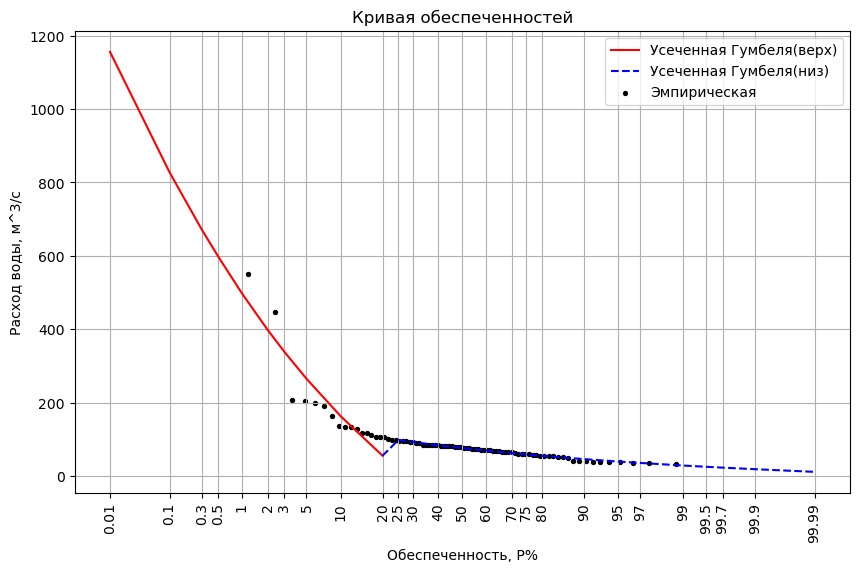

In [31]:
x_coord = [-3.719016485, -3.090232306, -2.747781385, -2.575829304, -2.326347874,-2.053748911,-1.880793608, -1.644853627, -1.281551566, -0.841621234, -0.67448975, -0.524400513, -0.253347103, 0, 0.253347103, 0.524400513, 0.67448975, 0.841621234, 1.281551566, 1.644853627, 1.880793608, 2.326347874, 2.575829304, 2.747781385, 3.090232306, 3.719016485]
y_coord = pd.concat([coordinates_upper['Qp'], coordinates_lower['Qp']])

xticks_combined = [0.01, 0.1, 0.3, 0.5, 1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 60, 70, 75, 80, 90, 95, 97, 99, 99.5, 99.7, 99.9, 99.99]

plt.figure(figsize=(10, 6))
plt.plot(x_coord[0:10], y_coord[0:10], label="Усеченная Гумбеля(верх)", c='red')
plt.plot(x_coord[9:], y_coord[9:], label="Усеченная Гумбеля(низ)", linestyle="--", c='blue')

plt.scatter(x_empiric,df_for_summary['Ранжированные Qв, м3/с'], label="Эмпирическая",s=8,c='black')

plt.xlabel("Обеспеченность, Р%")
plt.ylabel("Расход воды, м^3/с")
plt.title("Кривая обеспеченностей")

plt.xticks(x_coord, xticks_combined, rotation=90)

y_tick_interval = 1  # Установить нужный интервал !!!
min_value_y = 0
max_value_y = max(y_coord)
ytick_positions = list(range(int(min_value_y), int(max_value_y) + 2, y_tick_interval))
#plt.yticks(ytick_positions)

plt.legend()
plt.grid()
plt.show()

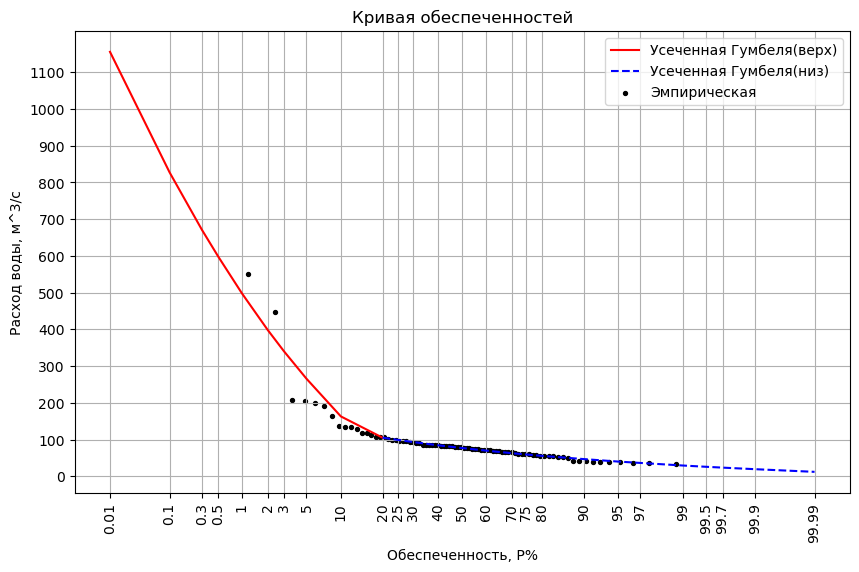

In [32]:

coordinates_upper['Qp'][9] = round(slope_lower * coordinates_upper['g'].iloc[9] + intercept_lower,2)

x_coord = [-3.719016485, -3.090232306, -2.747781385, -2.575829304, -2.326347874,-2.053748911,-1.880793608, -1.644853627, -1.281551566, -0.841621234, -0.67448975, -0.524400513, -0.253347103, 0, 0.253347103, 0.524400513, 0.67448975, 0.841621234, 1.281551566, 1.644853627, 1.880793608, 2.326347874, 2.575829304, 2.747781385, 3.090232306, 3.719016485]
y_coord = pd.concat([coordinates_upper['Qp'], coordinates_lower['Qp']])

xticks_combined = [0.01, 0.1, 0.3, 0.5, 1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 60, 70, 75, 80, 90, 95, 97, 99, 99.5, 99.7, 99.9, 99.99]

plt.figure(figsize=(10, 6))
plt.plot(x_coord[0:10], y_coord[0:10], label="Усеченная Гумбеля(верх)", c='red')
plt.plot(x_coord[9:], y_coord[9:], label="Усеченная Гумбеля(низ)", linestyle="--", c='blue')

plt.scatter(x_empiric,df_for_summary['Ранжированные Qв, м3/с'], label="Эмпирическая",s=8,c='black')

plt.xlabel("Обеспеченность, Р%")
plt.ylabel("Расход воды, м^3/с")
plt.title("Кривая обеспеченностей")

plt.xticks(x_coord, xticks_combined, rotation=90)

y_tick_interval = 100  # Установить нужный интервал !!!
min_value_y = 0
max_value_y = max(y_coord)
ytick_positions = list(range(int(min_value_y), int(max_value_y) + 2, y_tick_interval))
plt.yticks(ytick_positions)

plt.legend()
plt.grid()
plt.show()

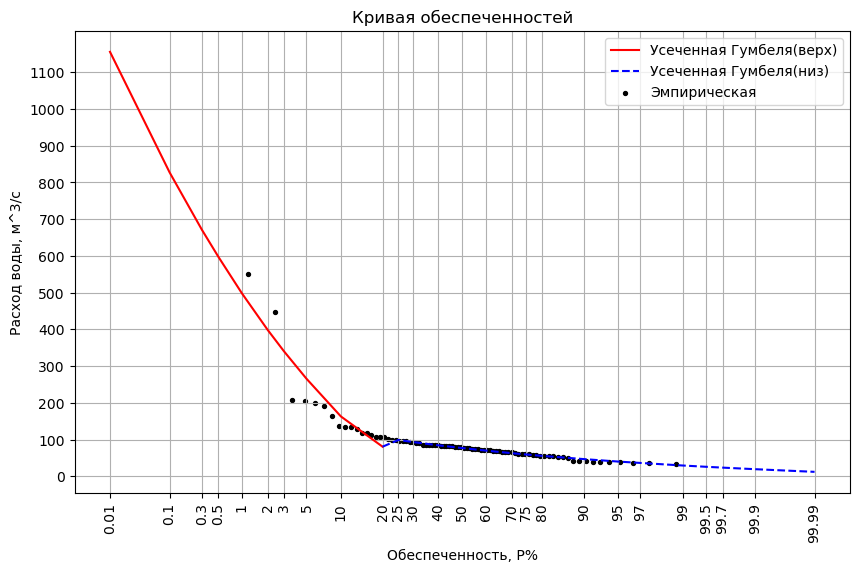

In [33]:

coordinates_upper['Qp'][9] = round((slope_upper * coordinates_upper['g'][9] + intercept_upper + slope_lower * coordinates_upper['g'][9] + intercept_lower) / 2,2)

x_coord = [-3.719016485, -3.090232306, -2.747781385, -2.575829304, -2.326347874,-2.053748911,-1.880793608, -1.644853627, -1.281551566, -0.841621234, -0.67448975, -0.524400513, -0.253347103, 0, 0.253347103, 0.524400513, 0.67448975, 0.841621234, 1.281551566, 1.644853627, 1.880793608, 2.326347874, 2.575829304, 2.747781385, 3.090232306, 3.719016485]
y_coord = pd.concat([coordinates_upper['Qp'], coordinates_lower['Qp']])

xticks_combined = [0.01, 0.1, 0.3, 0.5, 1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 60, 70, 75, 80, 90, 95, 97, 99, 99.5, 99.7, 99.9, 99.99]

plt.figure(figsize=(10, 6))
plt.plot(x_coord[0:10], y_coord[0:10], label="Усеченная Гумбеля(верх)", c='red')
plt.plot(x_coord[9:], y_coord[9:], label="Усеченная Гумбеля(низ)", linestyle="--", c='blue')

plt.scatter(x_empiric,df_for_summary['Ранжированные Qв, м3/с'], label="Эмпирическая",s=8,c='black')

plt.xlabel("Обеспеченность, Р%")
plt.ylabel("Расход воды, м^3/с")
plt.title("Кривая обеспеченностей")

plt.xticks(x_coord, xticks_combined, rotation=90)

y_tick_interval = 100  # Установить нужный интервал !!!
min_value_y = 0
max_value_y = max(y_coord)
ytick_positions = list(range(int(min_value_y), int(max_value_y) + 2, y_tick_interval))
plt.yticks(ytick_positions)

plt.legend()
plt.grid()
plt.show()

In [34]:
coordinates_upper

,P_аналитич,1-P,g,Qp
0,0.01,0.9999,9.21,1155.52
1,0.10,0.9990,6.91,827.51
2,0.30,0.9970,5.81,670.63
3,0.50,0.9950,5.30,597.90
4,1.00,0.9900,4.60,498.07
5,2.00,0.9800,3.90,398.24
6,3.00,0.9700,3.49,339.77
7,5.00,0.9500,2.97,265.61
8,10.00,0.9000,2.25,162.93
9,20.00,0.8000,1.50,80.53


In [35]:
slope_upper * coordinates_upper['g'][9] + intercept_upper 

55.97249607250774

In [36]:
 slope_lower * coordinates_upper['g'][9] + intercept_lower

105.07882080024669

In [23]:
df_Krickiy_menkel = pd.DataFrame()
df_Krickiy_menkel['№ п/п'] = df['№ п/п']
df_Krickiy_menkel['Расходы воды Qв, м3/с'] = df['максимальный']
sorted_df = df.sort_values(by='максимальный', ascending=False).reset_index(drop=True)
df_Krickiy_menkel['Ранжированные Qв, м3/с'] = sorted_df['максимальный']
df_Krickiy_menkel['k=Q/Qср'] = df_Krickiy_menkel['Ранжированные Qв, м3/с'] / np.mean(df_Krickiy_menkel['Расходы воды Qв, м3/с'])
df_Krickiy_menkel['p=m/(n+1)*100%'] = round(df_Krickiy_menkel['№ п/п'] / (len(df_Krickiy_menkel) + 1) *100,2)
df_Krickiy_menkel

,№ п/п,"Расходы воды Qв, м3/с","Ранжированные Qв, м3/с",k=Q/Qср,p=m/(n+1)*100%
0,1,92.7,550.0,5.871861,1.20
1,2,98.3,448.0,4.782897,2.41
2,3,42.0,208.0,2.220631,3.61
3,4,107.0,205.0,2.188603,4.82
4,5,56.0,199.0,2.124546,6.02
...,...,...,...,...,...
77,78,96.8,40.0,0.427044,93.98
78,79,134.0,38.9,0.415301,95.18
79,80,91.1,37.2,0.397151,96.39
80,81,96.5,36.9,0.393948,97.59


In [56]:
def get_ordinates(Cs_Cv, key):
    if key in Cs_Cv:
        return Cs_Cv[key]
    else:
        return None  # Если `key` не найден, возвращаем None

# Пример использования:
Cs_Cv_0_5 = {
    # Ваш словарь здесь
}

key_value = '0.10'  # Значение `key`, которое вы хотите использовать

result = get_ordinates(Cs_Cv_0_5, key_value)
if result:
    print(f"Ординаты для key = {key_value}:")
    print(result)
else:
    print(f"Ординаты для key = {key_value} не найдены.")


Ординаты для key = 0.10 не найдены.


In [ ]:
summary_table_at_Krickiy_Menkel = pd.DataFrame()
summary_table_at_Krickiy_Menkel['Модульный коэффициент, kp'] = get_ordinates() * 
summary_table_at_Krickiy_Menkel['Расход воды Qв, м3/с'] = summary_table_at_Krickiy_Menkel['Модульный коэффициент, kp'] * np.mean(df_Krickiy_menkel['Расходы воды Qв, м3/с'])

In [ ]:
x_coord = [-3.72,-3.09,-2.33,-1.64,-1.28,-0.84,-0.67,-0.52,-0.25,0.00,0.25,0.52,0.67,0.84,1.28,1.64,1.88,2.33,2.58,2.75,3.09,3.72]
y_coord = pd.concat([coordinates_upper['Qp'], coordinates_lower['Qp']])

xticks_combined = [0.01, 0.1, 0.3, 0.5, 1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 60, 70, 75, 80, 90, 95, 97, 99, 99.5, 99.7, 99.9, 99.99]

plt.figure(figsize=(10, 6))
plt.plot(x_coord[0:10], y_coord[0:10], label="Усеченная Гумбеля(верх)", c='red')
plt.plot(x_coord[9:], y_coord[9:], label="Усеченная Гумбеля(низ)", linestyle="--", c='blue')

plt.scatter(x_empiric,df_for_summary['Ранжированные Qв, м3/с'], label="Эмпирическая",s=8,c='black')

plt.xlabel("Обеспеченность, Р%")
plt.ylabel("Расход воды, м^3/с")
plt.title("Кривая обеспеченностей")

plt.xticks(x_coord, xticks_combined, rotation=90)

y_tick_interval = 1  # Установить нужный интервал !!!
min_value_y = 0
max_value_y = max(y_coord)
ytick_positions = list(range(int(min_value_y), int(max_value_y) + 2, y_tick_interval))
#plt.yticks(ytick_positions)

plt.legend()
plt.grid()
plt.show()

In [55]:
Cs_Cv_0_5 = {
    "Р,%": [0.01,0.1,0.3,0.5,1,3,5,10,20,25,30,40,50,60,70,75,80,90,95,97,99,99.5,99.7,99.9],
    "0.0": [1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00],
    '0.1': [1.38, 1.31, 1.28, 1.26, 1.24, 1.19, 1.17, 1.13, 1.08, 1.07, 1.05, 1.02, 0.999, 0.974, 0.947, 0.932, 0.915, 0.872, 0.837, 0.814, 0.772, 0.748, 0.732, 0.7],
    
    "0.11":[1.418,1.342,1.308,1.287,1.264,1.209,1.186,1.143,1.089,1.076,1.055,1.023,0.9988,0.9712,0.9405,0.925,0.9064,0.8592,0.8209,0.7959,0.7502,0.7243,0.707,0.6728,],
    "0.12":[1.456,1.374,1.336,1.314,1.288,1.228,1.202,1.156,1.098,1.082,1.06,1.026,0.9986,0.9684,0.934,0.918,0.8978,0.8464,0.8048,0.7778,0.7284,0.7006,0.682,0.6456,],
    "0.13":[1.494,1.406,1.364,1.341,1.312,1.247,1.218,1.169,1.107,1.088,1.065,1.029,0.9984,0.9656,0.9275,0.911,0.8892,0.8336,0.7887,0.7597,0.7066,0.6769,0.657,0.6184,],
    "0.14":[1.532,1.438,1.392,1.368,1.336,1.266,1.234,1.182,1.116,1.094,1.07,1.032,0.9982,0.9628,0.921,0.904,0.8806,0.8208,0.7726,0.7416,0.6848,0.6532,0.632,0.5912,],
    "0.15":[1.57,1.47,1.42,1.395,1.36,1.285,1.25,1.195,1.125,1.1,1.075,1.035,0.998,0.96,0.9145,0.897,0.872,0.808,0.7565,0.7235,0.663,0.6295,0.607,0.564,],
    "0.16":[1.608,1.502,1.448,1.422,1.384,1.304,1.266,1.208,1.134,1.106,1.08,1.038,0.9978,0.9572,0.908,0.89,0.8634,0.7952,0.7404,0.7054,0.6412,0.6058,0.582,0.5368,],
    "0.17":[1.646,1.534,1.476,1.449,1.408,1.323,1.282,1.221,1.143,1.112,1.085,1.041,0.9976,0.9544,0.9015,0.883,0.8548,0.7824,0.7243,0.6873,0.6194,0.5821,0.557,0.5096,],
    "0.18":[1.684,1.566,1.504,1.476,1.432,1.342,1.298,1.234,1.152,1.118,1.09,1.044,0.9974,0.9516,0.895,0.876,0.8462,0.7696,0.7082,0.6692,0.5976,0.5584,0.532,0.4824,],
    "0.19":[1.722,1.598,1.532,1.503,1.456,1.361,1.314,1.247,1.161,1.124,1.095,1.047,0.9972,0.9488,0.8885,0.869,0.8376,0.7568,0.6921,0.6511,0.5758,0.5347,0.507,0.4552,],
    
    "0.2": [1.76, 1.63, 1.56, 1.53, 1.48, 1.38, 1.33, 1.26, 1.17, 1.13, 1.1, 1.05, 0.997, 0.946, 0.882, 0.862, 0.829, 0.744, 0.676, 0.633, 0.554, 0.511, 0.482, 0.428],
    
    "0.21":[1.797,1.662,1.589,1.556,1.504,1.4,1.348,1.273,1.178,1.137,1.106,1.052,0.9966,0.9429,0.8772,0.8547,0.8201,0.7311,0.6601,0.6155,0.534,0.4901,0.4607,0.4062,],
    "0.22":[1.834,1.694,1.618,1.582,1.528,1.42,1.366,1.286,1.186,1.144,1.112,1.054,0.9962,0.9398,0.8724,0.8474,0.8112,0.7182,0.6442,0.598,0.514,0.4692,0.4394,0.3844,],
    "0.23":[1.871,1.726,1.647,1.608,1.552,1.44,1.384,1.299,1.194,1.151,1.118,1.056,0.9958,0.9367,0.8676,0.8401,0.8023,0.7053,0.6283,0.5805,0.494,0.4483,0.4181,0.3626,],
    "0.24":[1.908,1.758,1.676,1.634,1.576,1.46,1.402,1.312,1.202,1.158,1.124,1.058,0.9954,0.9336,0.8628,0.8328,0.7934,0.6924,0.6124,0.563,0.474,0.4274,0.3968,0.3408,],
    "0.25":[1.945,1.79,1.705,1.66,1.6,1.48,1.42,1.325,1.21,1.165,1.13,1.06,0.995,0.9305,0.858,0.8255,0.7845,0.6795,0.5965,0.5455,0.454,0.4065,0.3755,0.319,],
    "0.26":[1.982,1.822,1.734,1.686,1.624,1.5,1.438,1.338,1.218,1.172,1.136,1.062,0.9946,0.9274,0.8532,0.8182,0.7756,0.6666,0.5806,0.528,0.434,0.3856,0.3542,0.2972,],
    "0.27":[2.019,1.854,1.763,1.712,1.648,1.52,1.456,1.351,1.226,1.179,1.142,1.064,0.9942,0.9243,0.8484,0.8109,0.7667,0.6537,0.5647,0.5105,0.414,0.3647,0.3329,0.2754,],
    "0.28":[2.056,1.886,1.792,1.738,1.672,1.54,1.474,1.364,1.234,1.186,1.148,1.066,0.9938,0.9212,0.8436,0.8036,0.7578,0.6408,0.5488,0.493,0.394,0.3438,0.3116,0.2536,],
    "0.29":[2.093,1.918,1.821,1.764,1.696,1.56,1.492,1.377,1.242,1.193,1.154,1.068,0.9934,0.9181,0.8388,0.7963,0.7489,0.6279,0.5329,0.4755,0.374,0.3229,0.2903,0.2318,],
    
    "0.3": [2.13, 1.95, 1.85, 1.79, 1.72, 1.58, 1.51, 1.39, 1.25, 1.2, 1.16, 1.07, 0.993, 0.915, 0.834, 0.789, 0.74, 0.615, 0.517, 0.458, 0.354, 0.302, 0.269, 0.21],
    
    "0.31":[2.164,1.98,1.877,1.816,1.743,1.6,1.527,1.404,1.26,1.207,1.165,1.073,0.9925,0.9116,0.8275,0.781,0.7303,0.6015,0.5015,0.4417,0.3375,0.2862,0.2538,0.1966,],
    "0.32":[2.198,2.01,1.904,1.842,1.766,1.62,1.544,1.418,1.27,1.214,1.17,1.076,0.992,0.9082,0.821,0.773,0.7206,0.588,0.486,0.4254,0.321,0.2704,0.2386,0.1832,],
    "0.33":[2.232,2.04,1.931,1.868,1.789,1.64,1.561,1.432,1.28,1.221,1.175,1.079,0.9915,0.9048,0.8145,0.765,0.7109,0.5745,0.4705,0.4091,0.3045,0.2546,0.2234,0.1698,],
    "0.34":[2.266,2.07,1.958,1.894,1.812,1.66,1.578,1.446,1.29,1.228,1.18,1.082,0.991,0.9014,0.808,0.757,0.7012,0.561,0.455,0.3928,0.288,0.2388,0.2082,0.1564,],
    "0.35":[2.3,2.1,1.985,1.92,1.835,1.68,1.595,1.46,1.3,1.235,1.185,1.085,0.9905,0.898,0.8015,0.749,0.6915,0.5475,0.4395,0.3765,0.2715,0.223,0.193,0.143,],
    "0.36":[2.334,2.13,2.012,1.946,1.858,1.7,1.612,1.474,1.31,1.242,1.19,1.088,0.99,0.8946,0.795,0.741,0.6818,0.534,0.424,0.3602,0.255,0.2072,0.1778,0.1296,],
    "0.37":[2.368,2.16,2.039,1.972,1.881,1.72,1.629,1.488,1.32,1.249,1.195,1.091,0.9895,0.8912,0.7885,0.733,0.6721,0.5205,0.4085,0.3439,0.2385,0.1914,0.1626,0.1162,],
    "0.38":[2.402,2.19,2.066,1.998,1.904,1.74,1.646,1.502,1.33,1.256,1.2,1.094,0.989,0.8878,0.782,0.725,0.6624,0.507,0.393,0.3276,0.222,0.1756,0.1474,0.1028,],
    "0.39":[2.436,2.22,2.093,2.024,1.927,1.76,1.663,1.516,1.34,1.263,1.205,1.097,0.9885,0.8844,0.7755,0.717,0.6527,0.4935,0.3775,0.3113,0.2055,0.1598,0.1322,0.0894,],
    
    "0.4": [2.47, 2.25, 2.12, 2.05, 1.95, 1.78, 1.68, 1.53, 1.35, 1.27, 1.21, 1.1, 0.988, 0.881, 0.769, 0.709, 0.643, 0.48, 0.362, 0.295, 0.189, 0.144, 0.117, 0.076],
    
    "0.41":[2.497,2.275,2.144,2.073,1.972,1.799,1.698,1.544,1.359,1.278,1.216,1.102,0.9872,0.8768,0.7614,0.6996,0.632,0.4663,0.3479,0.2815,0.1781,0.1347,0.109,0.0703,],
    "0.42":[2.524,2.3,2.168,2.096,1.994,1.818,1.716,1.558,1.368,1.286,1.222,1.104,0.9864,0.8726,0.7538,0.6902,0.621,0.4526,0.3338,0.268,0.1672,0.1254,0.101,0.0646,],
    "0.43":[2.551,2.325,2.192,2.119,2.016,1.837,1.734,1.572,1.377,1.294,1.228,1.106,0.9856,0.8684,0.7462,0.6808,0.61,0.4389,0.3197,0.2545,0.1563,0.1161,0.093,0.0589,],
    "0.44":[2.578,2.35,2.216,2.142,2.038,1.856,1.752,1.586,1.386,1.302,1.234,1.108,0.9848,0.8642,0.7386,0.6714,0.599,0.4252,0.3056,0.241,0.1454,0.1068,0.085,0.0532,],
    "0.45":[2.605,2.375,2.24,2.165,2.06,1.875,1.77,1.6,1.395,1.31,1.24,1.11,0.984,0.86,0.731,0.662,0.588,0.4115,0.2915,0.2275,0.1345,0.0975,0.077,0.0475,],
    "0.46":[2.632,2.4,2.264,2.188,2.082,1.894,1.788,1.614,1.404,1.318,1.246,1.112,0.9832,0.8558,0.7234,0.6526,0.577,0.3978,0.2774,0.214,0.1236,0.0882,0.069,0.0418,],
    "0.47":[2.659,2.425,2.288,2.211,2.104,1.913,1.806,1.628,1.413,1.326,1.252,1.114,0.9824,0.8516,0.7158,0.6432,0.566,0.3841,0.2633,0.2005,0.1127,0.0789,0.061,0.0361,],
    "0.48":[2.686,2.45,2.312,2.234,2.126,1.932,1.824,1.642,1.422,1.334,1.258,1.116,0.9816,0.8474,0.7082,0.6338,0.555,0.3704,0.2492,0.187,0.1018,0.0696,0.053,0.0304,],
    "0.49":[2.713,2.475,2.336,2.257,2.148,1.951,1.842,1.656,1.431,1.342,1.264,1.118,0.9808,0.8432,0.7006,0.6244,0.544,0.3567,0.2351,0.1735,0.0909000000000001,0.0603,0.045,0.0247,],
    
    "0.5": [2.74, 2.5, 2.36, 2.28, 2.17, 1.97, 1.86, 1.67, 1.44, 1.35, 1.27, 1.12, 0.98, 0.839, 0.693, 0.615, 0.533, 0.343, 0.221, 0.16, 0.08, 0.051, 0.037, 0.019],
    
    "0.51":[2.757,2.519,2.379,2.3,2.19,1.989,1.877,1.686,1.452,1.36,1.277,1.123,0.9782,0.8331,0.6833,0.6038,0.5206,0.3302,0.2102,0.151,0.0745,0.0472,0.0341,0.0174,],
    "0.52":[2.774,2.538,2.398,2.32,2.21,2.008,1.894,1.702,1.464,1.37,1.284,1.126,0.9764,0.8272,0.6736,0.5926,0.5082,0.3174,0.1994,0.142,0.069,0.0434,0.0312,0.0158,],
    "0.53":[2.791,2.557,2.417,2.34,2.23,2.027,1.911,1.718,1.476,1.38,1.291,1.129,0.9746,0.8213,0.6639,0.5814,0.4958,0.3046,0.1886,0.133,0.0635,0.0396,0.0283,0.0142,],
    "0.54":[2.808,2.576,2.436,2.36,2.25,2.046,1.928,1.734,1.488,1.39,1.298,1.132,0.9728,0.8154,0.6542,0.5702,0.4834,0.2918,0.1778,0.124,0.058,0.0358,0.0254,0.0126,],
    "0.55":[2.825,2.595,2.455,2.38,2.27,2.065,1.945,1.75,1.5,1.4,1.305,1.135,0.971,0.8095,0.6445,0.559,0.471,0.279,0.167,0.115,0.0525,0.032,0.0225,0.011,],
    "0.56":[2.842,2.614,2.474,2.4,2.29,2.084,1.962,1.766,1.512,1.41,1.312,1.138,0.9692,0.8036,0.6348,0.5478,0.4586,0.2662,0.1562,0.106,0.047,0.0282,0.0196,0.0094,],
    "0.57":[2.859,2.633,2.493,2.42,2.31,2.103,1.979,1.782,1.524,1.42,1.319,1.141,0.9674,0.7977,0.6251,0.5366,0.4462,0.2534,0.1454,0.097,0.0415,0.0244,0.0167,0.0078,],
    "0.58":[2.876,2.652,2.512,2.44,2.33,2.122,1.996,1.798,1.536,1.43,1.326,1.144,0.9656,0.7918,0.6154,0.5254,0.4338,0.2406,0.1346,0.088,0.036,0.0206,0.0138,0.0062,],
    "0.59":[2.893,2.671,2.531,2.46,2.35,2.141,2.013,1.814,1.548,1.44,1.333,1.147,0.9638,0.7859,0.6057,0.5142,0.4214,0.2278,0.1238,0.079,0.0305,0.0168,0.0109,0.0046,],
    
    "0.6": [2.91, 2.69, 2.55, 2.48, 2.37, 2.16, 2.03, 1.83, 1.56, 1.45, 1.34, 1.15, 0.962, 0.78, 0.596, 0.503, 0.409, 0.215, 0.113, 0.07, 0.025, 0.013, 0.008, 0.003],
    
    "0.61":[2.908,2.695,2.559,2.491,2.383,2.177,2.049,1.848,1.574,1.461,1.348,1.151,0.9578,0.771,0.584,0.4903,0.3963,0.205,0.1064,0.0654,0.0231,0.0119,0.0073,0.0027,],
    "0.62":[2.906,2.7,2.568,2.502,2.396,2.194,2.068,1.866,1.588,1.472,1.356,1.152,0.9536,0.762,0.572,0.4776,0.3836,0.195,0.0998,0.0608,0.0212,0.0108,0.0066,0.0024,],
    "0.63":[2.904,2.705,2.577,2.513,2.409,2.211,2.087,1.884,1.602,1.483,1.364,1.153,0.9494,0.753,0.56,0.4649,0.3709,0.185,0.0932,0.0562,0.0193,0.0097,0.0059,0.0021,],
    "0.64":[2.902,2.71,2.586,2.524,2.422,2.228,2.106,1.902,1.616,1.494,1.372,1.154,0.9452,0.744,0.548,0.4522,0.3582,0.175,0.0866,0.0516,0.0174,0.0086,0.0052,0.0018,],
    "0.65":[2.9,2.715,2.595,2.535,2.435,2.245,2.125,1.92,1.63,1.505,1.38,1.155,0.941,0.735,0.536,0.4395,0.3455,0.165,0.08,0.047,0.0155,0.0075,0.0045,0.0015,],
    "0.66":[2.898,2.72,2.604,2.546,2.448,2.262,2.144,1.938,1.644,1.516,1.388,1.156,0.9368,0.726,0.524,0.4268,0.3328,0.155,0.0734,0.0424,0.0136,0.0064,0.0038,0.0012,],
    "0.67":[2.896,2.725,2.613,2.557,2.461,2.279,2.163,1.956,1.658,1.527,1.396,1.157,0.9326,0.717,0.512,0.4141,0.3201,0.145,0.0668,0.0378,0.0117,0.0053,0.0031,0.000900000000000001,],
    "0.68":[2.894,2.73,2.622,2.568,2.474,2.296,2.182,1.974,1.672,1.538,1.404,1.158,0.9284,0.708,0.5,0.4014,0.3074,0.135,0.0602,0.0332,0.0098,0.0042,0.0024,0.0006,],
    "0.69":[2.892,2.735,2.631,2.579,2.487,2.313,2.201,1.992,1.686,1.549,1.412,1.159,0.9242,0.699,0.488,0.3887,0.2947,0.125,0.0536,0.0286,0.0079,0.0031,0.0017,0.0003,],
    
    "0.7": [2.89, 2.74, 2.64, 2.59, 2.5, 2.33, 2.22, 2.01, 1.7, 1.56, 1.42, 1.16, 0.92, 0.69, 0.476, 0.376, 0.282, 0.115, 0.047, 0.024, 0.006, 0.002, 0.001, 0],
}

# Создаем DataFrame из словаря
#Cs_Cv_0_5 = pd.DataFrame(Cs_Cv_0_5)

In [7]:
Cs_Cv_1 = {
    "Р,%": [0.01,0.1,0.3,0.5,1,3,5,10,20,25,30,40,50,60,70,75,80,90,95,97,99,99.5,99.7,99.9],
    "0.1": [1.38,1.32,1.28,1.27,1.24,1.19,1.17,1.13,1.08,1.07,1.05,1.02,0.998,0.973,0.946,0.932,0.915,0.873,0.838,0.816,0.775,0.752,0.737,0.707],
    
    "0.11":[1.423,1.355,1.311,1.298,1.265,1.21,1.187,1.143,1.089,1.076,1.055,1.022,0.9975,0.97,0.9404,0.9249,0.9064,0.8605,0.8225,0.7986,0.7543,0.7296,0.7135,0.6814,],
    "0.12":[1.466,1.39,1.342,1.326,1.29,1.23,1.204,1.156,1.098,1.082,1.06,1.024,0.997,0.967,0.9348,0.9178,0.8978,0.848,0.807,0.7812,0.7336,0.7072,0.69,0.6558,],
    "0.13":[1.509,1.425,1.373,1.354,1.315,1.25,1.221,1.169,1.107,1.088,1.065,1.026,0.9965,0.964,0.9292,0.9107,0.8892,0.8355,0.7915,0.7638,0.7129,0.6848,0.6665,0.6302,],
    "0.14":[1.552,1.46,1.404,1.382,1.34,1.27,1.238,1.182,1.116,1.094,1.07,1.028,0.996,0.961,0.9236,0.9036,0.8806,0.823,0.776,0.7464,0.6922,0.6624,0.643,0.6046,],
    "0.15":[1.595,1.495,1.435,1.41,1.365,1.29,1.255,1.195,1.125,1.1,1.075,1.03,0.9955,0.958,0.918,0.8965,0.872,0.8105,0.7605,0.729,0.6715,0.64,0.6195,0.579,],
    "0.16":[1.638,1.53,1.466,1.438,1.39,1.31,1.272,1.208,1.134,1.106,1.08,1.032,0.995,0.955,0.9124,0.8894,0.8634,0.798,0.745,0.7116,0.6508,0.6176,0.596,0.5534,],
    "0.17":[1.681,1.565,1.497,1.466,1.415,1.33,1.289,1.221,1.143,1.112,1.085,1.034,0.9945,0.952,0.9068,0.8823,0.8548,0.7855,0.7295,0.6942,0.6301,0.5952,0.5725,0.5278,],
    "0.18":[1.724,1.6,1.528,1.494,1.44,1.35,1.306,1.234,1.152,1.118,1.09,1.036,0.994,0.949,0.9012,0.8752,0.8462,0.773,0.714,0.6768,0.6094,0.5728,0.549,0.5022,],
    "0.19":[1.767,1.635,1.559,1.522,1.465,1.37,1.323,1.247,1.161,1.124,1.095,1.038,0.9935,0.946,0.8956,0.8681,0.8376,0.7605,0.6985,0.6594,0.5887,0.5504,0.5255,0.4766,],
    
    "0.2": [1.81,1.67,1.59,1.55,1.49,1.39,1.34,1.26,1.17,1.13,1.1,1.04,0.993,0.943,0.89,0.861,0.829,0.748,0.683,0.642,0.568,0.528,0.502,0.451],
    
    "0.21":[1.855,1.706,1.622,1.579,1.517,1.411,1.358,1.274,1.178,1.137,12.49,1.042,0.9922,0.9396,0.884,0.8536,0.8201,0.7355,0.668,0.6256,0.5495,0.5087,0.4821,0.4306,],
    "0.22":[1.9,1.742,1.654,1.608,1.544,1.432,1.376,1.288,1.186,1.144,23.88,1.044,0.9914,0.9362,0.878,0.8462,0.8112,0.723,0.653,0.6092,0.531,0.4894,0.4622,0.4102,],
    "0.23":[1.945,1.778,1.686,1.637,1.571,1.453,1.394,1.302,1.194,1.151,35.27,1.046,0.9906,0.9328,0.872,0.8388,0.8023,0.7105,0.638,0.5928,0.5125,0.4701,0.4423,0.3898,],
    "0.24":[1.99,1.814,1.718,1.666,1.598,1.474,1.412,1.316,1.202,1.158,46.66,1.048,0.9898,0.9294,0.866,0.8314,0.7934,0.698,0.623,0.5764,0.494,0.4508,0.4224,0.3694,],
    "0.25":[2.035,1.85,1.75,1.695,1.625,1.495,1.43,1.33,1.21,1.165,58.05,1.05,0.989,0.926,0.86,0.824,0.7845,0.6855,0.608,0.56,0.4755,0.4315,0.4025,0.349,],
    "0.26":[2.08,1.886,1.782,1.724,1.652,1.516,1.448,1.344,1.218,1.172,69.44,1.052,0.9882,0.9226,0.854,0.8166,0.7756,0.673,0.593,0.5436,0.457,0.4122,0.3826,0.3286,],
    "0.27":[2.125,1.922,1.814,1.753,1.679,1.537,1.466,1.358,1.226,1.179,80.83,1.054,0.9874,0.9192,0.848,0.8092,0.7667,0.6605,0.578,0.5272,0.4385,0.3929,0.3627,0.3082,],
    "0.28":[2.17,1.958,1.846,1.782,1.706,1.558,1.484,1.372,1.234,1.186,92.22,1.056,0.9866,0.9158,0.842,0.8018,0.7578,0.648,0.563,0.5108,0.42,0.3736,0.3428,0.2878,],
    "0.29":[2.215,1.994,1.878,1.811,1.733,1.579,1.502,1.386,1.242,1.193,103.61,1.058,0.9858,0.9124,0.836,0.7944,0.7489,0.6355,0.548,0.4944,0.4015,0.3543,0.3229,0.2674,],
    
    "0.3": [2.26,2.03,1.91,1.84,1.76,1.6,1.52,1.4,1.25,1.2,1.15,1.06,0.985,0.909,0.83,0.787,0.74,0.623,0.533,0.478,0.383,0.335,0.303,0.247],
    
    "0.31":[2.304,2.067,1.942,1.871,1.787,1.622,1.538,1.414,1.259,1.206,103.62,1.062,0.9837,0.9051,0.8234,0.7791,0.7308,0.6107,0.5189,0.4631,0.3676,0.3197,0.2881,0.2331,],
    "0.32":[2.348,2.104,1.974,1.902,1.814,1.644,1.556,1.428,1.268,1.212,92.24,1.064,0.9824,0.9012,0.8168,0.7712,0.7216,0.5984,0.5048,0.4482,0.3522,0.3044,0.2732,0.2192,],
    "0.33":[2.392,2.141,2.006,1.933,1.841,1.666,1.574,1.442,1.277,1.218,80.86,1.066,0.9811,0.8973,0.8102,0.7633,0.7124,0.5861,0.4907,0.4333,0.3368,0.2891,0.2583,0.2053,],
    "0.34":[2.436,2.178,2.038,1.964,1.868,1.688,1.592,1.456,1.286,1.224,69.48,1.068,0.9798,0.8934,0.8036,0.7554,0.7032,0.5738,0.4766,0.4184,0.3214,0.2738,0.2434,0.1914,],
    "0.35":[2.48,2.215,2.07,1.995,1.895,1.71,1.61,1.47,1.295,1.23,58.1,1.07,0.9785,0.8895,0.797,0.7475,0.694,0.5615,0.4625,0.4035,0.306,0.2585,0.2285,0.1775,],
    "0.36":[2.524,2.252,2.102,2.026,1.922,1.732,1.628,1.484,1.304,1.236,46.72,1.072,0.9772,0.8856,0.7904,0.7396,0.6848,0.5492,0.4484,0.3886,0.2906,0.2432,0.2136,0.1636,],
    "0.37":[2.568,2.289,2.134,2.057,1.949,1.754,1.646,1.498,1.313,1.242,35.34,1.074,0.9759,0.8817,0.7838,0.7317,0.6756,0.5369,0.4343,0.3737,0.2752,0.2279,0.1987,0.1497,],
    "0.38":[2.612,2.326,2.166,2.088,1.976,1.776,1.664,1.512,1.322,1.248,23.96,1.076,0.9746,0.8778,0.7772,0.7238,0.6664,0.5246,0.4202,0.3588,0.2598,0.2126,0.1838,0.1358,],
    "0.39":[2.656,2.363,2.198,2.119,2.003,1.798,1.682,1.526,1.331,1.254,12.58,1.078,0.9733,0.8739,0.7706,0.7159,0.6572,0.5123,0.4061,0.3439,0.2444,0.1973,0.1689,0.1219,],
    
    "0.4": [2.7,2.4,2.23,2.15,2.03,1.82,1.7,1.54,1.34,1.26,1.2,1.08,0.972,0.87,0.764,0.708,0.648,0.5,0.392,0.329,0.229,0.182,0.154,0.108],
    
    '0.41':[2.304,2.067,1.942,1.871,1.787,1.622,1.538,1.414,1.259,1.206,103.62,1.062,0.9837,0.9051,0.8234,0.7791,0.7308,0.6107,0.5189,0.4631,0.3676,0.3197,0.2881,0.2331,],
    '0.42':[2.348,2.104,1.974,1.902,1.814,1.644,1.556,1.428,1.268,1.212,92.24,1.064,0.9824,0.9012,0.8168,0.7712,0.7216,0.5984,0.5048,0.4482,0.3522,0.3044,0.2732,0.2192,],
    '0.43':[2.392,2.141,2.006,1.933,1.841,1.666,1.574,1.442,1.277,1.218,80.86,1.066,0.9811,0.8973,0.8102,0.7633,0.7124,0.5861,0.4907,0.4333,0.3368,0.2891,0.2583,0.2053,],
    '0.44':[2.436,2.178,2.038,1.964,1.868,1.688,1.592,1.456,1.286,1.224,69.48,1.068,0.9798,0.8934,0.8036,0.7554,0.7032,0.5738,0.4766,0.4184,0.3214,0.2738,0.2434,0.1914,],
    '0.45':[2.48,2.215,2.07,1.995,1.895,1.71,1.61,1.47,1.295,1.23,58.1,1.07,0.9785,0.8895,0.797,0.7475,0.694,0.5615,0.4625,0.4035,0.306,0.2585,0.2285,0.1775,],
    '0.46':[2.524,2.252,2.102,2.026,1.922,1.732,1.628,1.484,1.304,1.236,46.72,1.072,0.9772,0.8856,0.7904,0.7396,0.6848,0.5492,0.4484,0.3886,0.2906,0.2432,0.2136,0.1636,],
    '0.47':[2.568,2.289,2.134,2.057,1.949,1.754,1.646,1.498,1.313,1.242,35.34,1.074,0.9759,0.8817,0.7838,0.7317,0.6756,0.5369,0.4343,0.3737,0.2752,0.2279,0.1987,0.1497,],
    '0.48':[2.612,2.326,2.166,2.088,1.976,1.776,1.664,1.512,1.322,1.248,23.96,1.076,0.9746,0.8778,0.7772,0.7238,0.6664,0.5246,0.4202,0.3588,0.2598,0.2126,0.1838,0.1358,],
    '0.49':[2.656,2.363,2.198,2.119,2.003,1.798,1.682,1.526,1.331,1.254,12.58,1.078,0.9733,0.8739,0.7706,0.7159,0.6572,0.5123,0.4061,0.3439,0.2444,0.1973,0.1689,0.1219,],

    
    "0.5": [3.15,2.77,2.56,2.46,2.3,2.04,1.9,1.68,1.42,1.33,1.24,1.09,0.954,0.824,0.692,0.622,0.549,0.378,0.263,0.202,0.115,0.081,0.062,0.036],

    '0.51':[3.192,2.806,2.593,2.491,2.329,2.063,1.92,1.695,1.429,1.336,1.245,1.091,0.9514,0.8184,0.6837,0.6126,0.5386,0.3666,0.2524,0.1925,0.1082,0.0757,0.0577,0.0332,],
    '0.52':[3.234,2.842,2.626,2.522,2.358,2.086,1.94,1.71,1.438,1.342,1.25,1.092,0.9488,0.8128,0.6754,0.6032,0.5282,0.3552,0.2418,0.183,0.1014,0.0704,0.0534,0.0304,],
    '0.53':[3.276,2.878,2.659,2.553,2.387,2.109,1.96,1.725,1.447,1.348,1.255,1.093,0.9462,0.8072,0.6671,0.5938,0.5178,0.3438,0.2312,0.1735,0.0946,0.0651,0.0491,0.0276,],
    '0.54':[3.318,2.914,2.692,2.584,2.416,2.132,1.98,1.74,1.456,1.354,1.26,1.094,0.9436,0.8016,0.6588,0.5844,0.5074,0.3324,0.2206,0.164,0.0878,0.0598,0.0448,0.0248,],
    '0.55':[3.36,2.95,2.725,2.615,2.445,2.155,2,1.755,1.465,1.36,1.265,1.095,0.941,0.796,0.6505,0.575,0.497,0.321,0.21,0.1545,0.081,0.0545,0.0405,0.022,],
    '0.56':[3.402,2.986,2.758,2.646,2.474,2.178,2.02,1.77,1.474,1.366,1.27,1.096,0.9384,0.7904,0.6422,0.5656,0.4866,0.3096,0.1994,0.145,0.0742,0.0492,0.0362,0.0192,],
    '0.57':[3.444,3.022,2.791,2.677,2.503,2.201,2.04,1.785,1.483,1.372,1.275,1.097,0.9358,0.7848,0.6339,0.5562,0.4762,0.2982,0.1888,0.1355,0.0674,0.0439,0.0319,0.0164,],
    '0.58':[3.486,3.058,2.824,2.708,2.532,2.224,2.06,1.8,1.492,1.378,1.28,1.098,0.9332,0.7792,0.6256,0.5468,0.4658,0.2868,0.1782,0.126,0.0606,0.0386,0.0276,0.0136,],
    '0.59':[3.528,3.094,2.857,2.739,2.561,2.247,2.08,1.815,1.501,1.384,1.285,1.099,0.930600000000001,0.7736,0.6173,0.5374,0.4554,0.2754,0.1676,0.1165,0.0538,0.0333,0.0233,0.0108,],

    
        
    "0.6": [3.57,3.13,2.89,2.77,2.59,2.27,2.1,1.83,1.51,1.39,1.29,1.1,0.928,0.768,0.609,0.528,0.445,0.264,0.157,0.107,0.047,0.028,0.019,0.008],
    
    '0.61':[3.608,3.165,2.922,2.801,2.619,2.293,2.12,1.846,1.519,1.397,1.294,1.1,0.9243,0.761,0.5996,0.5178,0.4343,0.2541,0.1494,0.1011,0.0438,0.026,0.0175,0.0073,],
    '0.62':[3.646,3.2,2.954,2.832,2.648,2.316,2.14,1.862,1.528,1.404,1.298,1.1,0.9206,0.754,0.5902,0.5076,0.4236,0.2442,0.1418,0.0952,0.0406,0.024,0.016,0.0066,],
    '0.63':[3.684,3.235,2.986,2.863,2.677,2.339,2.16,1.878,1.537,1.411,1.302,1.1,0.9169,0.747,0.5808,0.4974,0.4129,0.2343,0.1342,0.0893,0.0374,0.022,0.0145,0.0059,],
    '0.64':[3.722,3.27,3.018,2.894,2.706,2.362,2.18,1.894,1.546,1.418,1.306,1.1,0.9132,0.74,0.5714,0.4872,0.4022,0.2244,0.1266,0.0834,0.0342,0.02,0.013,0.0052,],
    '0.65':[3.76,3.305,3.05,2.925,2.735,2.385,2.2,1.91,1.555,1.425,1.31,1.1,0.9095,0.733,0.562,0.477,0.3915,0.2145,0.119,0.0775,0.031,0.018,0.0115,0.0045,],
    '0.66':[3.798,3.34,3.082,2.956,2.764,2.408,2.22,1.926,1.564,1.432,1.314,1.1,0.9058,0.726,0.5526,0.4668,0.3808,0.2046,0.1114,0.0716,0.0278,0.016,0.01,0.0038,],
    '0.67':[3.836,3.375,3.114,2.987,2.793,2.431,2.24,1.942,1.573,1.439,1.318,1.1,0.9021,0.719,0.5432,0.4566,0.3701,0.1947,0.1038,0.0657,0.0246,0.014,0.0085,0.0031,],
    '0.68':[3.874,3.41,3.146,3.018,2.822,2.454,2.26,1.958,1.582,1.446,1.322,1.1,0.8984,0.712,0.5338,0.4464,0.3594,0.1848,0.0962,0.0598,0.0214,0.012,0.007,0.0024,],
    '0.69':[3.912,3.445,3.178,3.049,2.851,2.477,2.28,1.974,1.591,1.453,1.326,1.1,0.8947,0.705,0.5244,0.4362,0.3487,0.1749,0.0886,0.0539,0.0182,0.00999999999999999,0.0055,0.0017,],

    
    "0.7": [3.95,3.48,3.21,3.08,2.88,2.5,2.3,1.99,1.6,1.46,1.33,1.1,0.891,0.698,0.515,0.426,0.338,0.165,0.081,0.048,0.015,0.008,0.004,0.001],
    
    '0.71':[3.986,3.514,3.242,3.11,2.908,2.525,2.323,2.007,1.61,1.466,1.334,1.098,0.8855,0.6895,0.5048,0.4155,0.3279,0.1577,0.0765,0.045,0.0139,0.0074,0.0037,0.0009,],
    '0.72':[4.022,3.548,3.274,3.14,2.936,2.55,2.346,2.024,1.62,1.472,1.338,1.096,0.88,0.681,0.4946,0.405,0.3178,0.1504,0.072,0.042,0.0128,0.0068,0.0034,0.0008,],
    '0.73':[4.058,3.582,3.306,3.17,2.964,2.575,2.369,2.041,1.63,1.478,1.342,1.094,0.8745,0.6725,0.4844,0.3945,0.3077,0.1431,0.0675,0.039,0.0117,0.0062,0.0031,0.0007,],
    '0.74':[4.094,3.616,3.338,3.2,2.992,2.6,2.392,2.058,1.64,1.484,1.346,1.092,0.869,0.664,0.4742,0.384,0.2976,0.1358,0.063,0.036,0.0106,0.0056,0.0028,0.0006,],
    '0.75':[4.13,3.65,3.37,3.23,3.02,2.625,2.415,2.075,1.65,1.49,1.35,1.09,0.8635,0.6555,0.464,0.3735,0.2875,0.1285,0.0585,0.033,0.0095,0.005,0.0025,0.0005,],
    '0.76':[4.166,3.684,3.402,3.26,3.048,2.65,2.438,2.092,1.66,1.496,1.354,1.088,0.858,0.647,0.4538,0.363,0.2774,0.1212,0.054,0.03,0.0084,0.0044,0.0022,0.0004,],
    '0.77':[4.202,3.718,3.434,3.29,3.076,2.675,2.461,2.109,1.67,1.502,1.358,1.086,0.8525,0.6385,0.4436,0.3525,0.2673,0.1139,0.0495,0.027,0.0073,0.0038,0.0019,0.0003,],
    '0.78':[4.238,3.752,3.466,3.32,3.104,2.7,2.484,2.126,1.68,1.508,1.362,1.084,0.847,0.63,0.4334,0.342,0.2572,0.1066,0.045,0.024,0.0062,0.0032,0.0016,0.0002,],
    '0.79':[4.274,3.786,3.498,3.35,3.132,2.725,2.507,2.143,1.69,1.514,1.366,1.082,0.841499999999999,0.6215,0.4232,0.3315,0.2471,0.0993,0.0405,0.021,0.0051,0.0026,0.0013,9.99999999999998E-05,],

    
    "0.8": [4.31,3.82,3.53,3.38,3.16,2.75,2.53,2.16,1.7,1.52,1.37,1.08,0.836,0.613,0.413,0.321,0.237,0.092,0.036,0.018,0.004,0.002,0.001,0],
    
    '0.81':[4.343,3.851,3.561,3.411,3.19,2.776,2.553,2.179,1.71,1.527,1.372,1.077,0.8284,0.6029,0.4026,0.3113,0.2284,0.0873,0.0337,0.0167,0.0037,0.0018,0.0009,0,],
    '0.82':[4.376,3.882,3.592,3.442,3.22,2.802,2.576,2.198,1.72,1.534,1.374,1.074,0.8208,0.5928,0.3922,0.3016,0.2198,0.0826,0.0314,0.0154,0.0034,0.0016,0.0008,0,],
    '0.83':[4.409,3.913,3.623,3.473,3.25,2.828,2.599,2.217,1.73,1.541,1.376,1.071,0.8132,0.5827,0.3818,0.2919,0.2112,0.0779,0.0291,0.0141,0.0031,0.0014,0.0007,0,],
    '0.84':[4.442,3.944,3.654,3.504,3.28,2.854,2.622,2.236,1.74,1.548,1.378,1.068,0.8056,0.5726,0.3714,0.2822,0.2026,0.0732,0.0268,0.0128,0.0028,0.0012,0.0006,0,],
    '0.85':[4.475,3.975,3.685,3.535,3.31,2.88,2.645,2.255,1.75,1.555,1.38,1.065,0.798,0.5625,0.361,0.2725,0.194,0.0685,0.0245,0.0115,0.0025,0.001,0.0005,0,],
    '0.86':[4.508,4.006,3.716,3.566,3.34,2.906,2.668,2.274,1.76,1.562,1.382,1.062,0.7904,0.5524,0.3506,0.2628,0.1854,0.0638,0.0222,0.0102,0.0022,0.0008,0.0004,0,],
    '0.87':[4.541,4.037,3.747,3.597,3.37,2.932,2.691,2.293,1.77,1.569,1.384,1.059,0.7828,0.5423,0.3402,0.2531,0.1768,0.0591,0.0199,0.00890000000000001,0.0019,0.0006,0.0003,0,],
    '0.88':[4.574,4.068,3.778,3.628,3.4,2.958,2.714,2.312,1.78,1.576,1.386,1.056,0.7752,0.5322,0.3298,0.2434,0.1682,0.0544,0.0176,0.00760000000000001,0.0016,0.0004,0.0002,0,],
    '0.89':[4.607,4.099,3.809,3.659,3.43,2.984,2.737,2.331,1.79,1.583,1.388,1.053,0.7676,0.5221,0.3194,0.2337,0.1596,0.0497,0.0153,0.00630000000000001,0.0013,0.0002,9.99999999999998E-05,0,],

    
    "0.9": [4.64,4.13,3.84,3.69,3.46,3.01,2.76,2.35,1.8,1.59,1.39,1.05,0.76,0.512,0.309,0.224,0.151,0.045,0.013,0.005,0.001,0,0,0],
    
    '0.91':[4.668,4.159,3.87,3.72,3.489,3.038,2.786,2.37,1.81,1.595,1.391,1.0445,0.7505,0.5014,0.2996,0.216,0.1447,0.0424,0.0121,0.0046,0.0009,0,0,0,],
    '0.92':[4.696,4.188,3.9,3.75,3.518,3.066,2.812,2.39,1.82,1.6,1.392,1.039,0.741,0.4908,0.2902,0.208,0.1384,0.0398,0.0112,0.0042,0.0008,0,0,0,],
    '0.93':[4.724,4.217,3.93,3.78,3.547,3.094,2.838,2.41,1.83,1.605,1.393,1.0335,0.7315,0.4802,0.2808,0.2,0.1321,0.0372,0.0103,0.0038,0.0007,0,0,0,],
    '0.94':[4.752,4.246,3.96,3.81,3.576,3.122,2.864,2.43,1.84,1.61,1.394,1.028,0.722,0.4696,0.2714,0.192,0.1258,0.0346,0.0094,0.0034,0.0006,0,0,0,],
    '0.95':[4.78,4.275,3.99,3.84,3.605,3.15,2.89,2.45,1.85,1.615,1.395,1.0225,0.7125,0.459,0.262,0.184,0.1195,0.032,0.0085,0.003,0.0005,0,0,0,],
    '0.96':[4.808,4.304,4.02,3.87,3.634,3.178,2.916,2.47,1.86,1.62,1.396,1.017,0.703,0.4484,0.2526,0.176,0.1132,0.0294,0.0076,0.0026,0.0004,0,0,0,],
    '0.97':[4.836,4.333,4.05,3.9,3.663,3.206,2.942,2.49,1.87,1.625,1.397,1.0115,0.6935,0.4378,0.2432,0.168,0.1069,0.0268,0.0067,0.0022,0.0003,0,0,0,],
    '0.98':[4.864,4.362,4.08,3.93,3.692,3.234,2.968,2.51,1.88,1.63,1.398,1.006,0.684,0.4272,0.2338,0.16,0.1006,0.0242,0.0058,0.0018,0.0002,0,0,0,],
    '0.99':[4.892,4.391,4.11,3.96,3.721,3.262,2.994,2.53,1.89,1.635,1.399,1.0005,0.6745,0.4166,0.2244,0.152,0.0943,0.0216,0.0049,0.0014,9.99999999999998E-05,0,0,0,],


    
    "1.0": [4.92,4.42,4.14,3.99,3.75,3.29,3.02,2.55,1.9,1.64,1.4,0.995,0.665,0.406,0.215,0.144,0.088,0.019,0.004,0.001,0,0,0,0],
    
    '1.01':[4.944,4.447,4.17,4.02,3.781,3.32,3.049,2.573,1.91,1.644,1.399,0.9871,0.6544,0.396,0.2076,0.1382,0.0839,0.0178,0.0037,0.0009,0,0,0,0,],
    '1.02':[4.968,4.474,4.2,4.05,3.812,3.35,3.078,2.596,1.92,1.648,1.398,0.9792,0.6438,0.386,0.2002,0.1324,0.0798,0.0166,0.0034,0.0008,0,0,0,0,],
    '1.03':[4.992,4.501,4.23,4.08,3.843,3.38,3.107,2.619,1.93,1.652,1.397,0.9713,0.6332,0.376,0.1928,0.1266,0.0757,0.0154,0.0031,0.0007,0,0,0,0,],
    '1.04':[5.016,4.528,4.26,4.11,3.874,3.41,3.136,2.642,1.94,1.656,1.396,0.9634,0.6226,0.366,0.1854,0.1208,0.0716,0.0142,0.0028,0.0006,0,0,0,0,],
    '1.05':[5.04,4.555,4.29,4.14,3.905,3.44,3.165,2.665,1.95,1.66,1.395,0.9555,0.612,0.356,0.178,0.115,0.0675,0.013,0.0025,0.0005,0,0,0,0,],
    '1.06':[5.064,4.582,4.32,4.17,3.936,3.47,3.194,2.688,1.96,1.664,1.394,0.9476,0.6014,0.346,0.1706,0.1092,0.0634,0.0118,0.0022,0.0004,0,0,0,0,],
    '1.07':[5.088,4.609,4.35,4.2,3.967,3.5,3.223,2.711,1.97,1.668,1.393,0.9397,0.5908,0.336,0.1632,0.1034,0.0593,0.0106,0.0019,0.0003,0,0,0,0,],
    '1.08':[5.112,4.636,4.38,4.23,3.998,3.53,3.252,2.734,1.98,1.672,1.392,0.9318,0.5802,0.326,0.1558,0.0976,0.0552,0.0094,0.0016,0.0002,0,0,0,0,],
    '1.09':[5.136,4.663,4.41,4.26,4.029,3.56,3.281,2.757,1.99,1.676,1.391,0.9239,0.569600000000001,0.316,0.1484,0.0918,0.0511,0.0082,0.0013,9.99999999999998E-05,0,0,0,0,],


    
    "1.1": [5.16,4.69,4.44,4.29,4.06,3.59,3.31,2.78,2,1.68,1.39,0.916,0.559,0.306,0.141,0.086,0.047,0.007,0.001,0,0,0,0,0],
    
    '1.11':[5.178,4.713,4.47,4.319,4.09,3.623,3.342,2.805,2.01,1.681,1.385,0.9052,0.5477,0.297,0.1354,0.082,0.0446,0.0065,0.0009,0,0,0,0,0,],
    '1.12':[5.196,4.736,4.5,4.348,4.12,3.656,3.374,2.83,2.02,1.682,1.38,0.8944,0.5364,0.288,0.1298,0.078,0.0422,0.006,0.0008,0,0,0,0,0,],
    '1.13':[5.214,4.759,4.53,4.377,4.15,3.689,3.406,2.855,2.03,1.683,1.375,0.8836,0.5251,0.279,0.1242,0.074,0.0398,0.0055,0.0007,0,0,0,0,0,],
    '1.14':[5.232,4.782,4.56,4.406,4.18,3.722,3.438,2.88,2.04,1.684,1.37,0.8728,0.5138,0.27,0.1186,0.07,0.0374,0.005,0.0006,0,0,0,0,0,],
    '1.15':[5.25,4.805,4.59,4.435,4.21,3.755,3.47,2.905,2.05,1.685,1.365,0.862,0.5025,0.261,0.113,0.066,0.035,0.0045,0.0005,0,0,0,0,0,],
    '1.16':[5.268,4.828,4.62,4.464,4.24,3.788,3.502,2.93,2.06,1.686,1.36,0.8512,0.4912,0.252,0.1074,0.062,0.0326,0.004,0.0004,0,0,0,0,0,],
    '1.17':[5.286,4.851,4.65,4.493,4.27,3.821,3.534,2.955,2.07,1.687,1.355,0.8404,0.4799,0.243,0.1018,0.058,0.0302,0.0035,0.0003,0,0,0,0,0,],
    '1.18':[5.304,4.874,4.68,4.522,4.3,3.854,3.566,2.98,2.08,1.688,1.35,0.8296,0.4686,0.234,0.0962,0.054,0.0278,0.003,0.0002,0,0,0,0,0,],
    '1.19':[5.322,4.897,4.71,4.551,4.33,3.887,3.598,3.005,2.09,1.689,1.345,0.8188,0.4573,0.225,0.0906,0.05,0.0254,0.0025,9.99999999999998E-05,0,0,0,0,0,],


    
    "1.2": [5.34,4.92,4.74,4.58,4.36,3.92,3.63,3.03,2.1,1.69,1.34,0.808,0.446,0.216,0.085,0.046,0.023,0.002,0,0,0,0,0,0],
    
    '1.21':[5.352,4.934,4.758,4.597,4.379,3.942,3.651,3.053,2.11,1.691,1.332,0.7992,0.4354,0.2134,0.0825,0.0439,0.0222,0.0018,0,0,0,0,0,0,],
    '1.22':[5.364,4.948,4.776,4.614,4.398,3.964,3.672,3.076,2.12,1.692,1.324,0.7904,0.4248,0.2108,0.08,0.0418,0.0214,0.0016,0,0,0,0,0,0,],
    '1.23':[5.376,4.962,4.794,4.631,4.417,3.986,3.693,3.099,2.13,1.693,1.316,0.7816,0.4142,0.2082,0.0775,0.0397,0.0206,0.0014,0,0,0,0,0,0,],
    '1.24':[5.388,4.976,4.812,4.648,4.436,4.008,3.714,3.122,2.14,1.694,1.308,0.7728,0.4036,0.2056,0.075,0.0376,0.0198,0.0012,0,0,0,0,0,0,],
    '1.25':[5.4,4.99,4.83,4.665,4.455,4.03,3.735,3.145,2.15,1.695,1.3,0.764,0.393,0.203,0.0725,0.0355,0.019,0.001,0,0,0,0,0,0,],
    '1.26':[5.412,5.004,4.848,4.682,4.474,4.052,3.756,3.168,2.16,1.696,1.292,0.7552,0.3824,0.2004,0.07,0.0334,0.0182,0.0008,0,0,0,0,0,0,],
    '1.27':[5.424,5.018,4.866,4.699,4.493,4.074,3.777,3.191,2.17,1.697,1.284,0.7464,0.3718,0.1978,0.0675,0.0313,0.0174,0.0006,0,0,0,0,0,0,],
    '1.28':[5.436,5.032,4.884,4.716,4.512,4.096,3.798,3.214,2.18,1.698,1.276,0.7376,0.3612,0.1952,0.065,0.0292,0.0166,0.0004,0,0,0,0,0,0,],
    '1.29':[5.448,5.046,4.902,4.733,4.531,4.118,3.819,3.237,2.19,1.699,1.268,0.7288,0.3506,0.1926,0.0625,0.0271,0.0158,0.0002,0,0,0,0,0,0,],


    
    "1.3": [5.46,5.06,4.92,4.75,4.55,4.14,3.84,3.26,2.2,1.7,1.26,0.72,0.34,0.19,0.06,0.025,0.015,0,0,0,0,0,0,0],
    
    '1.31':[5.472,5.072,4.934,4.766,4.567,4.159,3.858,3.28,2.212,1.7,1.251,0.708,0.332,0.184,0.0585,0.0245,0.014,0,0,0,0,0,0,0,],
    '1.32':[5.484,5.084,4.948,4.782,4.584,4.178,3.876,3.3,2.224,1.7,1.242,0.696,0.324,0.178,0.057,0.024,0.013,0,0,0,0,0,0,0,],
    '1.33':[5.496,5.096,4.962,4.798,4.601,4.197,3.894,3.32,2.236,1.7,1.233,0.684,0.316,0.172,0.0555,0.0235,0.012,0,0,0,0,0,0,0,],
    '1.34':[5.508,5.108,4.976,4.814,4.618,4.216,3.912,3.34,2.248,1.7,1.224,0.672,0.308,0.166,0.054,0.023,0.011,0,0,0,0,0,0,0,],
    '1.35':[5.52,5.12,4.99,4.83,4.635,4.235,3.93,3.36,2.26,1.7,1.215,0.66,0.3,0.16,0.0525,0.0225,0.01,0,0,0,0,0,0,0,],
    '1.36':[5.532,5.132,5.004,4.846,4.652,4.254,3.948,3.38,2.272,1.7,1.206,0.648,0.292,0.154,0.051,0.022,0.009,0,0,0,0,0,0,0,],
    '1.37':[5.544,5.144,5.018,4.862,4.669,4.273,3.966,3.4,2.284,1.7,1.197,0.636,0.284,0.148,0.0495,0.0215,0.00800000000000001,0,0,0,0,0,0,0,],
    '1.38':[5.556,5.156,5.032,4.878,4.686,4.292,3.984,3.42,2.296,1.7,1.188,0.624,0.276,0.142,0.048,0.021,0.00700000000000001,0,0,0,0,0,0,0,],
    '1.39':[5.568,5.168,5.046,4.894,4.703,4.311,4.002,3.44,2.308,1.7,1.179,0.612,0.268,0.136,0.0465,0.0205,0.00600000000000001,0,0,0,0,0,0,0,],


    
    "1.4": [5.58,5.18,5.06,4.91,4.72,4.33,4.02,3.46,2.32,1.7,1.17,0.6,0.26,0.13,0.045,0.02,0.005,0,0,0,0,0,0,0],
    
    '1.41':[5.59,5.191,5.07,4.921,4.732,4.343,4.034,3.478,2.332,1.698,1.16,0.59,0.254,0.127,0.044,0.019,0.0045,0,0,0,0,0,0,0,],
    '1.42':[5.6,5.202,5.08,4.932,4.744,4.356,4.048,3.496,2.344,1.696,1.15,0.58,0.248,0.124,0.043,0.018,0.004,0,0,0,0,0,0,0,],
    '1.43':[5.61,5.213,5.09,4.943,4.756,4.369,4.062,3.514,2.356,1.694,1.14,0.57,0.242,0.121,0.042,0.017,0.0035,0,0,0,0,0,0,0,],
    '1.44':[5.62,5.224,5.1,4.954,4.768,4.382,4.076,3.532,2.368,1.692,1.13,0.56,0.236,0.118,0.041,0.016,0.003,0,0,0,0,0,0,0,],
    '1.45':[5.63,5.235,5.11,4.965,4.78,4.395,4.09,3.55,2.38,1.69,1.12,0.55,0.23,0.115,0.04,0.015,0.0025,0,0,0,0,0,0,0,],
    '1.46':[5.64,5.246,5.12,4.976,4.792,4.408,4.104,3.568,2.392,1.688,1.11,0.54,0.224,0.112,0.039,0.014,0.002,0,0,0,0,0,0,0,],
    '1.47':[5.65,5.257,5.13,4.987,4.804,4.421,4.118,3.586,2.404,1.686,1.1,0.53,0.218,0.109,0.038,0.013,0.0015,0,0,0,0,0,0,0,],
    '1.48':[5.66,5.268,5.14,4.998,4.816,4.434,4.132,3.604,2.416,1.684,1.09,0.52,0.212,0.106,0.037,0.012,0.001,0,0,0,0,0,0,0,],
    '1.49':[5.67,5.279,5.15,5.009,4.828,4.447,4.146,3.622,2.428,1.682,1.08,0.51,0.206,0.103,0.036,0.011,0.0005,0,0,0,0,0,0,0,],


    
    "1.5": [5.68,5.29,5.16,5.02,4.84,4.46,4.16,3.64,2.44,1.68,1.07,0.5,0.2,0.1,0.035,0.01,0,0,0,0,0,0,0,0],
    
    '1.51':[5.688,5.298,5.168,5.029,4.85,4.472,4.172,3.657,2.452,1.678,1.059,0.488,0.195,0.0975,0.034,0.0095,0,0,0,0,0,0,0,0,],
    '1.52':[5.696,5.306,5.176,5.038,4.86,4.484,4.184,3.674,2.464,1.676,1.048,0.476,0.19,0.095,0.033,0.009,0,0,0,0,0,0,0,0,],
    '1.53':[5.704,5.314,5.184,5.047,4.87,4.496,4.196,3.691,2.476,1.674,1.037,0.464,0.185,0.0925,0.032,0.0085,0,0,0,0,0,0,0,0,],
    '1.54':[5.712,5.322,5.192,5.056,4.88,4.508,4.208,3.708,2.488,1.672,1.026,0.452,0.18,0.09,0.031,0.008,0,0,0,0,0,0,0,0,],
    '1.55':[5.72,5.33,5.2,5.065,4.89,4.52,4.22,3.725,2.5,1.67,1.015,0.44,0.175,0.0875,0.03,0.0075,0,0,0,0,0,0,0,0,],
    '1.56':[5.728,5.338,5.208,5.074,4.9,4.532,4.232,3.742,2.512,1.668,1.004,0.428,0.17,0.085,0.029,0.007,0,0,0,0,0,0,0,0,],
    '1.57':[5.736,5.346,5.216,5.083,4.91,4.544,4.244,3.759,2.524,1.666,0.993,0.416,0.165,0.0825,0.028,0.0065,0,0,0,0,0,0,0,0,],
    '1.58':[5.744,5.354,5.224,5.092,4.92,4.556,4.256,3.776,2.536,1.664,0.982,0.404,0.16,0.08,0.027,0.006,0,0,0,0,0,0,0,0,],
    '1.59':[5.752,5.362,5.232,5.101,4.93,4.568,4.268,3.793,2.548,1.662,0.971,0.392,0.155,0.0775,0.026,0.0055,0,0,0,0,0,0,0,0,],


    
    "1.6": [5.76,5.37,5.24,5.11,4.94,4.58,4.28,3.81,2.56,1.66,0.96,0.38,0.15,0.075,0.025,0.005,0,0,0,0,0,0,0,0],
    
    '1.61':[5.766,5.377,5.247,5.117,4.946,4.59,4.292,3.823,2.571,1.655,0.948,0.37,0.1455,0.073,0.024,0.0045,0,0,0,0,0,0,0,0,],
    '1.62':[5.772,5.384,5.254,5.124,4.952,4.6,4.304,3.836,2.582,1.65,0.936,0.36,0.141,0.071,0.023,0.004,0,0,0,0,0,0,0,0,],
    '1.63':[5.778,5.391,5.261,5.131,4.958,4.61,4.316,3.849,2.593,1.645,0.924,0.35,0.1365,0.069,0.022,0.0035,0,0,0,0,0,0,0,0,],
    '1.64':[5.784,5.398,5.268,5.138,4.964,4.62,4.328,3.862,2.604,1.64,0.912,0.34,0.132,0.067,0.021,0.003,0,0,0,0,0,0,0,0,],
    '1.65':[5.79,5.405,5.275,5.145,4.97,4.63,4.34,3.875,2.615,1.635,0.9,0.33,0.1275,0.065,0.02,0.0025,0,0,0,0,0,0,0,0,],
    '1.66':[5.796,5.412,5.282,5.152,4.976,4.64,4.352,3.888,2.626,1.63,0.888,0.32,0.123,0.063,0.019,0.002,0,0,0,0,0,0,0,0,],
    '1.67':[5.802,5.419,5.289,5.159,4.982,4.65,4.364,3.901,2.637,1.625,0.876,0.31,0.1185,0.061,0.018,0.0015,0,0,0,0,0,0,0,0,],
    '1.68':[5.808,5.426,5.296,5.166,4.988,4.66,4.376,3.914,2.648,1.62,0.864,0.3,0.114,0.059,0.017,0.001,0,0,0,0,0,0,0,0,],
    '1.69':[5.814,5.433,5.303,5.173,4.994,4.67,4.388,3.927,2.659,1.615,0.852,0.29,0.1095,0.057,0.016,0.0005,0,0,0,0,0,0,0,0,],


    
    "1.7": [5.82,5.44,5.31,5.18,5.00,4.68,4.40,3.94,2.67,1.61,0.84,0.28,0.105,0.055,0.015,0,0,0,0,0,0,0,0,0],
    
    '1.71':[5.826,5.445,5.315,5.186,5.007,4.688,4.41,3.951,2.683,1.605,0.828,0.272,0.1015,0.053,0.0145,0,0,0,0,0,0,0,0,0,],
    '1.72':[5.832,5.45,5.32,5.192,5.014,4.696,4.42,3.962,2.696,1.6,0.816,0.264,0.098,0.051,0.014,0,0,0,0,0,0,0,0,0,],
    '1.73':[5.838,5.455,5.325,5.198,5.021,4.704,4.43,3.973,2.709,1.595,0.804,0.256,0.0945,0.049,0.0135,0,0,0,0,0,0,0,0,0,],
    '1.74':[5.844,5.46,5.33,5.204,5.028,4.712,4.44,3.984,2.722,1.59,0.792,0.248,0.091,0.047,0.013,0,0,0,0,0,0,0,0,0,],
    '1.75':[5.85,5.465,5.335,5.21,5.035,4.72,4.45,3.995,2.735,1.585,0.78,0.24,0.0875,0.045,0.0125,0,0,0,0,0,0,0,0,0,],
    '1.76':[5.856,5.47,5.34,5.216,5.042,4.728,4.46,4.006,2.748,1.58,0.768,0.232,0.084,0.043,0.012,0,0,0,0,0,0,0,0,0,],
    '1.77':[5.862,5.475,5.345,5.222,5.049,4.736,4.47,4.017,2.761,1.575,0.756,0.224,0.0805,0.041,0.0115,0,0,0,0,0,0,0,0,0,],
    '1.78':[5.868,5.48,5.35,5.228,5.056,4.744,4.48,4.028,2.774,1.57,0.744,0.216,0.077,0.039,0.011,0,0,0,0,0,0,0,0,0,],
    '1.79':[5.874,5.485,5.355,5.234,5.063,4.752,4.49,4.039,2.787,1.565,0.732,0.208,0.0735,0.037,0.0105,0,0,0,0,0,0,0,0,0,],


    
    "1.8": [5.88,5.49,5.36,5.24,5.07,4.76,4.5,4.05,2.8,1.56,0.72,0.2,0.07,0.035,0.01,0,0,0,0,0,0,0,0,0],
    
   '1.81':[5.884,5.495,5.366,5.244,5.075,4.768,4.51,4.06,2.812,1.555,0.708,0.191,0.067,0.033,0.009,0,0,0,0,0,0,0,0,0,],
    '1.82':[5.888,5.5,5.372,5.248,5.08,4.776,4.52,4.07,2.824,1.55,0.696,0.182,0.064,0.031,0.008,0,0,0,0,0,0,0,0,0,],
    '1.83':[5.892,5.505,5.378,5.252,5.085,4.784,4.53,4.08,2.836,1.545,0.684,0.173,0.061,0.029,0.007,0,0,0,0,0,0,0,0,0,],
    '1.84':[5.896,5.51,5.384,5.256,5.09,4.792,4.54,4.09,2.848,1.54,0.672,0.164,0.058,0.027,0.006,0,0,0,0,0,0,0,0,0,],
    '1.85':[5.9,5.515,5.39,5.26,5.095,4.8,4.55,4.1,2.86,1.535,0.66,0.155,0.055,0.025,0.005,0,0,0,0,0,0,0,0,0,],
    '1.86':[5.904,5.52,5.396,5.264,5.1,4.808,4.56,4.11,2.872,1.53,0.648,0.146,0.052,0.023,0.004,0,0,0,0,0,0,0,0,0,],
    '1.87':[5.908,5.525,5.402,5.268,5.105,4.816,4.57,4.12,2.884,1.525,0.636,0.137,0.049,0.021,0.003,0,0,0,0,0,0,0,0,0,],
    '1.88':[5.912,5.53,5.408,5.272,5.11,4.824,4.58,4.13,2.896,1.52,0.624,0.128,0.046,0.019,0.002,0,0,0,0,0,0,0,0,0,],
    '1.89':[5.916,5.535,5.414,5.276,5.115,4.832,4.59,4.14,2.908,1.515,0.612,0.119,0.043,0.017,0.001,0,0,0,0,0,0,0,0,0,],

    
    "1.9": [5.92,5.54,5.42,5.28,5.12,4.84,4.6,4.15,2.92,1.51,0.6,0.11,0.04,0.015,0,0,0,0,0,0,0,0,0,0],
    
    '1.91':[5.924,5.544,5.424,5.284,5.124,4.848,4.609,4.16,2.931,1.505,0.585,0.103,0.037,0.0135,0,0,0,0,0,0,0,0,0,0,],
'1.92':[5.928,5.548,5.428,5.288,5.128,4.856,4.618,4.17,2.942,1.5,0.57,0.096,0.034,0.012,0,0,0,0,0,0,0,0,0,0,],
'1.93':[5.932,5.552,5.432,5.292,5.132,4.864,4.627,4.18,2.953,1.495,0.555,0.089,0.031,0.0105,0,0,0,0,0,0,0,0,0,0,],
'1.94':[5.936,5.556,5.436,5.296,5.136,4.872,4.636,4.19,2.964,1.49,0.54,0.082,0.028,0.009,0,0,0,0,0,0,0,0,0,0,],
'1.95':[5.94,5.56,5.44,5.3,5.14,4.88,4.645,4.2,2.975,1.485,0.525,0.075,0.025,0.0075,0,0,0,0,0,0,0,0,0,0,],
'1.96':[5.944,5.564,5.444,5.304,5.144,4.888,4.654,4.21,2.986,1.48,0.51,0.068,0.022,0.006,0,0,0,0,0,0,0,0,0,0,],
'1.97':[5.948,5.568,5.448,5.308,5.148,4.896,4.663,4.22,2.997,1.475,0.495,0.061,0.019,0.0045,0,0,0,0,0,0,0,0,0,0,],
'1.98':[5.952,5.572,5.452,5.312,5.152,4.904,4.672,4.23,3.008,1.47,0.48,0.054,0.016,0.003,0,0,0,0,0,0,0,0,0,0,],
'1.99':[5.956,5.576,5.456,5.316,5.156,4.912,4.681,4.24,3.019,1.465,0.465,0.047,0.013,0.0015,0,0,0,0,0,0,0,0,0,0,],


    
    "2.0": [5.96,5.58,5.46,5.32,5.16,4.92,4.69,4.25,3.03,1.46,0.45,0.04,0.01,0,0,0,0,0,0,0,0,0,0,0],
}
# Создаем DataFrame из словаря
Cs_Cv_1 = pd.DataFrame(Cs_Cv_1)
Cs_Cv_1
# Получите длину каждого списка значений
lengths = {key: len(value) for key, value in Cs_Cv_1.items()}

# Выведите результат
print(lengths)

{'Р,%': 24, '0.1': 24, '0.11': 24, '0.12': 24, '0.13': 24, '0.14': 24, '0.15': 24, '0.16': 24, '0.17': 24, '0.18': 24, '0.19': 24, '0.2': 24, '0.21': 24, '0.22': 24, '0.23': 24, '0.24': 24, '0.25': 24, '0.26': 24, '0.27': 24, '0.28': 24, '0.29': 24, '0.3': 24, '0.31': 24, '0.32': 24, '0.33': 24, '0.34': 24, '0.35': 24, '0.36': 24, '0.37': 24, '0.38': 24, '0.39': 24, '0.4': 24, '0.41': 24, '0.42': 24, '0.43': 24, '0.44': 24, '0.45': 24, '0.46': 24, '0.47': 24, '0.48': 24, '0.49': 24, '0.5': 24, '0.51': 24, '0.52': 24, '0.53': 24, '0.54': 24, '0.55': 24, '0.56': 24, '0.57': 24, '0.58': 24, '0.59': 24, '0.6': 24, '0.61': 24, '0.62': 24, '0.63': 24, '0.64': 24, '0.65': 24, '0.66': 24, '0.67': 24, '0.68': 24, '0.69': 24, '0.7': 24, '0.71': 24, '0.72': 24, '0.73': 24, '0.74': 24, '0.75': 24, '0.76': 24, '0.77': 24, '0.78': 24, '0.79': 24, '0.8': 24, '0.81': 24, '0.82': 24, '0.83': 24, '0.84': 24, '0.85': 24, '0.86': 24, '0.87': 24, '0.88': 24, '0.89': 24, '0.9': 24, '0.91': 24, '0.92': 24, '

In [8]:
Cs_Cv_2 ={
    "Р,%": [0.01,0.1,0.3,0.5,1,3,5,10,20,25,30,40,50,60,70,75,80,90,95,97,99,99.5,99.7,99.9],
    "0.1": [1.42,1.34,1.3,1.28,1.25,1.2,1.17,1.13,1.08,1.06,1.05,1.02,0.997,0.972,0.945,0.931,0.915,0.873,0.842,0.821,0.782,0.761,0.748,0.719,],
    
    '0.11':[1.47,1.379,1.334,1.311,1.277,1.221,1.188,1.143,1.088,1.067,1.054,1.022,0.9959,0.9686,0.9391,0.9237,0.9065,0.8611,0.8274,0.8049,0.7632,0.7409,0.7269,0.6963,],
    '0.12':[1.52,1.418,1.368,1.342,1.304,1.242,1.206,1.156,1.096,1.074,1.058,1.024,0.9948,0.9652,0.9332,0.9164,0.898,0.8492,0.8128,0.7888,0.7444,0.7208,0.7058,0.6736,],
    '0.13':[1.57,1.457,1.402,1.373,1.331,1.263,1.224,1.169,1.104,1.081,1.062,1.026,0.9937,0.9618,0.9273,0.9091,0.8895,0.8373,0.7982,0.7727,0.7256,0.7007,0.6847,0.6509,],
    '0.14':[1.62,1.496,1.436,1.404,1.358,1.284,1.242,1.182,1.112,1.088,1.066,1.028,0.9926,0.9584,0.9214,0.9018,0.881,0.8254,0.7836,0.7566,0.7068,0.6806,0.6636,0.6282,],
    '0.15':[1.67,1.535,1.47,1.435,1.385,1.305,1.26,1.195,1.12,1.095,1.07,1.03,0.9915,0.955,0.9155,0.8945,0.8725,0.8135,0.769,0.7405,0.688,0.6605,0.6425,0.6055,],
    '0.16':[1.72,1.574,1.504,1.466,1.412,1.326,1.278,1.208,1.128,1.102,1.074,1.032,0.9904,0.9516,0.9096,0.8872,0.864,0.8016,0.7544,0.7244,0.6692,0.6404,0.6214,0.5828,],
    '0.17':[1.77,1.613,1.538,1.497,1.439,1.347,1.296,1.221,1.136,1.109,1.078,1.034,0.9893,0.9482,0.9037,0.8799,0.8555,0.7897,0.7398,0.7083,0.6504,0.6203,0.6003,0.5601,],
    '0.18':[1.82,1.652,1.572,1.528,1.466,1.368,1.314,1.234,1.144,1.116,1.082,1.036,0.9882,0.9448,0.8978,0.8726,0.847,0.7778,0.7252,0.6922,0.6316,0.6002,0.5792,0.5374,],
    '0.19':[1.87,1.691,1.606,1.559,1.493,1.389,1.332,1.247,1.152,1.123,1.086,1.038,0.9871,0.9414,0.8919,0.8653,0.8385,0.7659,0.7106,0.6761,0.6128,0.5801,0.5581,0.5147,],
    
    
    
    '0.21':[1.98,1.776,1.678,1.625,1.55,1.433,1.369,1.274,1.168,1.135,1.094,1.041,0.9844,0.934,0.8797,0.8506,0.8215,0.7426,0.6829,0.6457,0.5782,0.5434,0.5207,0.4747,],
    '0.22':[2.04,1.822,1.716,1.66,1.58,1.456,1.388,1.288,1.176,1.14,1.098,1.042,0.9828,0.93,0.8734,0.8432,0.813,0.7312,0.6698,0.6314,0.5624,0.5268,0.5044,0.4574,],
    '0.23':[2.1,1.868,1.754,1.695,1.61,1.479,1.407,1.302,1.184,1.145,1.102,1.043,0.9812,0.926,0.8671,0.8358,0.8045,0.7198,0.6567,0.6171,0.5466,0.5102,0.4881,0.4401,],
    '0.24':[2.16,1.914,1.792,1.73,1.64,1.502,1.426,1.316,1.192,1.15,1.106,1.044,0.9796,0.922,0.8608,0.8284,0.796,0.7084,0.6436,0.6028,0.5308,0.4936,0.4718,0.4228,],
    '0.25':[2.22,1.96,1.83,1.765,1.67,1.525,1.445,1.33,1.2,1.155,1.11,1.045,0.978,0.918,0.8545,0.821,0.7875,0.697,0.6305,0.5885,0.515,0.477,0.4555,0.4055,],
    '0.26':[2.28,2.006,1.868,1.8,1.7,1.548,1.464,1.344,1.208,1.16,1.114,1.046,0.9764,0.914,0.8482,0.8136,0.779,0.6856,0.6174,0.5742,0.4992,0.4604,0.4392,0.3882,],
    '0.27':[2.34,2.052,1.906,1.835,1.73,1.571,1.483,1.358,1.216,1.165,1.118,1.047,0.9748,0.91,0.8419,0.8062,0.7705,0.6742,0.6043,0.5599,0.4834,0.4438,0.4229,0.3709,],
    '0.28':[2.4,2.098,1.944,1.87,1.76,1.594,1.502,1.372,1.224,1.17,1.122,1.048,0.9732,0.906,0.8356,0.7988,0.762,0.6628,0.5912,0.5456,0.4676,0.4272,0.4066,0.3536,],
    '0.29':[2.46,2.144,1.982,1.905,1.79,1.617,1.521,1.386,1.232,1.175,1.126,1.049,0.9716,0.902,0.8293,0.7914,0.7535,0.6514,0.5781,0.5313,0.4518,0.4106,0.3903,0.3363,],


    
    '0.31':[2.588,2.241,2.063,1.978,1.854,1.663,1.56,1.414,1.247,1.185,1.133,1.05,0.9678,0.8934,0.8167,0.7764,0.7361,0.6292,0.5533,0.5045,0.4228,0.3815,0.3606,0.3063,],
    '0.32':[2.656,2.292,2.106,2.016,1.888,1.686,1.58,1.428,1.254,1.19,1.136,1.05,0.9656,0.8888,0.8104,0.7688,0.7272,0.6184,0.5416,0.492,0.4096,0.369,0.3472,0.2936,],
    '0.33':[2.724,2.343,2.149,2.054,1.922,1.709,1.6,1.442,1.261,1.195,1.139,1.05,0.9634,0.8842,0.8041,0.7612,0.7183,0.6076,0.5299,0.4795,0.3964,0.3565,0.3338,0.2809,],
    '0.34':[2.792,2.394,2.192,2.092,1.956,1.732,1.62,1.456,1.268,1.2,1.142,1.05,0.9612,0.8796,0.7978,0.7536,0.7094,0.5968,0.5182,0.467,0.3832,0.344,0.3204,0.2682,],
    '0.35':[2.86,2.445,2.235,2.13,1.99,1.755,1.64,1.47,1.275,1.205,1.145,1.05,0.959,0.875,0.7915,0.746,0.7005,0.586,0.5065,0.4545,0.37,0.3315,0.307,0.2555,],
    '0.36':[2.928,2.496,2.278,2.168,2.024,1.778,1.66,1.484,1.282,1.21,1.148,1.05,0.9568,0.8704,0.7852,0.7384,0.6916,0.5752,0.4948,0.442,0.3568,0.319,0.2936,0.2428,],
    '0.37':[2.996,2.547,2.321,2.206,2.058,1.801,1.68,1.498,1.289,1.215,1.151,1.05,0.9546,0.8658,0.7789,0.7308,0.6827,0.5644,0.4831,0.4295,0.3436,0.3065,0.2802,0.2301,],
    '0.38':[3.064,2.598,2.364,2.244,2.092,1.824,1.7,1.512,1.296,1.22,1.154,1.05,0.9524,0.8612,0.7726,0.7232,0.6738,0.5536,0.4714,0.417,0.3304,0.294,0.2668,0.2174,],
    '0.39':[3.132,2.649,2.407,2.282,2.126,1.847,1.72,1.526,1.303,1.225,1.157,1.05,0.9502,0.8566,0.7663,0.7156,0.6649,0.5428,0.4597,0.4045,0.3172,0.2815,0.2534,0.2047,],

    
    
    
    '0.41':[3.278,2.757,2.496,2.362,2.195,1.896,1.76,1.553,1.317,1.235,1.163,1.049,0.945,0.8471,0.7531,0.7006,0.6478,0.5224,0.4374,0.3816,0.2942,0.2587,0.2304,0.1835,],
    '0.42':[3.356,2.814,2.542,2.404,2.23,1.922,1.78,1.566,1.324,1.24,1.166,1.048,0.942,0.8422,0.7462,0.6932,0.6396,0.5128,0.4268,0.3712,0.2844,0.2484,0.2208,0.175,],
    '0.43':[3.434,2.871,2.588,2.446,2.265,1.948,1.8,1.579,1.331,1.245,1.169,1.047,0.939,0.8373,0.7393,0.6858,0.6314,0.5032,0.4162,0.3608,0.2746,0.2381,0.2112,0.1665,],
    '0.44':[3.512,2.928,2.634,2.488,2.3,1.974,1.82,1.592,1.338,1.25,1.172,1.046,0.936,0.8324,0.7324,0.6784,0.6232,0.4936,0.4056,0.3504,0.2648,0.2278,0.2016,0.158,],
    '0.45':[3.59,2.985,2.68,2.53,2.335,2,1.84,1.605,1.345,1.255,1.175,1.045,0.933,0.8275,0.7255,0.671,0.615,0.484,0.395,0.34,0.255,0.2175,0.192,0.1495,],
    '0.46':[3.668,3.042,2.726,2.572,2.37,2.026,1.86,1.618,1.352,1.26,1.178,1.044,0.93,0.8226,0.7186,0.6636,0.6068,0.4744,0.3844,0.3296,0.2452,0.2072,0.1824,0.141,],
    '0.47':[3.746,3.099,2.772,2.614,2.405,2.052,1.88,1.631,1.359,1.265,1.181,1.043,0.927,0.8177,0.7117,0.6562,0.5986,0.4648,0.3738,0.3192,0.2354,0.1969,0.1728,0.1325,],
    '0.48':[3.824,3.156,2.818,2.656,2.44,2.078,1.9,1.644,1.366,1.27,1.184,1.042,0.924,0.8128,0.7048,0.6488,0.5904,0.4552,0.3632,0.3088,0.2256,0.1866,0.1632,0.124,],
    '0.49':[3.902,3.213,2.864,2.698,2.475,2.104,1.92,1.657,1.373,1.275,1.187,1.041,0.921,0.8079,0.6979,0.6414,0.5822,0.4456,0.3526,0.2984,0.2158,0.1763,0.1536,0.1155,],

    
    
    
    '0.51':[4.067,3.33,2.961,2.786,2.548,2.156,1.961,1.683,1.386,1.283,1.192,1.039,0.9148,0.7975,0.6841,0.6262,0.5662,0.4276,0.3334,0.2794,0.1984,0.1593,0.1378,0.1015,],
    '0.52':[4.154,3.39,3.012,2.832,2.586,2.182,1.982,1.696,1.392,1.286,1.194,1.038,0.9116,0.792,0.6772,0.6184,0.5584,0.4192,0.3248,0.2708,0.1908,0.1526,0.1316,0.096,],
    '0.53':[4.241,3.45,3.063,2.878,2.624,2.208,2.003,1.709,1.398,1.289,1.196,1.037,0.9084,0.7865,0.6703,0.6106,0.5506,0.4108,0.3162,0.2622,0.1832,0.1459,0.1254,0.0905,],
    '0.54':[4.328,3.51,3.114,2.924,2.662,2.234,2.024,1.722,1.404,1.292,1.198,1.036,0.9052,0.781,0.6634,0.6028,0.5428,0.4024,0.3076,0.2536,0.1756,0.1392,0.1192,0.085,],
    '0.55':[4.415,3.57,3.165,2.97,2.7,2.26,2.045,1.735,1.41,1.295,1.2,1.035,0.902,0.7755,0.6565,0.595,0.535,0.394,0.299,0.245,0.168,0.1325,0.113,0.0795,],
    '0.56':[4.502,3.63,3.216,3.016,2.738,2.286,2.066,1.748,1.416,1.298,1.202,1.034,0.8988,0.77,0.6496,0.5872,0.5272,0.3856,0.2904,0.2364,0.1604,0.1258,0.1068,0.074,],
    '0.57':[4.589,3.69,3.267,3.062,2.776,2.312,2.087,1.761,1.422,1.301,1.204,1.033,0.8956,0.7645,0.6427,0.5794,0.5194,0.3772,0.2818,0.2278,0.1528,0.1191,0.1006,0.0685,],
    '0.58':[4.676,3.75,3.318,3.108,2.814,2.338,2.108,1.774,1.428,1.304,1.206,1.032,0.8924,0.759,0.6358,0.5716,0.5116,0.3688,0.2732,0.2192,0.1452,0.1124,0.0944,0.063,],
    '0.59':[4.763,3.81,3.369,3.154,2.852,2.364,2.129,1.787,1.434,1.307,1.208,1.031,0.8892,0.7535,0.6289,0.5638,0.5038,0.3604,0.2646,0.2106,0.1376,0.1057,0.0882,0.0575,],


    
    
    '0.61':[4.946,3.939,3.474,3.248,2.93,2.417,2.171,1.814,1.446,1.313,1.211,1.028,0.882,0.7424,0.615,0.5493,0.4883,0.344,0.2485,0.1957,0.1246,0.0945,0.078,0.0495,],
    '0.62':[5.042,4.008,3.528,3.296,2.97,2.444,2.192,1.828,1.452,1.316,1.212,1.026,0.878,0.7368,0.608,0.5426,0.4806,0.336,0.241,0.1894,0.1192,0.09,0.074,0.047,],
    '0.63':[5.138,4.077,3.582,3.344,3.01,2.471,2.213,1.842,1.458,1.319,1.213,1.024,0.874,0.7312,0.601,0.5359,0.4729,0.328,0.2335,0.1831,0.1138,0.0855,0.07,0.0445,],
    '0.64':[5.234,4.146,3.636,3.392,3.05,2.498,2.234,1.856,1.464,1.322,1.214,1.022,0.87,0.7256,0.594,0.5292,0.4652,0.32,0.226,0.1768,0.1084,0.081,0.066,0.042,],
    '0.65':[5.33,4.215,3.69,3.44,3.09,2.525,2.255,1.87,1.47,1.325,1.215,1.02,0.866,0.72,0.587,0.5225,0.4575,0.312,0.2185,0.1705,0.103,0.0765,0.062,0.0395,],
    '0.66':[5.426,4.284,3.744,3.488,3.13,2.552,2.276,1.884,1.476,1.328,1.216,1.018,0.862,0.7144,0.58,0.5158,0.4498,0.304,0.211,0.1642,0.0976,0.072,0.058,0.037,],
    '0.67':[5.522,4.353,3.798,3.536,3.17,2.579,2.297,1.898,1.482,1.331,1.217,1.016,0.858,0.7088,0.573,0.5091,0.4421,0.296,0.2035,0.1579,0.0922,0.0675,0.054,0.0345,],
    '0.68':[5.618,4.422,3.852,3.584,3.21,2.606,2.318,1.912,1.488,1.334,1.218,1.014,0.854,0.7032,0.566,0.5024,0.4344,0.288,0.196,0.1516,0.0868,0.063,0.05,0.032,],
    '0.69':[5.714,4.491,3.906,3.632,3.25,2.633,2.339,1.926,1.494,1.337,1.219,1.012,0.85,0.6976,0.559,0.4957,0.4267,0.28,0.1885,0.1453,0.0814,0.0585,0.046,0.0295,],

    
    
    
    '0.71':[5.914,4.634,4.019,3.731,3.332,2.688,2.381,1.952,1.504,1.343,1.22,1.0074,0.8414,0.686,0.5456,0.4817,0.4123,0.2656,0.1749,0.1339,0.0724,0.0513,0.0397,0.0251,],
    '0.72':[6.018,4.708,4.078,3.782,3.374,2.716,2.402,1.964,1.508,1.346,1.22,1.0048,0.8368,0.68,0.5392,0.4744,0.4056,0.2592,0.1688,0.1288,0.0688,0.0486,0.0374,0.0232,],
    '0.73':[6.122,4.782,4.137,3.833,3.416,2.744,2.423,1.976,1.512,1.349,1.22,1.0022,0.8322,0.674,0.5328,0.4671,0.3989,0.2528,0.1627,0.1237,0.0652,0.0459,0.0351,0.0213,],
    '0.74':[6.226,4.856,4.196,3.884,3.458,2.772,2.444,1.988,1.516,1.352,1.22,0.9996,0.8276,0.668,0.5264,0.4598,0.3922,0.2464,0.1566,0.1186,0.0616,0.0432,0.0328,0.0194,],
    '0.75':[6.33,4.93,4.255,3.935,3.5,2.8,2.465,2,1.52,1.355,1.22,0.997,0.823,0.662,0.52,0.4525,0.3855,0.24,0.1505,0.1135,0.058,0.0405,0.0305,0.0175,],
    '0.76':[6.434,5.004,4.314,3.986,3.542,2.828,2.486,2.012,1.524,1.358,1.22,0.9944,0.8184,0.656,0.5136,0.4452,0.3788,0.2336,0.1444,0.1084,0.0544,0.0378,0.0282,0.0156,],
    '0.77':[6.538,5.078,4.373,4.037,3.584,2.856,2.507,2.024,1.528,1.361,1.22,0.9918,0.8138,0.65,0.5072,0.4379,0.3721,0.2272,0.1383,0.1033,0.0508,0.0351,0.0259,0.0137,],
    '0.78':[6.642,5.152,4.432,4.088,3.626,2.884,2.528,2.036,1.532,1.364,1.22,0.9892,0.8092,0.644,0.5008,0.4306,0.3654,0.2208,0.1322,0.0982,0.0472,0.0324,0.0236,0.0118,],
    '0.79':[6.746,5.226,4.491,4.139,3.668,2.912,2.549,2.048,1.536,1.367,1.22,0.9866,0.8046,0.638,0.4944,0.4233,0.3587,0.2144,0.1261,0.0931,0.0436,0.0297,0.0213,0.0099,],

    
    
    '0.81':[6.963,5.378,4.611,4.245,3.754,2.967,2.591,2.073,1.544,1.371,1.22,0.9811,0.7948,0.6256,0.4816,0.4096,0.3448,0.2026,0.1162,0.0838,0.0379,0.0255,0.0179,0.0076,],
    '0.82':[7.076,5.456,4.672,4.3,3.798,2.994,2.612,2.086,1.548,1.372,1.22,0.9782,0.7896,0.6192,0.4752,0.4032,0.3376,0.1972,0.1124,0.0796,0.0358,0.024,0.0168,0.0072,],
    '0.83':[7.189,5.534,4.733,4.355,3.842,3.021,2.633,2.099,1.552,1.373,1.22,0.9753,0.7844,0.6128,0.4688,0.3968,0.3304,0.1918,0.1086,0.0754,0.0337,0.0225,0.0157,0.0068,],
    '0.84':[7.302,5.612,4.794,4.41,3.886,3.048,2.654,2.112,1.556,1.374,1.22,0.9724,0.7792,0.6064,0.4624,0.3904,0.3232,0.1864,0.1048,0.0712,0.0316,0.021,0.0146,0.0064,],
    '0.85':[7.415,5.69,4.855,4.465,3.93,3.075,2.675,2.125,1.56,1.375,1.22,0.9695,0.774,0.6,0.456,0.384,0.316,0.181,0.101,0.067,0.0295,0.0195,0.0135,0.006,],
    '0.86':[7.528,5.768,4.916,4.52,3.974,3.102,2.696,2.138,1.564,1.376,1.22,0.9666,0.7688,0.5936,0.4496,0.3776,0.3088,0.1756,0.0972,0.0628,0.0274,0.018,0.0124,0.0056,],
    '0.87':[7.641,5.846,4.977,4.575,4.018,3.129,2.717,2.151,1.568,1.377,1.22,0.9637,0.7636,0.5872,0.4432,0.3712,0.3016,0.1702,0.0934,0.0586,0.0253,0.0165,0.0113,0.0052,],
    '0.88':[7.754,5.924,5.038,4.63,4.062,3.156,2.738,2.164,1.572,1.378,1.22,0.9608,0.7584,0.5808,0.4368,0.3648,0.2944,0.1648,0.0896,0.0544,0.0232,0.015,0.0102,0.0048,],
    '0.89':[7.867,6.002,5.099,4.685,4.106,3.183,2.759,2.177,1.576,1.379,1.22,0.9579,0.7532,0.5744,0.4304,0.3584,0.2872,0.1594,0.0858,0.0502,0.0211,0.0135,0.0091,0.0044,],


    
    
    
    '0.91':[8.103,6.163,5.225,4.796,4.195,3.24,2.802,2.201,1.583,1.381,1.218,0.9511,0.7425,0.5623,0.4173,0.3456,0.2743,0.1536,0.0789,0.0444,0.0181,0.0113,0.0075,0.0037,],
    '0.92':[8.226,6.246,5.29,4.852,4.24,3.27,2.824,2.212,1.586,1.382,1.216,0.9472,0.737,0.5566,0.4106,0.3392,0.2686,0.1532,0.0758,0.0428,0.0172,0.0106,0.007,0.0034,],
    '0.93':[8.349,6.329,5.355,4.908,4.285,3.3,2.846,2.223,1.589,1.383,1.214,0.9433,0.7315,0.5509,0.4039,0.3328,0.2629,0.1528,0.0727,0.0412,0.0163,0.0099,0.0065,0.0031,],
    '0.94':[8.472,6.412,5.42,4.964,4.33,3.33,2.868,2.234,1.592,1.384,1.212,0.9394,0.726,0.5452,0.3972,0.3264,0.2572,0.1524,0.0696,0.0396,0.0154,0.0092,0.006,0.0028,],
    '0.95':[8.595,6.495,5.485,5.02,4.375,3.36,2.89,2.245,1.595,1.385,1.21,0.9355,0.7205,0.5395,0.3905,0.32,0.2515,0.152,0.0665,0.038,0.0145,0.0085,0.0055,0.0025,],
    '0.96':[8.718,6.578,5.55,5.076,4.42,3.39,2.912,2.256,1.598,1.386,1.208,0.9316,0.715,0.5338,0.3838,0.3136,0.2458,0.1516,0.0634,0.0364,0.0136,0.0078,0.005,0.0022,],
    '0.97':[8.841,6.661,5.615,5.132,4.465,3.42,2.934,2.267,1.601,1.387,1.206,0.9277,0.7095,0.5281,0.3771,0.3072,0.2401,0.1512,0.0603,0.0348,0.0127,0.0071,0.0045,0.0019,],
    '0.98':[8.964,6.744,5.68,5.188,4.51,3.45,2.956,2.278,1.604,1.388,1.204,0.9238,0.704,0.5224,0.3704,0.3008,0.2344,0.1508,0.0572,0.0332,0.0118,0.0064,0.004,0.0016,],
    '0.99':[9.08699999999999,6.827,5.745,5.244,4.555,3.48,2.978,2.289,1.607,1.389,1.202,0.9199,0.698499999999999,0.5167,0.3637,0.2944,0.2287,0.1504,0.0541,0.0316,0.0109,0.0057,0.0035,0.0013,],


    
    
    
    '1.01':[9.339,6.994,5.876,5.36,4.645,3.539,3.022,2.31,1.611,1.39,1.198,0.9114,0.6877,0.5049,0.3513,0.2833,0.2182,0.1424,0.0489,0.0286,0.0095,0.0047,0.0028,0.0009,],
    '1.02':[9.468,7.078,5.942,5.42,4.69,3.568,3.044,2.32,1.612,1.39,1.196,0.9068,0.6824,0.4988,0.3456,0.2786,0.2134,0.1348,0.0468,0.0272,0.009,0.0044,0.0026,0.0008,],
    '1.03':[9.597,7.162,6.008,5.48,4.735,3.597,3.066,2.33,1.613,1.39,1.194,0.9022,0.6771,0.4927,0.3399,0.2739,0.2086,0.1272,0.0447,0.0258,0.0085,0.0041,0.0024,0.0007,],
    '1.04':[9.726,7.246,6.074,5.54,4.78,3.626,3.088,2.34,1.614,1.39,1.192,0.8976,0.6718,0.4866,0.3342,0.2692,0.2038,0.1196,0.0426,0.0244,0.008,0.0038,0.0022,0.0006,],
    '1.05':[9.855,7.33,6.14,5.6,4.825,3.655,3.11,2.35,1.615,1.39,1.19,0.893,0.6665,0.4805,0.3285,0.2645,0.199,0.112,0.0405,0.023,0.0075,0.0035,0.002,0.0005,],
    '1.06':[9.984,7.414,6.206,5.66,4.87,3.684,3.132,2.36,1.616,1.39,1.188,0.8884,0.6612,0.4744,0.3228,0.2598,0.1942,0.1044,0.0384,0.0216,0.007,0.0032,0.0018,0.0004,],
    '1.07':[10.113,7.498,6.272,5.72,4.915,3.713,3.154,2.37,1.617,1.39,1.186,0.8838,0.6559,0.4683,0.3171,0.2551,0.1894,0.0968,0.0363,0.0202,0.0065,0.0029,0.0016,0.0003,],
    '1.08':[10.242,7.582,6.338,5.78,4.96,3.742,3.176,2.38,1.618,1.39,1.184,0.8792,0.6506,0.4622,0.3114,0.2504,0.1846,0.0892,0.0342,0.0188,0.006,0.0026,0.0014,0.0002,],
    '1.09':[10.371,7.666,6.404,5.84,5.005,3.771,3.198,2.39,1.619,1.39,1.182,0.8746,0.6453,0.4561,0.3057,0.2457,0.1798,0.0816,0.0321,0.0174,0.0055,0.0023,0.0012,9.99999999999998E-05,],


    
    
    
    '1.11':[10.63,7.84,6.533,5.96,5.098,3.832,3.238,2.41,1.621,1.386,1.176,0.866,0.634,0.444,0.295,0.2362,0.1705,0.0715,0.0286,0.0152,0.0047,0.0019,0.0009,0,],
    '1.12':[10.76,7.93,6.596,6.02,5.146,3.864,3.256,2.42,1.622,1.382,1.172,0.862,0.628,0.438,0.29,0.2314,0.166,0.069,0.0272,0.0144,0.0044,0.0018,0.0008,0,],
    '1.13':[10.89,8.02,6.659,6.08,5.194,3.896,3.274,2.43,1.623,1.378,1.168,0.858,0.622,0.432,0.285,0.2266,0.1615,0.0665,0.0258,0.0136,0.0041,0.0017,0.0007,0,],
    '1.14':[11.02,8.11,6.722,6.14,5.242,3.928,3.292,2.44,1.624,1.374,1.164,0.854,0.616,0.426,0.28,0.2218,0.157,0.064,0.0244,0.0128,0.0038,0.0016,0.0006,0,],
    '1.15':[11.15,8.2,6.785,6.2,5.29,3.96,3.31,2.45,1.625,1.37,1.16,0.85,0.61,0.42,0.275,0.217,0.1525,0.0615,0.023,0.012,0.0035,0.0015,0.0005,0,],
    '1.16':[11.28,8.29,6.848,6.26,5.338,3.992,3.328,2.46,1.626,1.366,1.156,0.846,0.604,0.414,0.27,0.2122,0.148,0.059,0.0216,0.0112,0.0032,0.0014,0.0004,0,],
    '1.17':[11.41,8.38,6.911,6.32,5.386,4.024,3.346,2.47,1.627,1.362,1.152,0.842,0.598,0.408,0.265,0.2074,0.1435,0.0565,0.0202,0.0104,0.0029,0.0013,0.0003,0,],
    '1.18':[11.54,8.47,6.974,6.38,5.434,4.056,3.364,2.48,1.628,1.358,1.148,0.838,0.592,0.402,0.26,0.2026,0.139,0.054,0.0188,0.0096,0.0026,0.0012,0.0002,0,],
    '1.19':[11.67,8.56,7.037,6.44,5.482,4.088,3.382,2.49,1.629,1.354,1.144,0.834,0.586,0.396,0.255,0.1978,0.1345,0.0515,0.0174,0.0088,0.0023,0.0011,9.99999999999998E-05,0,],


    
   
    
    '1.21':[11.94,8.745,7.188,6.563,5.579,4.15,3.42,2.507,1.629,1.348,1.137,0.824,0.574,0.3844,0.2453,0.1883,0.1264,0.0471,0.0153,0.0076,0.0019,0.0009,0,0,],
    '1.22':[12.08,8.84,7.276,6.626,5.628,4.18,3.44,2.514,1.628,1.346,1.134,0.818,0.568,0.3788,0.2406,0.1836,0.1228,0.0452,0.0146,0.0072,0.0018,0.0008,0,0,],
    '1.23':[12.22,8.935,7.364,6.689,5.677,4.21,3.46,2.521,1.627,1.344,1.131,0.812,0.562,0.3732,0.2359,0.1789,0.1192,0.0433,0.0139,0.0068,0.0017,0.0007,0,0,],
    '1.24':[12.36,9.03,7.452,6.752,5.726,4.24,3.48,2.528,1.626,1.342,1.128,0.806,0.556,0.3676,0.2312,0.1742,0.1156,0.0414,0.0132,0.0064,0.0016,0.0006,0,0,],
    '1.25':[12.5,9.125,7.54,6.815,5.775,4.27,3.5,2.535,1.625,1.34,1.125,0.8,0.55,0.362,0.2265,0.1695,0.112,0.0395,0.0125,0.006,0.0015,0.0005,0,0,],
    '1.26':[12.64,9.22,7.628,6.878,5.824,4.3,3.52,2.542,1.624,1.338,1.122,0.794,0.544,0.3564,0.2218,0.1648,0.1084,0.0376,0.0118,0.0056,0.0014,0.0004,0,0,],
    '1.27':[12.78,9.315,7.716,6.941,5.873,4.33,3.54,2.549,1.623,1.336,1.119,0.788,0.538,0.3508,0.2171,0.1601,0.1048,0.0357,0.0111,0.0052,0.0013,0.0003,0,0,],
    '1.28':[12.92,9.41000000000001,7.804,7.004,5.922,4.36,3.56,2.556,1.622,1.334,1.116,0.782,0.532,0.3452,0.2124,0.1554,0.1012,0.0338,0.0104,0.0048,0.0012,0.0002,0,0,],
    '1.29':[13.06,9.50500000000001,7.892,7.067,5.971,4.39,3.58,2.563,1.621,1.332,1.113,0.776,0.526,0.3396,0.2077,0.1507,0.0976,0.0319,0.00970000000000001,0.0044,0.0011,9.99999999999998E-05,0,0,],


   
    
    
    '1.31':[13.35,9.7,8.052,7.197,6.073,4.449,3.62,2.577,1.619,1.328,1.107,0.7655,0.514,0.3289,0.1982,0.142,0.0911,0.0286,0.0085,0.0038,0.0009,0,0,0,],
    '1.32':[13.5,9.8,8.124,7.264,6.126,4.478,3.64,2.584,1.618,1.326,1.104,0.761,0.508,0.3238,0.1934,0.138,0.0882,0.0272,0.008,0.0036,0.0008,0,0,0,],
    '1.33':[13.65,9.9,8.196,7.331,6.179,4.507,3.66,2.591,1.617,1.324,1.101,0.7565,0.502,0.3187,0.1886,0.134,0.0853,0.0258,0.0075,0.0034,0.0007,0,0,0,],
    '1.34':[13.8,10,8.268,7.398,6.232,4.536,3.68,2.598,1.616,1.322,1.098,0.752,0.496,0.3136,0.1838,0.13,0.0824,0.0244,0.007,0.0032,0.0006,0,0,0,],
    '1.35':[13.95,10.1,8.34,7.465,6.285,4.565,3.7,2.605,1.615,1.32,1.095,0.7475,0.49,0.3085,0.179,0.126,0.0795,0.023,0.0065,0.003,0.0005,0,0,0,],
    '1.36':[14.1,10.2,8.412,7.532,6.338,4.594,3.72,2.612,1.614,1.318,1.092,0.743,0.484,0.3034,0.1742,0.122,0.0766,0.0216,0.006,0.0028,0.0004,0,0,0,],
    '1.37':[14.25,10.3,8.48399999999999,7.599,6.391,4.623,3.74,2.619,1.613,1.316,1.089,0.7385,0.478,0.2983,0.1694,0.118,0.0737,0.0202,0.0055,0.0026,0.0003,0,0,0,],
    '1.38':[14.4,10.4,8.55599999999999,7.666,6.444,4.652,3.76,2.626,1.612,1.314,1.086,0.734,0.472,0.2932,0.1646,0.114,0.0708,0.0188,0.005,0.0024,0.0002,0,0,0,],
    '1.39':[14.55,10.5,8.62799999999999,7.733,6.497,4.681,3.78,2.633,1.611,1.312,1.083,0.7295,0.466,0.2881,0.1598,0.11,0.0679,0.0174,0.0045,0.0022,9.99999999999998E-05,0,0,0,],


    
    
    
    '1.41':[14.87,10.7,8.78,7.862,6.603,4.737,3.816,2.646,1.608,1.307,1.076,0.7195,0.4545,0.2781,0.1515,0.1031,0.0631,0.0153,0.0038,0.0019,0,0,0,0,],
    '1.42':[15.04,10.8,8.86,7.924,6.656,4.764,3.832,2.652,1.606,1.304,1.072,0.714,0.449,0.2732,0.148,0.1002,0.0612,0.0146,0.0036,0.0018,0,0,0,0,],
    '1.43':[15.21,10.9,8.94,7.986,6.709,4.791,3.848,2.658,1.604,1.301,1.068,0.7085,0.4435,0.2683,0.1445,0.0973,0.0593,0.0139,0.0034,0.0017,0,0,0,0,],
    '1.44':[15.38,11,9.02,8.048,6.762,4.818,3.864,2.664,1.602,1.298,1.064,0.703,0.438,0.2634,0.141,0.0944,0.0574,0.0132,0.0032,0.0016,0,0,0,0,],
    '1.45':[15.55,11.1,9.1,8.11,6.815,4.845,3.88,2.67,1.6,1.295,1.06,0.6975,0.4325,0.2585,0.1375,0.0915,0.0555,0.0125,0.003,0.0015,0,0,0,0,],
    '1.46':[15.72,11.2,9.18,8.172,6.868,4.872,3.896,2.676,1.598,1.292,1.056,0.692,0.427,0.2536,0.134,0.0886,0.0536,0.0118,0.0028,0.0014,0,0,0,0,],
    '1.47':[15.89,11.3,9.26,8.234,6.921,4.899,3.912,2.682,1.596,1.289,1.052,0.6865,0.4215,0.2487,0.1305,0.0857,0.0517,0.0111,0.0026,0.0013,0,0,0,0,],
    '1.48':[16.06,11.4,9.34,8.296,6.974,4.926,3.928,2.688,1.594,1.286,1.048,0.681,0.416,0.2438,0.127,0.0828,0.0498,0.0104,0.0024,0.0012,0,0,0,0,],
    '1.49':[16.23,11.5,9.42,8.358,7.027,4.953,3.944,2.694,1.592,1.283,1.044,0.6755,0.4105,0.2389,0.1235,0.0799,0.0479,0.00970000000000001,0.0022,0.0011,0,0,0,0,],


    
   
    
    '1.51':[16.58,11.69,9.6,8.478,7.122,5.002,3.964,2.7,1.591,1.278,1.0375,0.6655,0.4,0.2296,0.117,0.0753,0.0449,0.0086,0.0019,0.0009,0,0,0,0,],
    '1.52':[16.76,11.78,9.7,8.536,7.164,5.024,3.968,2.7,1.592,1.276,1.035,0.661,0.395,0.2252,0.114,0.0736,0.0438,0.0082,0.0018,0.0008,0,0,0,0,],
    '1.53':[16.94,11.87,9.8,8.594,7.206,5.046,3.972,2.7,1.593,1.274,1.0325,0.6565,0.39,0.2208,0.111,0.0719,0.0427,0.0078,0.0017,0.0007,0,0,0,0,],
    '1.54':[17.12,11.96,9.9,8.652,7.248,5.068,3.976,2.7,1.594,1.272,1.03,0.652,0.385,0.2164,0.108,0.0702,0.0416,0.0074,0.0016,0.0006,0,0,0,0,],
    '1.55':[17.3,12.05,10,8.71,7.29,5.09,3.98,2.7,1.595,1.27,1.0275,0.6475,0.38,0.212,0.105,0.0685,0.0405,0.007,0.0015,0.0005,0,0,0,0,],
    '1.56':[17.48,12.14,10.1,8.768,7.332,5.112,3.984,2.7,1.596,1.268,1.025,0.643,0.375,0.2076,0.102,0.0668,0.0394,0.0066,0.0014,0.0004,0,0,0,0,],
    '1.57':[17.66,12.23,10.2,8.826,7.374,5.134,3.988,2.7,1.597,1.266,1.0225,0.6385,0.37,0.2032,0.099,0.0651,0.0383,0.0062,0.0013,0.0003,0,0,0,0,],
    '1.58':[17.84,12.32,10.3,8.884,7.416,5.156,3.992,2.7,1.598,1.264,1.02,0.634,0.365,0.1988,0.096,0.0634,0.0372,0.0058,0.0012,0.0002,0,0,0,0,],
    '1.59':[18.02,12.41,10.4,8.942,7.458,5.178,3.996,2.7,1.599,1.262,1.0175,0.6295,0.36,0.1944,0.093,0.0617,0.0361,0.0054,0.0011,9.99999999999998E-05,0,0,0,0,],


    
    
    
    '1.61':[18.4,12.6,10.55,9.05,7.55,5.23,4.03,2.69,1.6,1.258,1.0115,0.6205,0.3505,0.187,0.088,0.059,0.0342,0.0049,0.0009,0,0,0,0,0,],
    '1.62':[18.6,12.7,10.6,9.1,7.6,5.26,4.06,2.68,1.6,1.256,1.008,0.616,0.346,0.184,0.086,0.058,0.0334,0.0048,0.0008,0,0,0,0,0,],
    '1.63':[18.8,12.8,10.65,9.15,7.65,5.29,4.09,2.67,1.6,1.254,1.0045,0.6115,0.3415,0.181,0.084,0.057,0.0326,0.0047,0.0007,0,0,0,0,0,],
    '1.64':[19,12.9,10.7,9.2,7.7,5.32,4.12,2.66,1.6,1.252,1.001,0.607,0.337,0.178,0.082,0.056,0.0318,0.0046,0.0006,0,0,0,0,0,],
    '1.65':[19.2,13,10.75,9.25,7.75,5.35,4.15,2.65,1.6,1.25,0.9975,0.6025,0.3325,0.175,0.08,0.055,0.031,0.0045,0.0005,0,0,0,0,0,],
    '1.66':[19.4,13.1,10.8,9.3,7.8,5.38,4.18,2.64,1.6,1.248,0.994,0.598,0.328,0.172,0.078,0.054,0.0302,0.0044,0.0004,0,0,0,0,0,],
    '1.67':[19.6,13.2,10.85,9.35,7.85,5.41,4.21,2.63,1.6,1.246,0.9905,0.5935,0.3235,0.169,0.076,0.053,0.0294,0.0043,0.0003,0,0,0,0,0,],
    '1.68':[19.8,13.3,10.9,9.40000000000001,7.9,5.44,4.24,2.62,1.6,1.244,0.987,0.589,0.319,0.166,0.074,0.052,0.0286,0.0042,0.0002,0,0,0,0,0,],
    '1.69':[20,13.4,10.95,9.45000000000001,7.95,5.47,4.27,2.61,1.6,1.242,0.9835,0.5845,0.3145,0.163,0.072,0.051,0.0278,0.0041,9.99999999999998E-05,0,0,0,0,0,],


    

    
    '1.71':[20.4,13.61,11.09,9.56,8.06,5.53,4.32,2.6,1.596,1.238,0.977,0.575,0.3055,0.157,0.069,0.049,0.0263,0.0039,0,0,0,0,0,0,],
    '1.72':[20.6,13.72,11.18,9.62,8.12,5.56,4.34,2.6,1.592,1.236,0.974,0.57,0.301,0.154,0.068,0.048,0.0256,0.0038,0,0,0,0,0,0,],
    '1.73':[20.8,13.83,11.27,9.68,8.18,5.59,4.36,2.6,1.588,1.234,0.971,0.565,0.2965,0.151,0.067,0.047,0.0249,0.0037,0,0,0,0,0,0,],
    '1.74':[21,13.94,11.36,9.74,8.24,5.62,4.38,2.6,1.584,1.232,0.968,0.56,0.292,0.148,0.066,0.046,0.0242,0.0036,0,0,0,0,0,0,],
    '1.75':[21.2,14.05,11.45,9.8,8.3,5.65,4.4,2.6,1.58,1.23,0.965,0.555,0.2875,0.145,0.065,0.045,0.0235,0.0035,0,0,0,0,0,0,],
    '1.76':[21.4,14.16,11.54,9.86,8.36,5.68,4.42,2.6,1.576,1.228,0.962,0.55,0.283,0.142,0.064,0.044,0.0228,0.0034,0,0,0,0,0,0,],
    '1.77':[21.6,14.27,11.63,9.92,8.42,5.71,4.44,2.6,1.572,1.226,0.959,0.545,0.2785,0.139,0.063,0.043,0.0221,0.0033,0,0,0,0,0,0,],
    '1.78':[21.8,14.38,11.72,9.98,8.48,5.74,4.46,2.6,1.568,1.224,0.956,0.54,0.274,0.136,0.062,0.042,0.0214,0.0032,0,0,0,0,0,0,],
    '1.79':[22,14.49,11.81,10.04,8.54,5.77,4.48,2.6,1.564,1.222,0.953,0.535,0.2695,0.133,0.061,0.041,0.0207,0.0031,0,0,0,0,0,0,],


    
    
    
    '1.81':[22.42,14.72,11.98,10.17,8.66,5.84,4.52,2.6,1.554,1.218,0.947,0.525,0.2615,0.1275,0.059,0.039,0.0195,0.0029,0,0,0,0,0,0,],
    '1.82':[22.64,14.84,12.06,10.24,8.72,5.88,4.54,2.6,1.548,1.216,0.944,0.52,0.258,0.125,0.058,0.038,0.019,0.0028,0,0,0,0,0,0,],
    '1.83':[22.86,14.96,12.14,10.31,8.78,5.92,4.56,2.6,1.542,1.214,0.941,0.515,0.2545,0.1225,0.057,0.037,0.0185,0.0027,0,0,0,0,0,0,],
    '1.84':[23.08,15.08,12.22,10.38,8.84,5.96,4.58,2.6,1.536,1.212,0.938,0.51,0.251,0.12,0.056,0.036,0.018,0.0026,0,0,0,0,0,0,],
    '1.85':[23.3,15.2,12.3,10.45,8.9,6,4.6,2.6,1.53,1.21,0.935,0.505,0.2475,0.1175,0.055,0.035,0.0175,0.0025,0,0,0,0,0,0,],
    '1.86':[23.52,15.32,12.38,10.52,8.96,6.04,4.62,2.6,1.524,1.208,0.932,0.5,0.244,0.115,0.054,0.034,0.017,0.0024,0,0,0,0,0,0,],
    '1.87':[23.74,15.44,12.46,10.59,9.02,6.08,4.64,2.6,1.518,1.206,0.929,0.495,0.2405,0.1125,0.053,0.033,0.0165,0.0023,0,0,0,0,0,0,],
    '1.88':[23.96,15.56,12.54,10.66,9.08,6.12,4.66,2.6,1.512,1.204,0.926,0.49,0.237,0.11,0.052,0.032,0.016,0.0022,0,0,0,0,0,0,],
    '1.89':[24.18,15.68,12.62,10.73,9.14,6.16,4.68,2.6,1.506,1.202,0.923,0.485,0.2335,0.1075,0.051,0.031,0.0155,0.0021,0,0,0,0,0,0,],


    
    
    
    '1.91':[24.62,15.92,12.79,10.86,9.26,6.23,4.73,2.6,1.6,1.198,0.917,0.476,0.227,0.103,0.0495,0.0295,0.0145,0.0019,0,0,0,0,0,0,],
    '1.92':[24.84,16.04,12.88,10.92,9.32,6.26,4.76,2.6,1.7,1.196,0.914,0.472,0.224,0.101,0.049,0.029,0.014,0.0018,0,0,0,0,0,0,],
    '1.93':[25.06,16.16,12.97,10.98,9.38,6.29,4.79,2.6,1.8,1.194,0.911,0.468,0.221,0.099,0.0485,0.0285,0.0135,0.0017,0,0,0,0,0,0,],
    '1.94':[25.28,16.28,13.06,11.04,9.44,6.32,4.82,2.6,1.9,1.192,0.908,0.464,0.218,0.097,0.048,0.028,0.013,0.0016,0,0,0,0,0,0,],
    '1.95':[25.5,16.4,13.15,11.1,9.5,6.35,4.85,2.6,2,1.19,0.905,0.46,0.215,0.095,0.0475,0.0275,0.0125,0.0015,0,0,0,0,0,0,],
    '1.96':[25.72,16.52,13.24,11.16,9.56,6.38,4.88,2.6,2.1,1.188,0.902,0.456,0.212,0.093,0.047,0.027,0.012,0.0014,0,0,0,0,0,0,],
    '1.97':[25.94,16.64,13.33,11.22,9.62,6.41,4.91,2.6,2.2,1.186,0.899,0.452,0.209,0.091,0.0465,0.0265,0.0115,0.0013,0,0,0,0,0,0,],
    '1.98':[26.16,16.76,13.42,11.28,9.68,6.44,4.94,2.6,2.3,1.184,0.896,0.448,0.206,0.089,0.046,0.026,0.011,0.0012,0,0,0,0,0,0,],
    '1.99':[26.38,16.88,13.51,11.34,9.74,6.47,4.97,2.6,2.4,1.182,0.893,0.444,0.203,0.087,0.0455,0.0255,0.0105,0.0011,0,0,0,0,0,0,],


    
    "0.2": [1.92,1.73,1.64,1.59,1.52,1.41,1.35,1.26,1.16,1.13,1.09,1.04,0.986,0.938,0.886,0.858,0.83,0.754,0.696,0.66,0.594,0.56,0.537,0.492,],
    "0.3": [2.52,2.19,2.02,1.94,1.82,1.64,1.54,1.4,1.24,1.18,1.13,1.05,0.97,0.898,0.823,0.784,0.745,0.64,0.565,0.517,0.436,0.394,0.374,0.319,],
    "0.4": [3.2,2.7,2.45,2.32,2.16,1.87,1.74,1.54,1.31,1.23,1.16,1.05,0.948,0.852,0.76,0.708,0.656,0.532,0.448,0.392,0.304,0.269,0.24,0.192,],
    "0.5": [3.98,3.27,2.91,2.74,2.51,2.13,1.94,1.67,1.38,1.28,1.19,1.04,0.918,0.803,0.691,0.634,0.574,0.436,0.342,0.288,0.206,0.166,0.144,0.107,],
    "0.6": [4.85,3.87,3.42,3.2,2.89,2.39,2.15,1.8,1.44,1.31,1.21,1.03,0.886,0.748,0.622,0.556,0.496,0.352,0.256,0.202,0.13,0.099,0.082,0.052,],
    "0.7": [5.81,4.56,3.96,3.68,3.29,2.66,2.36,1.94,1.5,1.34,1.22,1.01,0.846,0.692,0.552,0.489,0.419,0.272,0.181,0.139,0.076,0.054,0.042,0.027,],
    "0.8": [6.85,5.3,4.55,4.19,3.71,2.94,2.57,2.06,1.54,1.37,1.22,0.984,0.8,0.632,0.488,0.416,0.352,0.208,0.12,0.088,0.04,0.027,0.019,0.008,],
    "0.9": [7.98,6.08,5.16,4.74,4.15,3.21,2.78,2.19,1.58,1.38,1.22,0.955,0.748,0.568,0.424,0.352,0.28,0.154,0.082,0.046,0.019,0.012,0.008,0.004,],
    "1.0": [9.21,6.91,5.81,5.3,4.6,3.51,3,2.3,1.61,1.39,1.2,0.916,0.693,0.511,0.357,0.288,0.223,0.15,0.051,0.03,0.01,0.005,0.003,0.001,],
    "1.1": [10.5,7.75,6.47,5.9,5.05,3.8,3.22,2.4,1.62,1.39,1.18,0.87,0.64,0.45,0.3,0.241,0.175,0.074,0.03,0.016,0.005,0.002,0.001,0,],
    "1.2": [11.8,8.65,7.1,6.5,5.53,4.12,3.4,2.5,1.63,1.35,1.14,0.83,0.58,0.39,0.25,0.193,0.13,0.049,0.016,0.008,0.002,0.001,0,0,],
    "1.3": [13.2,9.6,7.98,7.13,6.02,4.42,3.6,2.57,1.62,1.33,1.11,0.77,0.52,0.334,0.203,0.146,0.094,0.03,0.009,0.004,0.001,0,0,0,],
    "1.4": [14.7,10.6,8.7,7.8,6.55,4.71,3.8,2.64,1.61,1.31,1.08,0.725,0.46,0.283,0.155,0.106,0.065,0.016,0.004,0.002,0,0,0,0,],
    "1.5": [16.4,11.6,9.5,8.42,7.08,4.98,3.96,2.7,1.59,1.28,1.04,0.67,0.405,0.234,0.12,0.077,0.046,0.009,0.002,0.001,0,0,0,0,],
    "1.6": [18.2,12.5,10.5,9,7.5,5.2,4,2.7,1.6,1.26,1.015,0.625,0.355,0.19,0.09,0.06,0.035,0.005,0.001,0,0,0,0,0,],
    "1.7": [20.2,13.5,11,9.5,8,5.5,4.3,2.6,1.6,1.24,0.98,0.58,0.31,0.16,0.07,0.05,0.027,0.004,0,0,0,0,0,0,],
    "1.8": [22.2,14.6,11.9,10.1,8.6,5.8,4.5,2.6,1.56,1.22,0.95,0.53,0.265,0.13,0.06,0.04,0.02,0.003,0,0,0,0,0,0,],
    "1.9": [24.4,15.8,12.7,10.8,9.2,6.2,4.7,2.6,1.5,1.2,0.92,0.48,0.23,0.105,0.05,0.03,0.015,0.002,0,0,0,0,0,0,],
    "2.0": [26.6,17,13.6,11.4,9.8,6.5,5,2.6,2.5,1.18,0.89,0.44,0.2,0.085,0.045,0.025,0.01,0.001,0,0,0,0,0,0,],
}
# Создаем DataFrame из словаря
Cs_Cv_2 = pd.DataFrame(Cs_Cv_2)
Cs_Cv_2
# Получите длину каждого списка значений
lengths = {key: len(value) for key, value in Cs_Cv_2.items()}

# Выведите результат
print(lengths)

{'Р,%': 24, '0.1': 24, '0.11': 24, '0.12': 24, '0.13': 24, '0.14': 24, '0.15': 24, '0.16': 24, '0.17': 24, '0.18': 24, '0.19': 24, '0.21': 24, '0.22': 24, '0.23': 24, '0.24': 24, '0.25': 24, '0.26': 24, '0.27': 24, '0.28': 24, '0.29': 24, '0.31': 24, '0.32': 24, '0.33': 24, '0.34': 24, '0.35': 24, '0.36': 24, '0.37': 24, '0.38': 24, '0.39': 24, '0.41': 24, '0.42': 24, '0.43': 24, '0.44': 24, '0.45': 24, '0.46': 24, '0.47': 24, '0.48': 24, '0.49': 24, '0.51': 24, '0.52': 24, '0.53': 24, '0.54': 24, '0.55': 24, '0.56': 24, '0.57': 24, '0.58': 24, '0.59': 24, '0.61': 24, '0.62': 24, '0.63': 24, '0.64': 24, '0.65': 24, '0.66': 24, '0.67': 24, '0.68': 24, '0.69': 24, '0.71': 24, '0.72': 24, '0.73': 24, '0.74': 24, '0.75': 24, '0.76': 24, '0.77': 24, '0.78': 24, '0.79': 24, '0.81': 24, '0.82': 24, '0.83': 24, '0.84': 24, '0.85': 24, '0.86': 24, '0.87': 24, '0.88': 24, '0.89': 24, '0.91': 24, '0.92': 24, '0.93': 24, '0.94': 24, '0.95': 24, '0.96': 24, '0.97': 24, '0.98': 24, '0.99': 24, '1.01

In [9]:
Cs_Cv_3 = {
    "Р,%": [0.01,0.1,0.3,0.5,1,3,5,10,20,25,30,40,50,60,70,75,80,90,95,97,99,99.5,99.7,99.9],
    "0.1": [1.46,1.36,1.31,1.28,1.25,1.2,1.17,1.13,1.08,1.07,1.05,1.02,0.997,0.972,0.945,0.931,0.915,0.876,0.844,0.825,0.486,0.769,0.756,0.732,],
    
    '0.11':[1.519,1.405,1.348,1.315,1.28,1.222,1.189,1.143,1.088,1.075,1.054,1.021,0.9954,0.9741,0.9389,0.9237,0.9065,0.8645,0.8304,0.81,0.4992,0.7509,0.7372,0.7119,],
    '0.12':[1.578,1.45,1.386,1.35,1.31,1.244,1.208,1.156,1.096,1.08,1.058,1.022,0.9938,0.9762,0.9328,0.9164,0.898,0.853,0.8168,0.795,0.5124,0.7328,0.7184,0.6918,],
    '0.13':[1.637,1.495,1.424,1.385,1.34,1.266,1.227,1.169,1.104,1.085,1.062,1.023,0.9922,0.9783,0.9267,0.9091,0.8895,0.8415,0.8032,0.78,0.5256,0.7147,0.6996,0.6717,],
    '0.14':[1.696,1.54,1.462,1.42,1.37,1.288,1.246,1.182,1.112,1.09,1.066,1.024,0.9906,0.9804,0.9206,0.9018,0.881,0.83,0.7896,0.765,0.5388,0.6966,0.6808,0.6516,],
    '0.15':[1.755,1.585,1.5,1.455,1.4,1.31,1.265,1.195,1.12,1.095,1.07,1.025,0.989,0.9825,0.9145,0.8945,0.8725,0.8185,0.776,0.75,0.552,0.6785,0.662,0.6315,],
    '0.16':[1.814,1.63,1.538,1.49,1.43,1.332,1.284,1.208,1.128,1.1,1.074,1.026,0.9874,0.9846,0.9084,0.8872,0.864,0.807,0.7624,0.735,0.5652,0.6604,0.6432,0.6114,],
    '0.17':[1.873,1.675,1.576,1.525,1.46,1.354,1.303,1.221,1.136,1.105,1.078,1.027,0.9858,0.9867,0.9023,0.8799,0.8555,0.7955,0.7488,0.72,0.5784,0.6423,0.6244,0.5913,],
    '0.18':[1.932,1.72,1.614,1.56,1.49,1.376,1.322,1.234,1.144,1.11,1.082,1.028,0.9842,0.9888,0.8962,0.8726,0.847,0.784,0.7352,0.705,0.5916,0.6242,0.6056,0.5712,],
    '0.19':[1.991,1.765,1.652,1.595,1.52,1.398,1.341,1.247,1.152,1.115,1.086,1.029,0.9826,0.9909,0.8901,0.8653,0.8385,0.7725,0.7216,0.69,0.6048,0.6061,0.5868,0.5511,],

    
    
    
    '0.21':[2.128,1.864,1.733,1.67,1.585,1.444,1.379,1.274,1.167,1.125,1.093,1.03,0.9788,0.9827,0.8778,0.8508,0.8218,0.7505,0.696,0.6623,0.6046,0.5738,0.5534,0.516,],
    '0.22':[2.206,1.918,1.776,1.71,1.62,1.468,1.398,1.288,1.174,1.13,1.096,1.03,0.9766,0.9724,0.8716,0.8436,0.8136,0.74,0.684,0.6496,0.5912,0.5596,0.5388,0.501,],
    '0.23':[2.284,1.972,1.819,1.75,1.655,1.492,1.417,1.302,1.181,1.135,1.099,1.03,0.9744,0.9621,0.8654,0.8364,0.8054,0.7295,0.672,0.6369,0.5778,0.5454,0.5242,0.486,],
    '0.24':[2.362,2.026,1.862,1.79,1.69,1.516,1.436,1.316,1.188,1.14,1.102,1.03,0.9722,0.9518,0.8592,0.8292,0.7972,0.719,0.66,0.6242,0.5644,0.5312,0.5096,0.471,],
    '0.25':[2.44,2.08,1.905,1.83,1.725,1.54,1.455,1.33,1.195,1.145,1.105,1.03,0.97,0.9415,0.853,0.822,0.789,0.7085,0.648,0.6115,0.551,0.517,0.495,0.456,],
    '0.26':[2.518,2.134,1.948,1.87,1.76,1.564,1.474,1.344,1.202,1.15,1.108,1.03,0.9678,0.9312,0.8468,0.8148,0.7808,0.698,0.636,0.5988,0.5376,0.5028,0.4804,0.441,],
    '0.27':[2.596,2.188,1.991,1.91,1.795,1.588,1.493,1.358,1.209,1.155,1.111,1.03,0.9656,0.9209,0.8406,0.8076,0.7726,0.6875,0.624,0.5861,0.5242,0.4886,0.4658,0.426,],
    '0.28':[2.674,2.242,2.034,1.95,1.83,1.612,1.512,1.372,1.216,1.16,1.114,1.03,0.9634,0.9106,0.8344,0.8004,0.7644,0.677,0.612,0.5734,0.5108,0.4744,0.4512,0.411,],
    '0.29':[2.752,2.296,2.077,1.99,1.865,1.636,1.531,1.386,1.223,1.165,1.117,1.03,0.9612,0.9003,0.8282,0.7932,0.7562,0.6665,0.6,0.5607,0.4974,0.4602,0.4366,0.396,],

    

    '0.31':[2.927,2.416,2.173,2.075,1.936,1.685,1.57,1.412,1.236,1.174,1.122,1.03,0.9561,0.8853,0.8156,0.7789,0.7401,0.6467,0.5779,0.5375,0.4725,0.4348,0.411,0.3702,],
    '0.32':[3.024,2.482,2.226,2.12,1.972,1.71,1.59,1.424,1.242,1.178,1.124,1.03,0.9532,0.8806,0.8092,0.7718,0.7322,0.6374,0.5678,0.527,0.461,0.4236,0.4,0.3594,],
    '0.33':[3.121,2.548,2.279,2.165,2.008,1.735,1.61,1.436,1.248,1.182,1.126,1.03,0.9503,0.8759,0.8028,0.7647,0.7243,0.6281,0.5577,0.5165,0.4495,0.4124,0.389,0.3486,],
    '0.34':[3.218,2.614,2.332,2.21,2.044,1.76,1.63,1.448,1.254,1.186,1.128,1.03,0.9474,0.8712,0.7964,0.7576,0.7164,0.6188,0.5476,0.506,0.438,0.4012,0.378,0.3378,],
    '0.35':[3.315,2.68,2.385,2.255,2.08,1.785,1.65,1.46,1.26,1.19,1.13,1.03,0.9445,0.8665,0.79,0.7505,0.7085,0.6095,0.5375,0.4955,0.4265,0.39,0.367,0.327,],
    '0.36':[3.412,2.746,2.438,2.3,2.116,1.81,1.67,1.472,1.266,1.194,1.132,1.03,0.9416,0.8618,0.7836,0.7434,0.7006,0.6002,0.5274,0.485,0.415,0.3788,0.356,0.3162,],
    '0.37':[3.509,2.812,2.491,2.345,2.152,1.835,1.69,1.484,1.272,1.198,1.134,1.03,0.9387,0.8571,0.7772,0.7363,0.6927,0.5909,0.5173,0.4745,0.4035,0.3676,0.345,0.3054,],
    '0.38':[3.606,2.878,2.544,2.39,2.188,1.86,1.71,1.496,1.278,1.202,1.136,1.03,0.9358,0.8524,0.7708,0.7292,0.6848,0.5816,0.5072,0.464,0.392,0.3564,0.334,0.2946,],
    '0.39':[3.703,2.944,2.597,2.435,2.224,1.885,1.73,1.508,1.284,1.206,1.138,1.03,0.9329,0.8477,0.7644,0.7221,0.6769,0.5723,0.4971,0.4535,0.3805,0.3452,0.323,0.2838,],

    
    
    
    '0.41':[3.914,3.083,2.706,2.529,2.3,1.936,1.77,1.533,1.295,1.213,1.141,1.028,0.9268,0.8381,0.7518,0.7082,0.6617,0.5546,0.4783,0.4342,0.3604,0.3255,0.3036,0.2649,],
    '0.42':[4.028,3.156,2.762,2.578,2.34,1.962,1.79,1.546,1.3,1.216,1.142,1.026,0.9236,0.8332,0.7456,0.7014,0.6544,0.5462,0.4696,0.4254,0.3518,0.317,0.2952,0.2568,],
    '0.43':[4.142,3.229,2.818,2.627,2.38,1.988,1.81,1.559,1.305,1.219,1.143,1.024,0.9204,0.8283,0.7394,0.6946,0.6471,0.5378,0.4609,0.4166,0.3432,0.3085,0.2868,0.2487,],
    '0.44':[4.256,3.302,2.874,2.676,2.42,2.014,1.83,1.572,1.31,1.222,1.144,1.022,0.9172,0.8234,0.7332,0.6878,0.6398,0.5294,0.4522,0.4078,0.3346,0.3,0.2784,0.2406,],
    '0.45':[4.37,3.375,2.93,2.725,2.46,2.04,1.85,1.585,1.315,1.225,1.145,1.02,0.914,0.8185,0.727,0.681,0.6325,0.521,0.4435,0.399,0.326,0.2915,0.27,0.2325,],
    '0.46':[4.484,3.448,2.986,2.774,2.5,2.066,1.87,1.598,1.32,1.228,1.146,1.018,0.9108,0.8136,0.7208,0.6742,0.6252,0.5126,0.4348,0.3902,0.3174,0.283,0.2616,0.2244,],
    '0.47':[4.598,3.521,3.042,2.823,2.54,2.092,1.89,1.611,1.325,1.231,1.147,1.016,0.9076,0.8087,0.7146,0.6674,0.6179,0.5042,0.4261,0.3814,0.3088,0.2745,0.2532,0.2163,],
    '0.48':[4.712,3.594,3.098,2.872,2.58,2.118,1.91,1.624,1.33,1.234,1.148,1.014,0.9044,0.8038,0.7084,0.6606,0.6106,0.4958,0.4174,0.3726,0.3002,0.266,0.2448,0.2082,],
    '0.49':[4.826,3.667,3.154,2.921,2.62,2.144,1.93,1.637,1.335,1.237,1.149,1.012,0.9012,0.7989,0.7022,0.6538,0.6033,0.4874,0.4087,0.3638,0.2916,0.2575,0.2364,0.2001,],

    
    
    
    '0.51':[5.072,3.822,3.271,3.023,2.701,2.196,1.969,1.661,1.344,1.242,1.151,1.0085,0.8944,0.7891,0.69,0.6406,0.5892,0.4717,0.3926,0.3477,0.276,0.2423,0.2215,0.1859,],
    '0.52':[5.204,3.904,3.332,3.076,2.742,2.222,1.988,1.672,1.348,1.244,1.152,1.007,0.8908,0.7842,0.684,0.6342,0.5824,0.4644,0.3852,0.3404,0.269,0.2356,0.215,0.1798,],
    '0.53':[5.336,3.986,3.393,3.129,2.783,2.248,2.007,1.683,1.352,1.246,1.153,1.0055,0.8872,0.7793,0.678,0.6278,0.5756,0.4571,0.3778,0.3331,0.262,0.2289,0.2085,0.1737,],
    '0.54':[5.468,4.068,3.454,3.182,2.824,2.274,2.026,1.694,1.356,1.248,1.154,1.004,0.8836,0.7744,0.672,0.6214,0.5688,0.4498,0.3704,0.3258,0.255,0.2222,0.202,0.1676,],
    '0.55':[5.6,4.15,3.515,3.235,2.865,2.3,2.045,1.705,1.36,1.25,1.155,1.0025,0.88,0.7695,0.666,0.615,0.562,0.4425,0.363,0.3185,0.248,0.2155,0.1955,0.1615,],
    '0.56':[5.732,4.232,3.576,3.288,2.906,2.326,2.064,1.716,1.364,1.252,1.156,1.001,0.8764,0.7646,0.66,0.6086,0.5552,0.4352,0.3556,0.3112,0.241,0.2088,0.189,0.1554,],
    '0.57':[5.864,4.314,3.637,3.341,2.947,2.352,2.083,1.727,1.368,1.254,1.157,0.9995,0.8728,0.7597,0.654,0.6022,0.5484,0.4279,0.3482,0.3039,0.234,0.2021,0.1825,0.1493,],
    '0.58':[5.996,4.396,3.698,3.394,2.988,2.378,2.102,1.738,1.372,1.256,1.158,0.998,0.8692,0.7548,0.648,0.5958,0.5416,0.4206,0.3408,0.2966,0.227,0.1954,0.176,0.1432,],
    '0.59':[6.128,4.478,3.759,3.447,3.029,2.404,2.121,1.749,1.376,1.258,1.159,0.996499999999999,0.8656,0.7499,0.642,0.5894,0.5348,0.4133,0.3334,0.2893,0.22,0.1887,0.1695,0.1371,],

    
    
    
    '0.61':[6.404,4.648,3.886,3.556,3.113,2.456,2.16,1.771,1.384,1.262,1.16,0.9927,0.8581,0.74,0.6302,0.5769,0.5217,0.3995,0.3197,0.2759,0.2075,0.1769,0.1581,0.1267,],
    '0.62':[6.548,4.736,3.952,3.612,3.156,2.482,2.18,1.782,1.388,1.264,1.16,0.9904,0.8542,0.735,0.6244,0.5708,0.5154,0.393,0.3134,0.2698,0.202,0.1718,0.1532,0.1224,],
    '0.63':[6.692,4.824,4.018,3.668,3.199,2.508,2.2,1.793,1.392,1.266,1.16,0.9881,0.8503,0.73,0.6186,0.5647,0.5091,0.3865,0.3071,0.2637,0.1965,0.1667,0.1483,0.1181,],
    '0.64':[6.836,4.912,4.084,3.724,3.242,2.534,2.22,1.804,1.396,1.268,1.16,0.9858,0.8464,0.725,0.6128,0.5586,0.5028,0.38,0.3008,0.2576,0.191,0.1616,0.1434,0.1138,],
    '0.65':[6.98,5,4.15,3.78,3.285,2.56,2.24,1.815,1.4,1.27,1.16,0.9835,0.8425,0.72,0.607,0.5525,0.4965,0.3735,0.2945,0.2515,0.1855,0.1565,0.1385,0.1095,],
    '0.66':[7.124,5.088,4.216,3.836,3.328,2.586,2.26,1.826,1.404,1.272,1.16,0.9812,0.8386,0.715,0.6012,0.5464,0.4902,0.367,0.2882,0.2454,0.18,0.1514,0.1336,0.1052,],
    '0.67':[7.268,5.176,4.282,3.892,3.371,2.612,2.28,1.837,1.408,1.274,1.16,0.9789,0.8347,0.71,0.5954,0.5403,0.4839,0.3605,0.2819,0.2393,0.1745,0.1463,0.1287,0.1009,],
    '0.68':[7.412,5.264,4.348,3.948,3.414,2.638,2.3,1.848,1.412,1.276,1.16,0.9766,0.8308,0.705,0.5896,0.5342,0.4776,0.354,0.2756,0.2332,0.169,0.1412,0.1238,0.0966,],
    '0.69':[7.556,5.352,4.414,4.004,3.457,2.664,2.32,1.859,1.416,1.278,1.16,0.9743,0.8269,0.7,0.5838,0.5281,0.4713,0.3475,0.2693,0.2271,0.1635,0.1361,0.1189,0.0923,],

    
    
    
    '0.71':[7.86,5.534,4.549,4.118,3.546,2.716,2.358,1.88,1.423,1.28,1.159,0.9694,0.819,0.6901,0.5725,0.5163,0.4592,0.3353,0.2577,0.216,0.1538,0.1271,0.1105,0.0849,],
    '0.72':[8.02,5.628,4.618,4.176,3.592,2.742,2.376,1.89,1.426,1.28,1.158,0.9668,0.815,0.6852,0.567,0.5106,0.4534,0.3296,0.2524,0.211,0.1496,0.1232,0.107,0.0818,],
    '0.73':[8.18,5.722,4.687,4.234,3.638,2.768,2.394,1.9,1.429,1.28,1.157,0.9642,0.811,0.6803,0.5615,0.5049,0.4476,0.3239,0.2471,0.206,0.1454,0.1193,0.1035,0.0787,],
    '0.74':[8.34,5.816,4.756,4.292,3.684,2.794,2.412,1.91,1.432,1.28,1.156,0.9616,0.807,0.6754,0.556,0.4992,0.4418,0.3182,0.2418,0.201,0.1412,0.1154,0.1,0.0756,],
    '0.75':[8.5,5.91,4.825,4.35,3.73,2.82,2.43,1.92,1.435,1.28,1.155,0.959,0.803,0.6705,0.5505,0.4935,0.436,0.3125,0.2365,0.196,0.137,0.1115,0.0965,0.0725,],
    '0.76':[8.66,6.004,4.894,4.408,3.776,2.846,2.448,1.93,1.438,1.28,1.154,0.9564,0.799,0.6656,0.545,0.4878,0.4302,0.3068,0.2312,0.191,0.1328,0.1076,0.093,0.0694,],
    '0.77':[8.82,6.098,4.963,4.466,3.822,2.872,2.466,1.94,1.441,1.28,1.153,0.9538,0.795,0.6607,0.5395,0.4821,0.4244,0.3011,0.2259,0.186,0.1286,0.1037,0.0895,0.0663,],
    '0.78':[8.98,6.192,5.032,4.524,3.868,2.898,2.484,1.95,1.444,1.28,1.152,0.9512,0.791,0.6558,0.534,0.4764,0.4186,0.2954,0.2206,0.181,0.1244,0.0998,0.086,0.0632,],
    '0.79':[9.14,6.286,5.101,4.582,3.914,2.924,2.502,1.96,1.447,1.28,1.151,0.9486,0.787,0.6509,0.5285,0.4707,0.4128,0.2897,0.2153,0.176,0.1202,0.0959,0.0825,0.0601,],

    
    
    
    '0.81':[9.47,6.479,5.241,4.7,4.005,2.976,2.538,1.979,1.452,1.281,1.149,0.9429,0.7788,0.6411,0.5178,0.4597,0.4017,0.2791,0.2056,0.167,0.1127,0.0892,0.0764,0.0549,],
    '0.82':[9.64,6.578,5.312,4.76,4.05,3.002,2.556,1.988,1.454,1.282,1.148,0.9398,0.7746,0.6362,0.5126,0.4544,0.3964,0.2742,0.2012,0.163,0.1094,0.0864,0.0738,0.0528,],
    '0.83':[9.81,6.677,5.383,4.82,4.095,3.028,2.574,1.997,1.456,1.283,1.147,0.9367,0.7704,0.6313,0.5074,0.4491,0.3911,0.2693,0.1968,0.159,0.1061,0.0836,0.0712,0.0507,],
    '0.84':[9.98,6.776,5.454,4.88,4.14,3.054,2.592,2.006,1.458,1.284,1.146,0.9336,0.7662,0.6264,0.5022,0.4438,0.3858,0.2644,0.1924,0.155,0.1028,0.0808,0.0686,0.0486,],
    '0.85':[10.15,6.875,5.525,4.94,4.185,3.08,2.61,2.015,1.46,1.285,1.145,0.9305,0.762,0.6215,0.497,0.4385,0.3805,0.2595,0.188,0.151,0.0995,0.078,0.066,0.0465,],
    '0.86':[10.32,6.974,5.596,5,4.23,3.106,2.628,2.024,1.462,1.286,1.144,0.9274,0.7578,0.6166,0.4918,0.4332,0.3752,0.2546,0.1836,0.147,0.0962,0.0752,0.0634,0.0444,],
    '0.87':[10.49,7.073,5.667,5.06,4.275,3.132,2.646,2.033,1.464,1.287,1.143,0.9243,0.7536,0.6117,0.4866,0.4279,0.3699,0.2497,0.1792,0.143,0.0929,0.0724,0.0608,0.0423,],
    '0.88':[10.66,7.172,5.738,5.12,4.32,3.158,2.664,2.042,1.466,1.288,1.142,0.9212,0.7494,0.6068,0.4814,0.4226,0.3646,0.2448,0.1748,0.139,0.0896,0.0696,0.0582,0.0402,],
    '0.89':[10.83,7.271,5.809,5.18,4.365,3.184,2.682,2.051,1.468,1.289,1.141,0.9181,0.7452,0.6019,0.4762,0.4173,0.3593,0.2399,0.1704,0.135,0.0863,0.0668,0.0556,0.0381,],


    
    
    
    '0.91':[11.18,7.474,5.953,5.3,4.456,3.236,2.718,2.069,1.472,1.29,1.139,0.9118,0.7368,0.5922,0.4661,0.4071,0.3492,0.2308,0.1623,0.1278,0.0805,0.0619,0.0511,0.0346,],
    '0.92':[11.36,7.578,6.026,5.36,4.502,3.262,2.736,2.078,1.474,1.29,1.138,0.9086,0.7326,0.5874,0.4612,0.4022,0.3444,0.2266,0.1586,0.1246,0.078,0.0598,0.0492,0.0332,],
    '0.93':[11.54,7.682,6.099,5.42,4.548,3.288,2.754,2.087,1.476,1.29,1.137,0.9054,0.7284,0.5826,0.4563,0.3973,0.3396,0.2224,0.1549,0.1214,0.0755,0.0577,0.0473,0.0318,],
    '0.94':[11.72,7.786,6.172,5.48,4.594,3.314,2.772,2.096,1.478,1.29,1.136,0.9022,0.7242,0.5778,0.4514,0.3924,0.3348,0.2182,0.1512,0.1182,0.073,0.0556,0.0454,0.0304,],
    '0.95':[11.9,7.89,6.245,5.54,4.64,3.34,2.79,2.105,1.48,1.29,1.135,0.899,0.72,0.573,0.4465,0.3875,0.33,0.214,0.1475,0.115,0.0705,0.0535,0.0435,0.029,],
    '0.96':[12.08,7.994,6.318,5.6,4.686,3.366,2.808,2.114,1.482,1.29,1.134,0.8958,0.7158,0.5682,0.4416,0.3826,0.3252,0.2098,0.1438,0.1118,0.068,0.0514,0.0416,0.0276,],
    '0.97':[12.26,8.098,6.391,5.66,4.732,3.392,2.826,2.123,1.484,1.29,1.133,0.8926,0.7116,0.5634,0.4367,0.3777,0.3204,0.2056,0.1401,0.1086,0.0655,0.0493,0.0397,0.0262,],
    '0.98':[12.44,8.202,6.464,5.72,4.778,3.418,2.844,2.132,1.486,1.29,1.132,0.8894,0.7074,0.5586,0.4318,0.3728,0.3156,0.2014,0.1364,0.1054,0.063,0.0472,0.0378,0.0248,],
    '0.99':[12.62,8.306,6.537,5.78,4.824,3.444,2.862,2.141,1.488,1.29,1.131,0.8862,0.7032,0.5538,0.4269,0.3679,0.3108,0.1972,0.1327,0.1022,0.0605,0.0451,0.0359,0.0234,],


    
    
    
    '1.01':[13,8.518,6.686,5.903,4.916,3.496,2.897,2.158,1.491,1.289,1.128,0.8795,0.6947,0.5444,0.4173,0.3585,0.3017,0.1893,0.1261,0.0964,0.0562,0.0415,0.0328,0.0211,],
    '1.02':[13.2,8.626,6.762,5.966,4.962,3.522,2.914,2.166,1.492,1.288,1.126,0.876,0.6904,0.5398,0.4126,0.354,0.2974,0.1856,0.1232,0.0938,0.0544,0.04,0.0316,0.0202,],
    '1.03':[13.4,8.734,6.838,6.029,5.008,3.548,2.931,2.174,1.493,1.287,1.124,0.8725,0.6861,0.5352,0.4079,0.3495,0.2931,0.1819,0.1203,0.0912,0.0526,0.0385,0.0304,0.0193,],
    '1.04':[13.6,8.842,6.914,6.092,5.054,3.574,2.948,2.182,1.494,1.286,1.122,0.869,0.6818,0.5306,0.4032,0.345,0.2888,0.1782,0.1174,0.0886,0.0508,0.037,0.0292,0.0184,],
    '1.05':[13.8,8.95,6.99,6.155,5.1,3.6,2.965,2.19,1.495,1.285,1.12,0.8655,0.6775,0.526,0.3985,0.3405,0.2845,0.1745,0.1145,0.086,0.049,0.0355,0.028,0.0175,],
    '1.06':[14,9.058,7.066,6.218,5.146,3.626,2.982,2.198,1.496,1.284,1.118,0.862,0.6732,0.5214,0.3938,0.336,0.2802,0.1708,0.1116,0.0834,0.0472,0.034,0.0268,0.0166,],
    '1.07':[14.2,9.166,7.142,6.281,5.192,3.652,2.999,2.206,1.497,1.283,1.116,0.8585,0.6689,0.5168,0.3891,0.3315,0.2759,0.1671,0.1087,0.0808,0.0454,0.0325,0.0256,0.0157,],
    '1.08':[14.4,9.274,7.218,6.344,5.238,3.678,3.016,2.214,1.498,1.282,1.114,0.855,0.6646,0.5122,0.3844,0.327,0.2716,0.1634,0.1058,0.0782,0.0436,0.031,0.0244,0.0148,],
    '1.09':[14.6,9.38200000000001,7.294,6.407,5.284,3.704,3.033,2.222,1.499,1.281,1.112,0.851499999999999,0.6603,0.5076,0.3797,0.3225,0.2673,0.1597,0.1029,0.0756,0.0418,0.0295,0.0232,0.0139,],


    
    
    
    '1.11':[15,9.601,7.448,6.533,5.376,3.755,3.067,2.237,1.5,1.279,1.107,0.8444,0.6518,0.4986,0.3708,0.3139,0.2591,0.153,0.0976,0.0711,0.0387,0.027,0.0212,0.0124,],
    '1.12':[15.2,9.712,7.526,6.596,5.422,3.78,3.084,2.244,1.5,1.278,1.104,0.8408,0.6476,0.4942,0.3666,0.3098,0.2552,0.15,0.0952,0.0692,0.0374,0.026,0.0204,0.0118,],
    '1.13':[15.4,9.823,7.604,6.659,5.468,3.805,3.101,2.251,1.5,1.277,1.101,0.8372,0.6434,0.4898,0.3624,0.3057,0.2513,0.147,0.0928,0.0673,0.0361,0.025,0.0196,0.0112,],
    '1.14':[15.6,9.934,7.682,6.722,5.514,3.83,3.118,2.258,1.5,1.276,1.098,0.8336,0.6392,0.4854,0.3582,0.3016,0.2474,0.144,0.0904,0.0654,0.0348,0.024,0.0188,0.0106,],
    '1.15':[15.8,10.045,7.76,6.785,5.56,3.855,3.135,2.265,1.5,1.275,1.095,0.83,0.635,0.481,0.354,0.2975,0.2435,0.141,0.088,0.0635,0.0335,0.023,0.018,0.01,],
    '1.16':[16,10.156,7.838,6.848,5.606,3.88,3.152,2.272,1.5,1.274,1.092,0.8264,0.6308,0.4766,0.3498,0.2934,0.2396,0.138,0.0856,0.0616,0.0322,0.022,0.0172,0.0094,],
    '1.17':[16.2,10.267,7.916,6.911,5.652,3.905,3.169,2.279,1.5,1.273,1.089,0.8228,0.6266,0.4722,0.3456,0.2893,0.2357,0.135,0.0832,0.0597,0.0309,0.021,0.0164,0.0088,],
    '1.18':[16.4,10.378,7.994,6.974,5.698,3.93,3.186,2.286,1.5,1.272,1.086,0.8192,0.6224,0.4678,0.3414,0.2852,0.2318,0.132,0.0808,0.0578,0.0296,0.02,0.0156,0.0082,],
    '1.19':[16.6,10.489,8.072,7.037,5.744,3.955,3.203,2.293,1.5,1.271,1.083,0.8156,0.6182,0.4634,0.3372,0.2811,0.2279,0.129,0.0784,0.0559,0.0283,0.019,0.0148,0.0076,],


    
   
    
    '1.21':[17.02,10.72,8.229,7.165,5.837,4.002,3.235,2.306,1.5,1.268,1.078,0.8083,0.6098,0.4548,0.329,0.2732,0.2206,0.1234,0.0741,0.0524,0.026,0.0173,0.0134,0.0067,],
    '1.22':[17.24,10.84,8.308,7.23,5.884,4.024,3.25,2.312,1.5,1.266,1.076,0.8046,0.6056,0.4506,0.325,0.2694,0.2172,0.1208,0.0722,0.0508,0.025,0.0166,0.0128,0.0064,],
    '1.23':[17.46,10.96,8.387,7.295,5.931,4.046,3.265,2.318,1.5,1.264,1.074,0.8009,0.6014,0.4464,0.321,0.2656,0.2138,0.1182,0.0703,0.0492,0.024,0.0159,0.0122,0.0061,],
    '1.24':[17.68,11.08,8.466,7.36,5.978,4.068,3.28,2.324,1.5,1.262,1.072,0.7972,0.5972,0.4422,0.317,0.2618,0.2104,0.1156,0.0684,0.0476,0.023,0.0152,0.0116,0.0058,],
    '1.25':[17.9,11.2,8.545,7.425,6.025,4.09,3.295,2.33,1.5,1.26,1.07,0.7935,0.593,0.438,0.313,0.258,0.207,0.113,0.0665,0.046,0.022,0.0145,0.011,0.0055,],
    '1.26':[18.12,11.32,8.624,7.49,6.072,4.112,3.31,2.336,1.5,1.258,1.068,0.7898,0.5888,0.4338,0.309,0.2542,0.2036,0.1104,0.0646,0.0444,0.021,0.0138,0.0104,0.0052,],
    '1.27':[18.34,11.44,8.703,7.555,6.119,4.134,3.325,2.342,1.5,1.256,1.066,0.7861,0.5846,0.4296,0.305,0.2504,0.2002,0.1078,0.0627,0.0428,0.02,0.0131,0.0098,0.0049,],
    '1.28':[18.56,11.56,8.78200000000001,7.62,6.166,4.156,3.34,2.348,1.5,1.254,1.064,0.7824,0.5804,0.4254,0.301,0.2466,0.1968,0.1052,0.0608,0.0412,0.019,0.0124,0.0092,0.0046,],
    '1.29':[18.78,11.68,8.86100000000001,7.685,6.213,4.178,3.355,2.354,1.5,1.252,1.062,0.7787,0.5762,0.4212,0.297,0.2428,0.1934,0.1026,0.0589,0.0396,0.018,0.0117,0.0086,0.0043,],


   
    
    
    '1.31':[19.22,11.92,9.021,7.816,6.308,4.224,3.385,2.366,1.499,1.248,1.057,0.7711,0.5679,0.413,0.2894,0.2357,0.187,0.0978,0.0555,0.0369,0.0164,0.0105,0.0076,0.0038,],
    '1.32':[19.44,12.04,9.102,7.882,6.356,4.248,3.4,2.372,1.498,1.246,1.054,0.7672,0.5638,0.409,0.2858,0.2324,0.184,0.0956,0.054,0.0358,0.0158,0.01,0.0072,0.0036,],
    '1.33':[19.66,12.16,9.183,7.948,6.404,4.272,3.415,2.378,1.497,1.244,1.051,0.7633,0.5597,0.405,0.2822,0.2291,0.181,0.0934,0.0525,0.0347,0.0152,0.0095,0.0068,0.0034,],
    '1.34':[19.88,12.28,9.264,8.014,6.452,4.296,3.43,2.384,1.496,1.242,1.048,0.7594,0.5556,0.401,0.2786,0.2258,0.178,0.0912,0.051,0.0336,0.0146,0.009,0.0064,0.0032,],
    '1.35':[20.1,12.4,9.345,8.08,6.5,4.32,3.445,2.39,1.495,1.24,1.045,0.7555,0.5515,0.397,0.275,0.2225,0.175,0.089,0.0495,0.0325,0.014,0.0085,0.006,0.003,],
    '1.36':[20.32,12.52,9.426,8.146,6.548,4.344,3.46,2.396,1.494,1.238,1.042,0.7516,0.5474,0.393,0.2714,0.2192,0.172,0.0868,0.048,0.0314,0.0134,0.008,0.0056,0.0028,],
    '1.37':[20.54,12.64,9.507,8.212,6.596,4.368,3.475,2.402,1.493,1.236,1.039,0.7477,0.5433,0.389,0.2678,0.2159,0.169,0.0846,0.0465,0.0303,0.0128,0.0075,0.0052,0.0026,],
    '1.38':[20.76,12.76,9.588,8.278,6.644,4.392,3.49,2.408,1.492,1.234,1.036,0.7438,0.5392,0.385,0.2642,0.2126,0.166,0.0823999999999999,0.045,0.0292,0.0122,0.007,0.0048,0.0024,],
    '1.39':[20.98,12.88,9.669,8.344,6.692,4.416,3.505,2.414,1.491,1.232,1.033,0.7399,0.5351,0.381,0.2606,0.2093,0.163,0.0801999999999999,0.0435,0.0281,0.0116,0.0065,0.0044,0.0022,],


    
    
    
    '1.41':[21.43,13.12,9.835,8.476,6.787,4.463,3.534,2.425,1.489,1.227,1.0267,0.7321,0.527,0.3732,0.2537,0.203,0.1573,0.0763,0.0408,0.0261,0.0106,0.0058,0.0038,0.0019,],
    '1.42':[21.66,13.24,9.92,8.542,6.834,4.486,3.548,2.43,1.488,1.224,1.0234,0.7282,0.523,0.3694,0.2504,0.2,0.1546,0.0746,0.0396,0.0252,0.0102,0.0056,0.0036,0.0018,],
    '1.43':[21.89,13.36,10.005,8.608,6.881,4.509,3.562,2.435,1.487,1.221,1.0201,0.7243,0.519,0.3656,0.2471,0.197,0.1519,0.0729,0.0384,0.0243,0.0098,0.0054,0.0034,0.0017,],
    '1.44':[22.12,13.48,10.09,8.674,6.928,4.532,3.576,2.44,1.486,1.218,1.0168,0.7204,0.515,0.3618,0.2438,0.194,0.1492,0.0712,0.0372,0.0234,0.0094,0.0052,0.0032,0.0016,],
    '1.45':[22.35,13.6,10.175,8.74,6.975,4.555,3.59,2.445,1.485,1.215,1.0135,0.7165,0.511,0.358,0.2405,0.191,0.1465,0.0695,0.036,0.0225,0.009,0.005,0.003,0.0015,],
    '1.46':[22.58,13.72,10.26,8.806,7.022,4.578,3.604,2.45,1.484,1.212,1.0102,0.7126,0.507,0.3542,0.2372,0.188,0.1438,0.0678,0.0348,0.0216,0.0086,0.0048,0.0028,0.0014,],
    '1.47':[22.81,13.84,10.345,8.87200000000001,7.069,4.601,3.618,2.455,1.483,1.209,1.0069,0.7087,0.503,0.3504,0.2339,0.185,0.1411,0.0661,0.0336,0.0207,0.0082,0.0046,0.0026,0.0013,],
    '1.48':[23.04,13.96,10.43,8.93800000000001,7.116,4.624,3.632,2.46,1.482,1.206,1.0036,0.7048,0.499,0.3466,0.2306,0.182,0.1384,0.0644,0.0324,0.0198,0.0078,0.0044,0.0024,0.0012,],
    '1.49':[23.27,14.08,10.515,9.00400000000001,7.163,4.647,3.646,2.465,1.481,1.203,1.0003,0.7009,0.495,0.3428,0.2273,0.179,0.1357,0.0627,0.0312,0.0189,0.0074,0.0042,0.0022,0.0011,],


    
   
    
    '1.51':[23.74,14.32,10.68,9.137,7.257,4.692,3.674,2.474,1.478,1.198,0.9937,0.6932,0.4871,0.3355,0.221,0.1733,0.1307,0.0596,0.0292,0.0174,0.0067,0.0038,0.0019,0.0009,],
    '1.52':[23.98,14.44,10.76,9.204,7.304,4.714,3.688,2.478,1.476,1.196,0.9904,0.6894,0.4832,0.332,0.218,0.1706,0.1284,0.0582,0.0284,0.0168,0.0064,0.0036,0.0018,0.0008,],
    '1.53':[24.22,14.56,10.84,9.271,7.351,4.736,3.702,2.482,1.474,1.194,0.9871,0.6856,0.4793,0.3285,0.215,0.1679,0.1261,0.0568,0.0276,0.0162,0.0061,0.0034,0.0017,0.0007,],
    '1.54':[24.46,14.68,10.92,9.338,7.398,4.758,3.716,2.486,1.472,1.192,0.9838,0.6818,0.4754,0.325,0.212,0.1652,0.1238,0.0554,0.0268,0.0156,0.0058,0.0032,0.0016,0.0006,],
    '1.55':[24.7,14.8,11,9.405,7.445,4.78,3.73,2.49,1.47,1.19,0.9805,0.678,0.4715,0.3215,0.209,0.1625,0.1215,0.054,0.026,0.015,0.0055,0.003,0.0015,0.0005,],
    '1.56':[24.94,14.92,11.08,9.472,7.492,4.802,3.744,2.494,1.468,1.188,0.9772,0.6742,0.4676,0.318,0.206,0.1598,0.1192,0.0526,0.0252,0.0144,0.0052,0.0028,0.0014,0.0004,],
    '1.57':[25.18,15.04,11.16,9.539,7.539,4.824,3.758,2.498,1.466,1.186,0.9739,0.6704,0.4637,0.3145,0.203,0.1571,0.1169,0.0512,0.0244,0.0138,0.0049,0.0026,0.0013,0.0003,],
    '1.58':[25.42,15.16,11.24,9.606,7.586,4.846,3.772,2.502,1.464,1.184,0.9706,0.6666,0.4598,0.311,0.2,0.1544,0.1146,0.0498,0.0236,0.0132,0.0046,0.0024,0.0012,0.0002,],
    '1.59':[25.66,15.28,11.32,9.673,7.633,4.868,3.786,2.506,1.462,1.182,0.9673,0.6628,0.4559,0.3075,0.197,0.1517,0.1123,0.0484,0.0228,0.0126,0.0043,0.0022,0.0011,9.99999999999998E-05,],


    
    
    
    '1.61':[26.15,15.53,11.49,9.806,7.726,4.911,3.812,2.514,1.459,1.177,0.9605,0.6551,0.4483,0.3007,0.1912,0.1466,0.108,0.0458,0.0213,0.0116,0.0038,0.0019,0.0009,0,],
    '1.62':[26.4,15.66,11.58,9.872,7.772,4.932,3.824,2.518,1.458,1.174,0.957,0.6512,0.4446,0.2974,0.1884,0.1442,0.106,0.0446,0.0206,0.0112,0.0036,0.0018,0.0008,0,],
    '1.63':[26.65,15.79,11.67,9.938,7.818,4.953,3.836,2.522,1.457,1.171,0.9535,0.6473,0.4409,0.2941,0.1856,0.1418,0.104,0.0434,0.0199,0.0108,0.0034,0.0017,0.0007,0,],
    '1.64':[26.9,15.92,11.76,10.004,7.864,4.974,3.848,2.526,1.456,1.168,0.95,0.6434,0.4372,0.2908,0.1828,0.1394,0.102,0.0422,0.0192,0.0104,0.0032,0.0016,0.0006,0,],
    '1.65':[27.15,16.05,11.85,10.07,7.91,4.995,3.86,2.53,1.455,1.165,0.9465,0.6395,0.4335,0.2875,0.18,0.137,0.1,0.041,0.0185,0.01,0.003,0.0015,0.0005,0,],
    '1.66':[27.4,16.18,11.94,10.136,7.956,5.016,3.872,2.534,1.454,1.162,0.943,0.6356,0.4298,0.2842,0.1772,0.1346,0.098,0.0398,0.0178,0.0096,0.0028,0.0014,0.0004,0,],
    '1.67':[27.65,16.31,12.03,10.202,8.002,5.037,3.884,2.538,1.453,1.159,0.9395,0.6317,0.4261,0.2809,0.1744,0.1322,0.096,0.0386,0.0171,0.00920000000000001,0.0026,0.0013,0.0003,0,],
    '1.68':[27.9,16.44,12.12,10.268,8.048,5.058,3.896,2.542,1.452,1.156,0.936,0.6278,0.4224,0.2776,0.1716,0.1298,0.094,0.0374,0.0164,0.00880000000000001,0.0024,0.0012,0.0002,0,],
    '1.69':[28.15,16.57,12.21,10.334,8.094,5.079,3.908,2.546,1.451,1.153,0.9325,0.6239,0.4187,0.2743,0.1688,0.1274,0.092,0.0362,0.0157,0.00840000000000001,0.0022,0.0011,9.99999999999998E-05,0,],

    

    
    '1.71':[28.66,16.83,12.38,10.47,8.187,5.121,3.932,2.553,1.447,1.147,0.9253,0.6161,0.4114,0.2679,0.1636,0.123,0.0883,0.0341,0.0145,0.0077,0.0019,0.0009,0,0,],
    '1.72':[28.92,16.96,12.46,10.54,8.234,5.142,3.944,2.556,1.444,1.144,0.9216,0.6122,0.4078,0.2648,0.1612,0.121,0.0866,0.0332,0.014,0.0074,0.0018,0.0008,0,0,],
    '1.73':[29.18,17.09,12.54,10.61,8.281,5.163,3.956,2.559,1.441,1.141,0.9179,0.6083,0.4042,0.2617,0.1588,0.119,0.0849,0.0323,0.0135,0.0071,0.0017,0.0007,0,0,],
    '1.74':[29.44,17.22,12.62,10.68,8.328,5.184,3.968,2.562,1.438,1.138,0.9142,0.6044,0.4006,0.2586,0.1564,0.117,0.0832,0.0314,0.013,0.0068,0.0016,0.0006,0,0,],
    '1.75':[29.7,17.35,12.7,10.75,8.375,5.205,3.98,2.565,1.435,1.135,0.9105,0.6005,0.397,0.2555,0.154,0.115,0.0815,0.0305,0.0125,0.0065,0.0015,0.0005,0,0,],
    '1.76':[29.96,17.48,12.78,10.82,8.422,5.226,3.992,2.568,1.432,1.132,0.9068,0.5966,0.3934,0.2524,0.1516,0.113,0.0798,0.0296,0.012,0.0062,0.0014,0.0004,0,0,],
    '1.77':[30.22,17.61,12.86,10.89,8.469,5.247,4.004,2.571,1.429,1.129,0.9031,0.5927,0.3898,0.2493,0.1492,0.111,0.0780999999999999,0.0287,0.0115,0.0059,0.0013,0.0003,0,0,],
    '1.78':[30.48,17.74,12.94,10.96,8.51600000000001,5.268,4.016,2.574,1.426,1.126,0.8994,0.5888,0.3862,0.2462,0.1468,0.109,0.0763999999999999,0.0278,0.011,0.0056,0.0012,0.0002,0,0,],
    '1.79':[30.74,17.87,13.02,11.03,8.56300000000001,5.289,4.028,2.577,1.423,1.123,0.8957,0.5849,0.3826,0.2431,0.1444,0.107,0.0746999999999999,0.0269,0.0105,0.0053,0.0011,9.99999999999998E-05,0,0,],


    
    
    
    '1.81':[31.27,18.14,13.19,11.17,8.656,5.33,4.051,2.582,1.418,1.116,0.8883,0.5773,0.3756,0.2372,0.1399,0.1032,0.0716,0.0253,0.0097,0.0048,0.001,0,0,0,],
    '1.82':[31.54,18.28,13.28,11.24,8.702,5.35,4.062,2.584,1.416,1.112,0.8846,0.5736,0.3722,0.2344,0.1378,0.1014,0.0702,0.0246,0.0094,0.0046,0.001,0,0,0,],
    '1.83':[31.81,18.42,13.37,11.31,8.748,5.37,4.073,2.586,1.414,1.108,0.8809,0.5699,0.3688,0.2316,0.1357,0.0996,0.0688,0.0239,0.0091,0.0044,0.001,0,0,0,],
    '1.84':[32.08,18.56,13.46,11.38,8.794,5.39,4.084,2.588,1.412,1.104,0.8772,0.5662,0.3654,0.2288,0.1336,0.0978,0.0674,0.0232,0.0088,0.0042,0.001,0,0,0,],
    '1.85':[32.35,18.7,13.55,11.45,8.84,5.41,4.095,2.59,1.41,1.1,0.8735,0.5625,0.362,0.226,0.1315,0.096,0.066,0.0225,0.0085,0.004,0.001,0,0,0,],
    '1.86':[32.62,18.84,13.64,11.52,8.886,5.43,4.106,2.592,1.408,1.096,0.8698,0.5588,0.3586,0.2232,0.1294,0.0942,0.0646,0.0218,0.0082,0.0038,0.001,0,0,0,],
    '1.87':[32.89,18.98,13.73,11.59,8.932,5.45,4.117,2.594,1.406,1.092,0.8661,0.5551,0.3552,0.2204,0.1273,0.0924,0.0632,0.0211,0.0079,0.0036,0.001,0,0,0,],
    '1.88':[33.16,19.12,13.82,11.66,8.97799999999999,5.47,4.128,2.596,1.404,1.088,0.8624,0.5514,0.3518,0.2176,0.1252,0.0906,0.0618,0.0204,0.0076,0.0034,0.001,0,0,0,],
    '1.89':[33.43,19.26,13.91,11.73,9.02399999999999,5.49,4.139,2.598,1.402,1.084,0.8587,0.5477,0.3484,0.2148,0.1231,0.0888,0.0604,0.0197,0.0073,0.0032,0.001,0,0,0,],


    
    
    
    '1.91':[33.98,19.54,14.08,11.86,9.116,5.529,4.161,2.602,1.397,1.077,0.8513,0.5403,0.3418,0.2094,0.1191,0.0854,0.0578,0.0185,0.0067,0.0029,0.0009,0,0,0,],
    '1.92':[34.26,19.68,14.16,11.92,9.162,5.548,4.172,2.604,1.394,1.074,0.8476,0.5366,0.3386,0.2068,0.1172,0.0838,0.0566,0.018,0.0064,0.0028,0.0008,0,0,0,],
    '1.93':[34.54,19.82,14.24,11.98,9.208,5.567,4.183,2.606,1.391,1.071,0.8439,0.5329,0.3354,0.2042,0.1153,0.0822,0.0554,0.0175,0.0061,0.0027,0.0007,0,0,0,],
    '1.94':[34.82,19.96,14.32,12.04,9.254,5.586,4.194,2.608,1.388,1.068,0.8402,0.5292,0.3322,0.2016,0.1134,0.0806,0.0542,0.017,0.0058,0.0026,0.0006,0,0,0,],
    '1.95':[35.1,20.1,14.4,12.1,9.3,5.605,4.205,2.61,1.385,1.065,0.8365,0.5255,0.329,0.199,0.1115,0.079,0.053,0.0165,0.0055,0.0025,0.0005,0,0,0,],
    '1.96':[35.38,20.24,14.48,12.16,9.346,5.624,4.216,2.612,1.382,1.062,0.8328,0.5218,0.3258,0.1964,0.1096,0.0774,0.0518,0.016,0.0052,0.0024,0.0004,0,0,0,],
    '1.97':[35.66,20.38,14.56,12.22,9.392,5.643,4.227,2.614,1.379,1.059,0.8291,0.5181,0.3226,0.1938,0.1077,0.0758,0.0506,0.0155,0.0049,0.0023,0.0003,0,0,0,],
    '1.98':[35.94,20.52,14.64,12.28,9.438,5.662,4.238,2.616,1.376,1.056,0.8254,0.5144,0.3194,0.1912,0.1058,0.0742,0.0494,0.015,0.0046,0.0022,0.0002,0,0,0,],
    '1.99':[36.22,20.66,14.72,12.34,9.48399999999999,5.681,4.249,2.618,1.373,1.053,0.8217,0.5107,0.3162,0.1886,0.1039,0.0726,0.0482,0.0145,0.0043,0.0021,9.99999999999998E-05,0,0,0,],

    
    "0.2": [2.05,1.81,1.69,1.63,1.55,1.42,1.36,1.26,1.16,1.12,1.09,1.03,0.981,0.993,0.884,0.858,0.83,0.761,0.708,0.675,0.618,0.588,0.568,0.531,],
    "0.3": [2.83,2.35,2.12,2.03,1.9,1.66,1.55,1.4,1.23,1.17,1.12,1.03,0.959,0.89,0.822,0.786,0.748,0.656,0.588,0.548,0.484,0.446,0.422,0.381,],
    "0.4": [3.8,3.01,2.65,2.48,2.26,1.91,1.75,1.52,1.29,1.21,1.14,1.03,0.93,0.843,0.758,0.715,0.669,0.563,0.487,0.443,0.369,0.334,0.312,0.273,],
    "0.5": [4.94,3.74,3.21,2.97,2.66,2.17,1.95,1.65,1.34,1.24,1.15,1.01,0.898,0.794,0.696,0.647,0.596,0.479,0.4,0.355,0.283,0.249,0.228,0.192,],
    "0.6": [6.26,4.56,3.82,3.5,3.07,2.43,2.14,1.76,1.38,1.26,1.16,0.995,0.862,0.745,0.636,0.583,0.528,0.406,0.326,0.282,0.213,0.182,0.163,0.131,],
    "0.7": [7.7,5.44,4.48,4.06,3.5,2.69,2.34,1.87,1.42,1.28,1.16,0.972,0.823,0.695,0.578,0.522,0.465,0.341,0.263,0.221,0.158,0.131,0.114,0.088,],
    "0.8": [9.3,6.38,5.17,4.64,3.96,2.95,2.52,1.97,1.45,1.28,1.15,0.946,0.783,0.646,0.523,0.465,0.407,0.284,0.21,0.171,0.116,0.092,0.079,0.057,],
    "0.9": [11,7.37,5.88,5.24,4.41,3.21,2.7,2.06,1.47,1.29,1.14,0.915,0.741,0.597,0.471,0.412,0.354,0.235,0.166,0.131,0.083,0.064,0.053,0.036,],
    "1.0": [12.8,8.41,6.61,5.84,4.87,3.47,2.88,2.15,1.49,1.29,1.13,0.883,0.699,0.549,0.422,0.363,0.306,0.193,0.129,0.099,0.058,0.043,0.034,0.022,],
    "1.1": [14.8,9.49,7.37,6.47,5.33,3.73,3.05,2.23,1.5,1.28,1.11,0.848,0.656,0.503,0.375,0.318,0.263,0.156,0.1,0.073,0.04,0.028,0.022,0.013,],
    "1.2": [16.8,10.6,8.15,7.1,5.79,3.98,3.22,2.3,1.5,1.27,1.08,0.812,0.614,0.459,0.333,0.277,0.224,0.126,0.076,0.054,0.027,0.018,0.014,0.007,],
    "1.3": [19,11.8,8.94,7.75,6.26,4.2,3.37,2.36,1.5,1.25,1.06,0.775,0.572,0.417,0.293,0.239,0.19,0.1,0.057,0.038,0.017,0.011,0.008,0.004,],
    "1.4": [21.2,13,9.75,8.41,6.74,4.44,3.52,2.42,1.49,1.23,1.03,0.736,0.531,0.377,0.257,0.206,0.16,0.078,0.042,0.027,0.011,0.006,0.004,0.002,],
    "1.5": [23.5,14.2,10.6,9.07,7.21,4.67,3.66,2.47,1.48,1.2,0.997,0.697,0.491,0.339,0.224,0.176,0.133,0.061,0.03,0.018,0.007,0.004,0.002,0.001,],
    "1.6": [25.9,15.4,11.4,9.74,7.68,4.89,3.8,2.51,1.46,1.18,0.964,0.659,0.452,0.304,0.194,0.149,0.11,0.047,0.022,0.012,0.004,0.002,0.001,0,],
    "1.7": [28.4,16.7,12.3,10.4,8.14,5.1,3.92,2.55,1.45,1.15,0.929,0.62,0.415,0.271,0.166,0.125,0.09,0.035,0.015,0.008,0.002,0.001,0,0,],
    "1.8": [31,18,13.1,11.1,8.61,5.31,4.04,2.58,1.42,1.12,0.892,0.581,0.379,0.24,0.142,0.105,0.073,0.026,0.01,0.005,0.001,0,0,0,],
    "1.9": [33.7,19.4,14,11.8,9.07,5.51,4.15,2.6,1.4,1.08,0.855,0.544,0.345,0.212,0.121,0.087,0.059,0.019,0.007,0.003,0.001,0,0,0,],
    "2.0": [36.5,20.8,14.8,12.4,9.53,5.7,4.26,2.62,1.37,1.05,0.818,0.507,0.313,0.186,0.102,0.071,0.047,0.014,0.004,0.002,0,0,0,0,],
}
# Создаем DataFrame из словаря
Cs_Cv_3 = pd.DataFrame(Cs_Cv_3)
Cs_Cv_3
# Получите длину каждого списка значений
lengths = {key: len(value) for key, value in Cs_Cv_3.items()}

# Выведите результат
print(lengths)

{'Р,%': 24, '0.1': 24, '0.11': 24, '0.12': 24, '0.13': 24, '0.14': 24, '0.15': 24, '0.16': 24, '0.17': 24, '0.18': 24, '0.19': 24, '0.21': 24, '0.22': 24, '0.23': 24, '0.24': 24, '0.25': 24, '0.26': 24, '0.27': 24, '0.28': 24, '0.29': 24, '0.31': 24, '0.32': 24, '0.33': 24, '0.34': 24, '0.35': 24, '0.36': 24, '0.37': 24, '0.38': 24, '0.39': 24, '0.41': 24, '0.42': 24, '0.43': 24, '0.44': 24, '0.45': 24, '0.46': 24, '0.47': 24, '0.48': 24, '0.49': 24, '0.51': 24, '0.52': 24, '0.53': 24, '0.54': 24, '0.55': 24, '0.56': 24, '0.57': 24, '0.58': 24, '0.59': 24, '0.61': 24, '0.62': 24, '0.63': 24, '0.64': 24, '0.65': 24, '0.66': 24, '0.67': 24, '0.68': 24, '0.69': 24, '0.71': 24, '0.72': 24, '0.73': 24, '0.74': 24, '0.75': 24, '0.76': 24, '0.77': 24, '0.78': 24, '0.79': 24, '0.81': 24, '0.82': 24, '0.83': 24, '0.84': 24, '0.85': 24, '0.86': 24, '0.87': 24, '0.88': 24, '0.89': 24, '0.91': 24, '0.92': 24, '0.93': 24, '0.94': 24, '0.95': 24, '0.96': 24, '0.97': 24, '0.98': 24, '0.99': 24, '1.01

In [10]:
Cs_Cv_4 = {
    "Р,%": [0.01,0.1,0.3,0.5,1,3,5,10,20,25,30,40,50,60,70,75,80,90,95,97,99,99.5,99.7,99.9],
    "0.1": [1.5,1.38,1.32,1.29,1.25,1.2,1.17,1.13,1.08,1.07,1.05,1.02,0.997,0.972,0.945,0.931,0.915,0.877,0.846,0.829,0.79,0.776,0.762,0.742,],
    
    '0.11':[1.568,1.43,1.362,1.328,1.283,1.224,1.189,1.143,1.087,1.075,1.053,1.02,0.9949,0.9677,0.9388,0.9237,0.9067,0.866,0.8333,0.8151,0.7748,0.7596,0.7452,0.7239,],
    '0.12':[1.636,1.48,1.404,1.366,1.316,1.248,1.208,1.156,1.094,1.08,1.056,1.02,0.9928,0.9634,0.9326,0.9164,0.8984,0.855,0.8206,0.8012,0.7596,0.7432,0.7284,0.7058,],
    '0.13':[1.704,1.53,1.446,1.404,1.349,1.272,1.227,1.169,1.101,1.085,1.059,1.02,0.9907,0.9591,0.9264,0.9091,0.8901,0.844,0.8079,0.7873,0.7444,0.7268,0.7116,0.6877,],
    '0.14':[1.772,1.58,1.488,1.442,1.382,1.296,1.246,1.182,1.108,1.09,1.062,1.02,0.9886,0.9548,0.9202,0.9018,0.8818,0.833,0.7952,0.7734,0.7292,0.7104,0.6948,0.6696,],
    '0.15':[1.84,1.63,1.53,1.48,1.415,1.32,1.265,1.195,1.115,1.095,1.065,1.02,0.9865,0.9505,0.914,0.8945,0.8735,0.822,0.7825,0.7595,0.714,0.694,0.678,0.6515,],
    '0.16':[1.908,1.68,1.572,1.518,1.448,1.344,1.284,1.208,1.122,1.1,1.068,1.02,0.9844,0.9462,0.9078,0.8872,0.8652,0.811,0.7698,0.7456,0.6988,0.6776,0.6612,0.6334,],
    '0.17':[1.976,1.73,1.614,1.556,1.481,1.368,1.303,1.221,1.129,1.105,1.071,1.02,0.9823,0.9419,0.9016,0.8799,0.8569,0.8,0.7571,0.7317,0.6836,0.6612,0.6444,0.6153,],
    '0.18':[2.044,1.78,1.656,1.594,1.514,1.392,1.322,1.234,1.136,1.11,1.074,1.02,0.9802,0.9376,0.8954,0.8726,0.8486,0.789,0.7444,0.7178,0.6684,0.6448,0.6276,0.5972,],
    '0.19':[2.112,1.83,1.698,1.632,1.547,1.416,1.341,1.247,1.143,1.115,1.077,1.02,0.9781,0.9333,0.8892,0.8653,0.8403,0.778,0.7317,0.7039,0.6532,0.6284,0.6108,0.5791,],

    
    
    
    '0.21':[2.279,1.945,1.79,1.715,1.616,1.464,1.38,1.273,1.157,1.124,1.083,1.02,0.9734,0.9246,0.8768,0.851,0.8242,0.7574,0.7082,0.6786,0.6258,0.5993,0.5812,0.5479,],
    '0.22':[2.378,2.01,1.84,1.76,1.652,1.488,1.4,1.286,1.164,1.128,1.086,1.02,0.9708,0.9202,0.8706,0.844,0.8164,0.7478,0.6974,0.6672,0.6136,0.5866,0.5684,0.5348,],
    '0.23':[2.477,2.075,1.89,1.805,1.688,1.512,1.42,1.299,1.171,1.132,1.089,1.02,0.9682,0.9158,0.8644,0.837,0.8086,0.7382,0.6866,0.6558,0.6014,0.5739,0.5556,0.5217,],
    '0.24':[2.576,2.14,1.94,1.85,1.724,1.536,1.44,1.312,1.178,1.136,1.092,1.02,0.9656,0.9114,0.8582,0.83,0.8008,0.7286,0.6758,0.6444,0.5892,0.5612,0.5428,0.5086,],
    '0.25':[2.675,2.205,1.99,1.895,1.76,1.56,1.46,1.325,1.185,1.14,1.095,1.02,0.963,0.907,0.852,0.823,0.793,0.719,0.665,0.633,0.577,0.5485,0.53,0.4955,],
    '0.26':[2.774,2.27,2.04,1.94,1.796,1.584,1.48,1.338,1.192,1.144,1.098,1.02,0.9604,0.9026,0.8458,0.816,0.7852,0.7094,0.6542,0.6216,0.5648,0.5358,0.5172,0.4824,],
    '0.27':[2.873,2.335,2.09,1.985,1.832,1.608,1.5,1.351,1.199,1.148,1.101,1.02,0.9578,0.8982,0.8396,0.809,0.7774,0.6998,0.6434,0.6102,0.5526,0.5231,0.5044,0.4693,],
    '0.28':[2.972,2.4,2.14,2.03,1.868,1.632,1.52,1.364,1.206,1.152,1.104,1.02,0.9552,0.8938,0.8334,0.802,0.7696,0.6902,0.6326,0.5988,0.5404,0.5104,0.4916,0.4562,],
    '0.29':[3.071,2.465,2.19,2.075,1.904,1.656,1.54,1.377,1.213,1.156,1.107,1.02,0.9526,0.8894,0.8272,0.795,0.7618,0.6806,0.6218,0.5874,0.5282,0.4977,0.4788,0.4431,],

    

    
    '0.31':[3.296,2.606,2.298,2.169,1.977,1.705,1.579,1.402,1.225,1.163,1.111,1.019,0.947,0.8804,0.815,0.7814,0.7467,0.6625,0.6018,0.5665,0.5061,0.4751,0.456,0.4201,],
    '0.32':[3.422,2.682,2.356,2.218,2.014,1.73,1.598,1.414,1.23,1.166,1.112,1.018,0.944,0.8758,0.809,0.7748,0.7394,0.654,0.5926,0.557,0.4962,0.4652,0.446,0.4102,],
    '0.33':[3.548,2.758,2.414,2.267,2.051,1.755,1.617,1.426,1.235,1.169,1.113,1.017,0.941,0.8712,0.803,0.7682,0.7321,0.6455,0.5834,0.5475,0.4863,0.4553,0.436,0.4003,],
    '0.34':[3.674,2.834,2.472,2.316,2.088,1.78,1.636,1.438,1.24,1.172,1.114,1.016,0.938,0.8666,0.797,0.7616,0.7248,0.637,0.5742,0.538,0.4764,0.4454,0.426,0.3904,],
    '0.35':[3.8,2.91,2.53,2.365,2.125,1.805,1.655,1.45,1.245,1.175,1.115,1.015,0.935,0.862,0.791,0.755,0.7175,0.6285,0.565,0.5285,0.4665,0.4355,0.416,0.3805,],
    '0.36':[3.926,2.986,2.588,2.414,2.162,1.83,1.674,1.462,1.25,1.178,1.116,1.014,0.932,0.8574,0.785,0.7484,0.7102,0.62,0.5558,0.519,0.4566,0.4256,0.406,0.3706,],
    '0.37':[4.052,3.062,2.646,2.463,2.199,1.855,1.693,1.474,1.255,1.181,1.117,1.013,0.929,0.8528,0.779,0.7418,0.7029,0.6115,0.5466,0.5095,0.4467,0.4157,0.396,0.3607,],
    '0.38':[4.178,3.138,2.704,2.512,2.236,1.88,1.712,1.486,1.26,1.184,1.118,1.012,0.926,0.8482,0.773,0.7352,0.6956,0.603,0.5374,0.5,0.4368,0.4058,0.386,0.3508,],
    '0.39':[4.304,3.214,2.762,2.561,2.273,1.905,1.731,1.498,1.265,1.187,1.119,1.011,0.923,0.8436,0.767,0.7286,0.6883,0.5945,0.5282,0.4905,0.4269,0.3959,0.376,0.3409,],

    
    
    
    '0.41':[4.578,3.376,2.882,2.662,2.354,1.955,1.769,1.521,1.274,1.192,1.121,1.0086,0.9168,0.8344,0.7553,0.7158,0.6743,0.5785,0.5111,0.4729,0.4089,0.3509,0.358,0.3231,],
    '0.42':[4.726,3.462,2.944,2.714,2.398,1.98,1.788,1.532,1.278,1.194,1.122,1.0072,0.9136,0.8298,0.7496,0.7096,0.6676,0.571,0.5032,0.4648,0.4008,0.3158,0.35,0.3152,],
    '0.43':[4.874,3.548,3.006,2.766,2.442,2.005,1.807,1.543,1.282,1.196,1.123,1.0058,0.9104,0.8252,0.7439,0.7034,0.6609,0.5635,0.4953,0.4567,0.3927,0.2807,0.342,0.3073,],
    '0.44':[5.022,3.634,3.068,2.818,2.486,2.03,1.826,1.554,1.286,1.198,1.124,1.0044,0.9072,0.8206,0.7382,0.6972,0.6542,0.556,0.4874,0.4486,0.3846,0.2456,0.334,0.2994,],
    '0.45':[5.17,3.72,3.13,2.87,2.53,2.055,1.845,1.565,1.29,1.2,1.125,1.003,0.904,0.816,0.7325,0.691,0.6475,0.5485,0.4795,0.4405,0.3765,0.2105,0.326,0.2915,],
    '0.46':[5.318,3.806,3.192,2.922,2.574,2.08,1.864,1.576,1.294,1.202,1.126,1.0016,0.9008,0.8114,0.7268,0.6848,0.6408,0.541,0.4716,0.4324,0.3684,0.1754,0.318,0.2836,],
    '0.47':[5.466,3.892,3.254,2.974,2.618,2.105,1.883,1.587,1.298,1.204,1.127,1.0002,0.8976,0.8068,0.7211,0.6786,0.6341,0.5335,0.4637,0.4243,0.3603,0.1403,0.31,0.2757,],
    '0.48':[5.614,3.978,3.316,3.026,2.662,2.13,1.902,1.598,1.302,1.206,1.128,0.9988,0.8944,0.8022,0.7154,0.6724,0.6274,0.526,0.4558,0.4162,0.3522,0.1052,0.302,0.2678,],
    '0.49':[5.762,4.064,3.378,3.078,2.706,2.155,1.921,1.609,1.306,1.208,1.129,0.9974,0.8912,0.797600000000001,0.7097,0.6662,0.6207,0.5185,0.4479,0.4081,0.3441,0.0701,0.294,0.2599,],

    
    
    
    '0.51':[6.077,4.242,3.505,3.185,2.792,2.205,1.958,1.63,1.313,1.212,1.13,0.994,0.8845,0.7884,0.6985,0.6541,0.6079,0.5043,0.4332,0.3932,0.3293,0.0554,0.2795,0.2457,],
    '0.52':[6.244,4.334,3.57,3.24,2.834,2.23,1.976,1.64,1.316,1.214,1.13,0.992,0.881,0.7838,0.693,0.6482,0.6018,0.4976,0.4264,0.3864,0.3226,0.0758,0.273,0.2394,],
    '0.53':[6.411,4.426,3.635,3.295,2.876,2.255,1.994,1.65,1.319,1.216,1.13,0.99,0.8775,0.7792,0.6875,0.6423,0.5957,0.4909,0.4196,0.3796,0.3159,0.0962,0.2665,0.2331,],
    '0.54':[6.578,4.518,3.7,3.35,2.918,2.28,2.012,1.66,1.322,1.218,1.13,0.988,0.874,0.7746,0.682,0.6364,0.5896,0.4842,0.4128,0.3728,0.3092,0.1166,0.26,0.2268,],
    '0.55':[6.745,4.61,3.765,3.405,2.96,2.305,2.03,1.67,1.325,1.22,1.13,0.986,0.8705,0.77,0.6765,0.6305,0.5835,0.4775,0.406,0.366,0.3025,0.137,0.2535,0.2205,],
    '0.56':[6.912,4.702,3.83,3.46,3.002,2.33,2.048,1.68,1.328,1.222,1.13,0.984,0.867,0.7654,0.671,0.6246,0.5774,0.4708,0.3992,0.3592,0.2958,0.1574,0.247,0.2142,],
    '0.57':[7.079,4.794,3.895,3.515,3.044,2.355,2.066,1.69,1.331,1.224,1.13,0.982,0.8635,0.7608,0.6655,0.6187,0.5713,0.4641,0.3924,0.3524,0.2891,0.1778,0.2405,0.2079,],
    '0.58':[7.246,4.886,3.96,3.57,3.086,2.38,2.084,1.7,1.334,1.226,1.13,0.98,0.86,0.7562,0.66,0.6128,0.5652,0.4574,0.3856,0.3456,0.2824,0.1982,0.234,0.2016,],
    '0.59':[7.413,4.978,4.025,3.625,3.128,2.405,2.102,1.71,1.337,1.228,1.13,0.978,0.8565,0.7516,0.6545,0.6069,0.5591,0.4507,0.3788,0.3388,0.2757,0.2186,0.2275,0.1953,],

    
    
    
    '0.61':[7.763,5.168,4.16,3.738,3.212,2.455,2.137,1.729,1.343,1.231,1.13,0.9738,0.8495,0.7425,0.6438,0.5955,0.5473,0.438,0.366,0.3262,0.2635,0.2337,0.2159,0.1842,],
    '0.62':[7.946,5.266,4.23,3.796,3.254,2.48,2.154,1.738,1.346,1.232,1.13,0.9716,0.846,0.738,0.6386,0.59,0.5416,0.432,0.36,0.3204,0.258,0.2284,0.2108,0.1794,],
    '0.63':[8.129,5.364,4.3,3.854,3.296,2.505,2.171,1.747,1.349,1.233,1.13,0.9694,0.8425,0.7335,0.6334,0.5845,0.5359,0.426,0.354,0.3146,0.2525,0.2231,0.2057,0.1746,],
    '0.64':[8.312,5.462,4.37,3.912,3.338,2.53,2.188,1.756,1.352,1.234,1.13,0.9672,0.839,0.729,0.6282,0.579,0.5302,0.42,0.348,0.3088,0.247,0.2178,0.2006,0.1698,],
    '0.65':[8.495,5.56,4.44,3.97,3.38,2.555,2.205,1.765,1.355,1.235,1.13,0.965,0.8355,0.7245,0.623,0.5735,0.5245,0.414,0.342,0.303,0.2415,0.2125,0.1955,0.165,],
    '0.66':[8.678,5.658,4.51,4.028,3.422,2.58,2.222,1.774,1.358,1.236,1.13,0.9628,0.832,0.72,0.6178,0.568,0.5188,0.408,0.336,0.2972,0.236,0.2072,0.1904,0.1602,],
    '0.67':[8.861,5.756,4.58,4.086,3.464,2.605,2.239,1.783,1.361,1.237,1.13,0.9606,0.8285,0.7155,0.6126,0.5625,0.5131,0.402,0.33,0.2914,0.2305,0.2019,0.1853,0.1554,],
    '0.68':[9.044,5.854,4.65,4.144,3.506,2.63,2.256,1.792,1.364,1.238,1.13,0.9584,0.825,0.711,0.6074,0.557,0.5074,0.396,0.324,0.2856,0.225,0.1966,0.1802,0.1506,],
    '0.69':[9.227,5.952,4.72,4.202,3.548,2.655,2.273,1.801,1.367,1.239,1.13,0.9562,0.821499999999999,0.7065,0.6022,0.5515,0.5017,0.39,0.318,0.2798,0.2195,0.1913,0.1751,0.1458,],

    
    
    
    '0.71':[9.609,6.153,4.861,4.319,3.634,2.704,2.307,1.819,1.373,1.24,1.129,0.9515,0.8143,0.6976,0.5921,0.5409,0.4907,0.3787,0.3069,0.269,0.2094,0.1818,0.1659,0.1373,],
    '0.72':[9.808,6.256,4.932,4.378,3.678,2.728,2.324,1.828,1.376,1.24,1.128,0.949,0.8106,0.6932,0.5872,0.5358,0.4854,0.3734,0.3018,0.264,0.2048,0.1776,0.1618,0.1336,],
    '0.73':[10.007,6.359,5.003,4.437,3.722,2.752,2.341,1.837,1.379,1.24,1.127,0.9465,0.8069,0.6888,0.5823,0.5307,0.4801,0.3681,0.2967,0.259,0.2002,0.1734,0.1577,0.1299,],
    '0.74':[10.206,6.462,5.074,4.496,3.766,2.776,2.358,1.846,1.382,1.24,1.126,0.944,0.8032,0.6844,0.5774,0.5256,0.4748,0.3628,0.2916,0.254,0.1956,0.1692,0.1536,0.1262,],
    '0.75':[10.405,6.565,5.145,4.555,3.81,2.8,2.375,1.855,1.385,1.24,1.125,0.9415,0.7995,0.68,0.5725,0.5205,0.4695,0.3575,0.2865,0.249,0.191,0.165,0.1495,0.1225,],
    '0.76':[10.604,6.668,5.216,4.614,3.854,2.824,2.392,1.864,1.388,1.24,1.124,0.939,0.7958,0.6756,0.5676,0.5154,0.4642,0.3522,0.2814,0.244,0.1864,0.1608,0.1454,0.1188,],
    '0.77':[10.803,6.771,5.287,4.673,3.898,2.848,2.409,1.873,1.391,1.24,1.123,0.9365,0.7921,0.6712,0.5627,0.5103,0.4589,0.3469,0.2763,0.239,0.1818,0.1566,0.1413,0.1151,],
    '0.78':[11.002,6.874,5.358,4.732,3.942,2.872,2.426,1.882,1.394,1.24,1.122,0.934,0.7884,0.6668,0.5578,0.5052,0.4536,0.3416,0.2712,0.234,0.1772,0.1524,0.1372,0.1114,],
    '0.79':[11.201,6.977,5.429,4.791,3.986,2.896,2.443,1.891,1.397,1.24,1.121,0.9315,0.7847,0.6624,0.5529,0.5001,0.4483,0.3363,0.2661,0.229,0.1726,0.1482,0.1331,0.1077,],

    
    
    
    '0.81':[11.6,7.187,5.572,4.908,4.074,2.944,2.476,1.908,1.401,1.24,1.119,0.9263,0.7773,0.6536,0.5433,0.4903,0.4382,0.3263,0.2566,0.2198,0.1644,0.1406,0.1258,0.1011,],
    '0.82':[11.8,7.294,5.644,4.966,4.118,2.968,2.492,1.916,1.402,1.24,1.118,0.9236,0.7736,0.6492,0.5386,0.4856,0.4334,0.3216,0.2522,0.2156,0.1608,0.1372,0.1226,0.0982,],
    '0.83':[12,7.401,5.716,5.024,4.162,2.992,2.508,1.924,1.403,1.24,1.117,0.9209,0.7699,0.6448,0.5339,0.4809,0.4286,0.3169,0.2478,0.2114,0.1572,0.1338,0.1194,0.0953,],
    '0.84':[12.2,7.508,5.788,5.082,4.206,3.016,2.524,1.932,1.404,1.24,1.116,0.9182,0.7662,0.6404,0.5292,0.4762,0.4238,0.3122,0.2434,0.2072,0.1536,0.1304,0.1162,0.0924,],
    '0.85':[12.4,7.615,5.86,5.14,4.25,3.04,2.54,1.94,1.405,1.24,1.115,0.9155,0.7625,0.636,0.5245,0.4715,0.419,0.3075,0.239,0.203,0.15,0.127,0.113,0.0895,],
    '0.86':[12.6,7.722,5.932,5.198,4.294,3.064,2.556,1.948,1.406,1.24,1.114,0.9128,0.7588,0.6316,0.5198,0.4668,0.4142,0.3028,0.2346,0.1988,0.1464,0.1236,0.1098,0.0866,],
    '0.87':[12.8,7.829,6.004,5.256,4.338,3.088,2.572,1.956,1.407,1.24,1.113,0.9101,0.7551,0.6272,0.5151,0.4621,0.4094,0.2981,0.2302,0.1946,0.1428,0.1202,0.1066,0.0837,],
    '0.88':[13,7.936,6.076,5.314,4.382,3.112,2.588,1.964,1.408,1.24,1.112,0.9074,0.7514,0.6228,0.5104,0.4574,0.4046,0.2934,0.2258,0.1904,0.1392,0.1168,0.1034,0.0808,],
    '0.89':[13.2,8.043,6.148,5.372,4.426,3.136,2.604,1.972,1.409,1.24,1.111,0.9047,0.7477,0.6184,0.5057,0.4527,0.3998,0.2887,0.2214,0.1862,0.1356,0.1134,0.1002,0.0779,],


    
    
    
    '0.91':[13.61,8.261,6.294,5.49,4.514,3.183,2.636,1.987,1.411,1.24,1.109,0.8991,0.7403,0.6098,0.4966,0.4435,0.3906,0.2799,0.2133,0.1785,0.129,0.1073,0.0945,0.0729,],
    '0.92':[13.82,8.372,6.368,5.55,4.558,3.206,2.652,1.994,1.412,1.24,1.108,0.8962,0.7366,0.6056,0.4922,0.439,0.3862,0.2758,0.2096,0.175,0.126,0.1046,0.092,0.0708,],
    '0.93':[14.03,8.483,6.442,5.61,4.602,3.229,2.668,2.001,1.413,1.24,1.107,0.8933,0.7329,0.6014,0.4878,0.4345,0.3818,0.2717,0.2059,0.1715,0.123,0.1019,0.0895,0.0687,],
    '0.94':[14.24,8.594,6.516,5.67,4.646,3.252,2.684,2.008,1.414,1.24,1.106,0.8904,0.7292,0.5972,0.4834,0.43,0.3774,0.2676,0.2022,0.168,0.12,0.0992,0.087,0.0666,],
    '0.95':[14.45,8.705,6.59,5.73,4.69,3.275,2.7,2.015,1.415,1.24,1.105,0.8875,0.7255,0.593,0.479,0.4255,0.373,0.2635,0.1985,0.1645,0.117,0.0965,0.0845,0.0645,],
    '0.96':[14.66,8.816,6.664,5.79,4.734,3.298,2.716,2.022,1.416,1.24,1.104,0.8846,0.7218,0.5888,0.4746,0.421,0.3686,0.2594,0.1948,0.161,0.114,0.0938,0.082,0.0624,],
    '0.97':[14.87,8.927,6.738,5.85,4.778,3.321,2.732,2.029,1.417,1.24,1.103,0.8817,0.7181,0.5846,0.4702,0.4165,0.3642,0.2553,0.1911,0.1575,0.111,0.0911,0.0795,0.0603,],
    '0.98':[15.08,9.03800000000001,6.812,5.91,4.822,3.344,2.748,2.036,1.418,1.24,1.102,0.8788,0.7144,0.5804,0.4658,0.412,0.3598,0.2512,0.1874,0.154,0.108,0.0884,0.077,0.0582,],
    '0.99':[15.29,9.14900000000001,6.886,5.97,4.866,3.367,2.764,2.043,1.419,1.24,1.101,0.8759,0.7107,0.5762,0.4614,0.4075,0.3554,0.2471,0.1837,0.1505,0.105,0.0857000000000001,0.0745,0.0561,],


    
    
    
    '1.01':[15.74,9.374,7.037,6.092,4.953,3.413,2.795,2.057,1.421,1.239,1.098,0.87,0.7033,0.568,0.4529,0.3989,0.347,0.2394,0.1768,0.1442,0.0996,0.0809,0.0701,0.0524,],
    '1.02':[15.98,9.488,7.114,6.154,4.996,3.436,2.81,2.064,1.422,1.238,1.096,0.867,0.6996,0.564,0.4488,0.3948,0.343,0.2358,0.1736,0.1414,0.0972,0.0788,0.0682,0.0508,],
    '1.03':[16.22,9.602,7.191,6.216,5.039,3.459,2.825,2.071,1.423,1.237,1.094,0.864,0.6959,0.56,0.4447,0.3907,0.339,0.2322,0.1704,0.1386,0.0948,0.0767,0.0663,0.0492,],
    '1.04':[16.46,9.716,7.268,6.278,5.082,3.482,2.84,2.078,1.424,1.236,1.092,0.861,0.6922,0.556,0.4406,0.3866,0.335,0.2286,0.1672,0.1358,0.0924,0.0746,0.0644,0.0476,],
    '1.05':[16.7,9.83,7.345,6.34,5.125,3.505,2.855,2.085,1.425,1.235,1.09,0.858,0.6885,0.552,0.4365,0.3825,0.331,0.225,0.164,0.133,0.09,0.0725,0.0625,0.046,],
    '1.06':[16.94,9.944,7.422,6.402,5.168,3.528,2.87,2.092,1.426,1.234,1.088,0.855,0.6848,0.548,0.4324,0.3784,0.327,0.2214,0.1608,0.1302,0.0876,0.0704,0.0606,0.0444,],
    '1.07':[17.18,10.058,7.499,6.464,5.211,3.551,2.885,2.099,1.427,1.233,1.086,0.852,0.6811,0.544,0.4283,0.3743,0.323,0.2178,0.1576,0.1274,0.0852,0.0683,0.0587,0.0428,],
    '1.08':[17.42,10.172,7.576,6.526,5.254,3.574,2.9,2.106,1.428,1.232,1.084,0.849,0.6774,0.54,0.4242,0.3702,0.319,0.2142,0.1544,0.1246,0.0828,0.0662,0.0568,0.0412,],
    '1.09':[17.66,10.286,7.653,6.588,5.297,3.597,2.915,2.113,1.429,1.231,1.082,0.846,0.6737,0.536,0.4201,0.3661,0.315,0.2106,0.1512,0.1218,0.0804,0.0641,0.0549,0.0396,],


    
    
    
    '1.11':[18.14,10.52,7.81,6.714,5.385,3.641,2.944,2.126,1.431,1.229,1.078,0.8399,0.6664,0.5282,0.4121,0.3583,0.3073,0.2039,0.1453,0.1166,0.0762,0.0604,0.0515,0.0368,],
    '1.12':[18.38,10.64,7.89,6.778,5.43,3.662,2.958,2.132,1.432,1.228,1.076,0.8368,0.6628,0.5244,0.4082,0.3546,0.3036,0.2008,0.1426,0.1142,0.0744,0.0588,0.05,0.0356,],
    '1.13':[18.62,10.76,7.97,6.842,5.475,3.683,2.972,2.138,1.433,1.227,1.074,0.8337,0.6592,0.5206,0.4043,0.3509,0.2999,0.1977,0.1399,0.1118,0.0726,0.0572,0.0485,0.0344,],
    '1.14':[18.86,10.88,8.05,6.906,5.52,3.704,2.986,2.144,1.434,1.226,1.072,0.8306,0.6556,0.5168,0.4004,0.3472,0.2962,0.1946,0.1372,0.1094,0.0708,0.0556,0.047,0.0332,],
    '1.15':[19.1,11,8.13,6.97,5.565,3.725,3,2.15,1.435,1.225,1.07,0.8275,0.652,0.513,0.3965,0.3435,0.2925,0.1915,0.1345,0.107,0.069,0.054,0.0455,0.032,],
    '1.16':[19.34,11.12,8.21,7.034,5.61,3.746,3.014,2.156,1.436,1.224,1.068,0.8244,0.6484,0.5092,0.3926,0.3398,0.2888,0.1884,0.1318,0.1046,0.0672,0.0524,0.044,0.0308,],
    '1.17':[19.58,11.24,8.29,7.098,5.655,3.767,3.028,2.162,1.437,1.223,1.066,0.8213,0.6448,0.5054,0.3887,0.3361,0.2851,0.1853,0.1291,0.1022,0.0654,0.0508,0.0425,0.0296,],
    '1.18':[19.82,11.36,8.37,7.162,5.7,3.788,3.042,2.168,1.438,1.222,1.064,0.8182,0.6412,0.5016,0.3848,0.3324,0.2814,0.1822,0.1264,0.0998,0.0636,0.0492,0.041,0.0284,],
    '1.19':[20.06,11.48,8.45,7.226,5.745,3.809,3.056,2.174,1.439,1.221,1.062,0.8151,0.6376,0.4978,0.3809,0.3287,0.2777,0.1791,0.1237,0.0974,0.0618,0.0476,0.0395,0.0272,],


    
   
    
    '1.21':[20.55,11.72,8.608,7.352,5.833,3.851,3.084,2.186,1.439,1.219,1.058,0.8089,0.6304,0.4903,0.3734,0.3215,0.2708,0.1732,0.1187,0.093,0.0585,0.0448,0.0369,0.0252,],
    '1.22':[20.8,11.84,8.686,7.414,5.876,3.872,3.098,2.192,1.438,1.218,1.056,0.8058,0.6268,0.4866,0.3698,0.318,0.2676,0.1704,0.1164,0.091,0.057,0.0436,0.0358,0.0244,],
    '1.23':[21.05,11.96,8.764,7.476,5.919,3.893,3.112,2.198,1.437,1.217,1.054,0.8027,0.6232,0.4829,0.3662,0.3145,0.2644,0.1676,0.1141,0.089,0.0555,0.0424,0.0347,0.0236,],
    '1.24':[21.3,12.08,8.842,7.538,5.962,3.914,3.126,2.204,1.436,1.216,1.052,0.7996,0.6196,0.4792,0.3626,0.311,0.2612,0.1648,0.1118,0.087,0.054,0.0412,0.0336,0.0228,],
    '1.25':[21.55,12.2,8.92,7.6,6.005,3.935,3.14,2.21,1.435,1.215,1.05,0.7965,0.616,0.4755,0.359,0.3075,0.258,0.162,0.1095,0.085,0.0525,0.04,0.0325,0.022,],
    '1.26':[21.8,12.32,8.998,7.662,6.048,3.956,3.154,2.216,1.434,1.214,1.048,0.7934,0.6124,0.4718,0.3554,0.304,0.2548,0.1592,0.1072,0.083,0.051,0.0388,0.0314,0.0212,],
    '1.27':[22.05,12.44,9.076,7.724,6.091,3.977,3.168,2.222,1.433,1.213,1.046,0.7903,0.6088,0.4681,0.3518,0.3005,0.2516,0.1564,0.1049,0.081,0.0495,0.0376,0.0303,0.0204,],
    '1.28':[22.3,12.56,9.15399999999999,7.786,6.134,3.998,3.182,2.228,1.432,1.212,1.044,0.7872,0.6052,0.4644,0.3482,0.297,0.2484,0.1536,0.1026,0.079,0.048,0.0364,0.0292,0.0196,],
    '1.29':[22.55,12.68,9.23199999999999,7.848,6.177,4.019,3.196,2.234,1.431,1.211,1.042,0.7841,0.6016,0.4607,0.3446,0.2935,0.2452,0.1508,0.1003,0.077,0.0465,0.0352,0.0281,0.0188,],


   
    
    
    '1.31':[23.06,12.92,9.389,7.972,6.264,4.061,3.223,2.244,1.43,1.208,1.037,0.7777,0.5944,0.4534,0.3377,0.2868,0.239,0.1457,0.0962,0.0734,0.0439,0.033,0.0262,0.0174,],
    '1.32':[23.32,13.04,9.468,8.034,6.308,4.082,3.236,2.248,1.43,1.206,1.034,0.7744,0.5908,0.4498,0.3344,0.2836,0.236,0.1434,0.0944,0.0718,0.0428,0.032,0.0254,0.0168,],
    '1.33':[23.58,13.16,9.547,8.096,6.352,4.103,3.249,2.252,1.43,1.204,1.031,0.7711,0.5872,0.4462,0.3311,0.2804,0.233,0.1411,0.0926,0.0702,0.0417,0.031,0.0246,0.0162,],
    '1.34':[23.84,13.28,9.626,8.158,6.396,4.124,3.262,2.256,1.43,1.202,1.028,0.7678,0.5836,0.4426,0.3278,0.2772,0.23,0.1388,0.0908,0.0686,0.0406,0.03,0.0238,0.0156,],
    '1.35':[24.1,13.4,9.705,8.22,6.44,4.145,3.275,2.26,1.43,1.2,1.025,0.7645,0.58,0.439,0.3245,0.274,0.227,0.1365,0.089,0.067,0.0395,0.029,0.023,0.015,],
    '1.36':[24.36,13.52,9.784,8.282,6.484,4.166,3.288,2.264,1.43,1.198,1.022,0.7612,0.5764,0.4354,0.3212,0.2708,0.224,0.1342,0.0872,0.0654,0.0384,0.028,0.0222,0.0144,],
    '1.37':[24.62,13.64,9.863,8.344,6.528,4.187,3.301,2.268,1.43,1.196,1.019,0.7579,0.5728,0.4318,0.3179,0.2676,0.221,0.1319,0.0854,0.0638,0.0373,0.027,0.0214,0.0138,],
    '1.38':[24.88,13.76,9.94200000000001,8.406,6.572,4.208,3.314,2.272,1.43,1.194,1.016,0.7546,0.5692,0.4282,0.3146,0.2644,0.218,0.1296,0.0836,0.0622,0.0362,0.026,0.0206,0.0132,],
    '1.39':[25.14,13.88,10.021,8.468,6.616,4.229,3.327,2.276,1.43,1.192,1.013,0.7513,0.5656,0.4246,0.3113,0.2612,0.215,0.1273,0.0818,0.0606,0.0351,0.025,0.0198,0.0126,],


    
    
    
    '1.41':[25.66,14.13,10.18,8.593,6.703,4.27,3.352,2.284,1.429,1.188,1.0075,0.7448,0.5587,0.4177,0.3049,0.2552,0.2093,0.1229,0.0784,0.0577,0.0331,0.0233,0.0184,0.0116,],
    '1.42':[25.92,14.26,10.26,8.656,6.746,4.29,3.364,2.288,1.428,1.186,1.005,0.7416,0.5554,0.4144,0.3018,0.2524,0.2066,0.1208,0.0768,0.0564,0.0322,0.0226,0.0178,0.0112,],
    '1.43':[26.18,14.39,10.34,8.719,6.789,4.31,3.376,2.292,1.427,1.184,1.0025,0.7384,0.5521,0.4111,0.2987,0.2496,0.2039,0.1187,0.0752,0.0551,0.0313,0.0219,0.0172,0.0108,],
    '1.44':[26.44,14.52,10.42,8.782,6.832,4.33,3.388,2.296,1.426,1.182,1,0.7352,0.5488,0.4078,0.2956,0.2468,0.2012,0.1166,0.0736,0.0538,0.0304,0.0212,0.0166,0.0104,],
    '1.45':[26.7,14.65,10.5,8.845,6.875,4.35,3.4,2.3,1.425,1.18,0.9975,0.732,0.5455,0.4045,0.2925,0.244,0.1985,0.1145,0.072,0.0525,0.0295,0.0205,0.016,0.01,],
    '1.46':[26.96,14.78,10.58,8.908,6.918,4.37,3.412,2.304,1.424,1.178,0.995,0.7288,0.5422,0.4012,0.2894,0.2412,0.1958,0.1124,0.0704,0.0512,0.0286,0.0198,0.0154,0.0096,],
    '1.47':[27.22,14.91,10.66,8.971,6.961,4.39,3.424,2.308,1.423,1.176,0.9925,0.7256,0.5389,0.3979,0.2863,0.2384,0.1931,0.1103,0.0688,0.0499,0.0277,0.0191,0.0148,0.00920000000000001,],
    '1.48':[27.48,15.04,10.74,9.034,7.004,4.41,3.436,2.312,1.422,1.174,0.99,0.7224,0.5356,0.3946,0.2832,0.2356,0.1904,0.1082,0.0672,0.0486,0.0268,0.0184,0.0142,0.00880000000000001,],
    '1.49':[27.74,15.17,10.82,9.097,7.047,4.43,3.448,2.316,1.421,1.172,0.9875,0.7192,0.5323,0.3913,0.2801,0.2328,0.1877,0.1061,0.0656,0.0473,0.0259,0.0177,0.0136,0.00840000000000001,],

    
   
    
    '1.51':[28.28,15.43,10.98,9.223,7.133,4.469,3.471,2.324,1.419,1.168,0.9823,0.7128,0.5256,0.3848,0.2741,0.2273,0.1827,0.1023,0.0627,0.045,0.0243,0.0165,0.0126,0.0077,],
    '1.52':[28.56,15.56,11.06,9.286,7.176,4.488,3.482,2.328,1.418,1.166,0.9796,0.7096,0.5222,0.3816,0.2712,0.2246,0.1804,0.1006,0.0614,0.044,0.0236,0.016,0.0122,0.0074,],
    '1.53':[28.84,15.69,11.14,9.349,7.219,4.507,3.493,2.332,1.417,1.164,0.9769,0.7064,0.5188,0.3784,0.2683,0.2219,0.1781,0.0989,0.0601,0.043,0.0229,0.0155,0.0118,0.0071,],
    '1.54':[29.12,15.82,11.22,9.412,7.262,4.526,3.504,2.336,1.416,1.162,0.9742,0.7032,0.5154,0.3752,0.2654,0.2192,0.1758,0.0972,0.0588,0.042,0.0222,0.015,0.0114,0.0068,],
    '1.55':[29.4,15.95,11.3,9.475,7.305,4.545,3.515,2.34,1.415,1.16,0.9715,0.7,0.512,0.372,0.2625,0.2165,0.1735,0.0955,0.0575,0.041,0.0215,0.0145,0.011,0.0065,],
    '1.56':[29.68,16.08,11.38,9.538,7.348,4.564,3.526,2.344,1.414,1.158,0.9688,0.6968,0.5086,0.3688,0.2596,0.2138,0.1712,0.0938,0.0562,0.04,0.0208,0.014,0.0106,0.0062,],
    '1.57':[29.96,16.21,11.46,9.601,7.391,4.583,3.537,2.348,1.413,1.156,0.9661,0.6936,0.5052,0.3656,0.2567,0.2111,0.1689,0.0921,0.0549,0.039,0.0201,0.0135,0.0102,0.0059,],
    '1.58':[30.24,16.34,11.54,9.66400000000001,7.434,4.602,3.548,2.352,1.412,1.154,0.9634,0.6904,0.5018,0.3624,0.2538,0.2084,0.1666,0.0904,0.0536,0.038,0.0194,0.013,0.0098,0.0056,],
    '1.59':[30.52,16.47,11.62,9.72700000000001,7.477,4.621,3.559,2.356,1.411,1.152,0.9607,0.6872,0.4984,0.3592,0.2509,0.2057,0.1643,0.0886999999999999,0.0523,0.037,0.0187,0.0125,0.00940000000000001,0.0053,],


    
    
    
    '1.61':[31.08,16.73,11.78,9.851,7.563,4.659,3.581,2.363,1.408,1.148,0.9551,0.6808,0.4919,0.3531,0.2455,0.2006,0.1598,0.0855,0.05,0.0352,0.0175,0.0116,0.0087,0.0048,],
    '1.62':[31.36,16.86,11.86,9.912,7.606,4.678,3.592,2.366,1.406,1.146,0.9522,0.6776,0.4888,0.3502,0.243,0.1982,0.1576,0.084,0.049,0.0344,0.017,0.0112,0.0084,0.0046,],
    '1.63':[31.64,16.99,11.94,9.973,7.649,4.697,3.603,2.369,1.404,1.144,0.9493,0.6744,0.4857,0.3473,0.2405,0.1958,0.1554,0.0825,0.048,0.0336,0.0165,0.0108,0.0081,0.0044,],
    '1.64':[31.92,17.12,12.02,10.034,7.692,4.716,3.614,2.372,1.402,1.142,0.9464,0.6712,0.4826,0.3444,0.238,0.1934,0.1532,0.081,0.047,0.0328,0.016,0.0104,0.0078,0.0042,],
    '1.65':[32.2,17.25,12.1,10.095,7.735,4.735,3.625,2.375,1.4,1.14,0.9435,0.668,0.4795,0.3415,0.2355,0.191,0.151,0.0795,0.046,0.032,0.0155,0.01,0.0075,0.004,],
    '1.66':[32.48,17.38,12.18,10.156,7.778,4.754,3.636,2.378,1.398,1.138,0.9406,0.6648,0.4764,0.3386,0.233,0.1886,0.1488,0.078,0.045,0.0312,0.015,0.0096,0.0072,0.0038,],
    '1.67':[32.76,17.51,12.26,10.217,7.821,4.773,3.647,2.381,1.396,1.136,0.9377,0.6616,0.4733,0.3357,0.2305,0.1862,0.1466,0.0765,0.044,0.0304,0.0145,0.00920000000000001,0.0069,0.0036,],
    '1.68':[33.04,17.64,12.34,10.278,7.864,4.792,3.658,2.384,1.394,1.134,0.9348,0.6584,0.4702,0.3328,0.228,0.1838,0.1444,0.075,0.043,0.0296,0.014,0.00880000000000001,0.0066,0.0034,],
    '1.69':[33.32,17.77,12.42,10.339,7.907,4.811,3.669,2.387,1.392,1.132,0.9319,0.6552,0.4671,0.3299,0.2255,0.1814,0.1422,0.0735,0.042,0.0288,0.0135,0.00840000000000001,0.0063,0.0032,],


    

    
    '1.71':[33.89,18.03,12.58,10.46,7.992,4.848,3.69,2.393,1.389,1.127,0.9261,0.6488,0.4609,0.3242,0.2206,0.1769,0.1382,0.0708,0.0401,0.0273,0.0126,0.0078,0.0058,0.0029,],
    '1.72':[34.18,18.16,12.66,10.52,8.034,4.866,3.7,2.396,1.388,1.124,0.9232,0.6456,0.4578,0.3214,0.2182,0.1748,0.1364,0.0696,0.0392,0.0266,0.0122,0.0076,0.0056,0.0028,],
    '1.73':[34.47,18.29,12.74,10.58,8.076,4.884,3.71,2.399,1.387,1.121,0.9203,0.6424,0.4547,0.3186,0.2158,0.1727,0.1346,0.0684,0.0383,0.0259,0.0118,0.0074,0.0054,0.0027,],
    '1.74':[34.76,18.42,12.82,10.64,8.118,4.902,3.72,2.402,1.386,1.118,0.9174,0.6392,0.4516,0.3158,0.2134,0.1706,0.1328,0.0672,0.0374,0.0252,0.0114,0.0072,0.0052,0.0026,],
    '1.75':[35.05,18.55,12.9,10.7,8.16,4.92,3.73,2.405,1.385,1.115,0.9145,0.636,0.4485,0.313,0.211,0.1685,0.131,0.066,0.0365,0.0245,0.011,0.007,0.005,0.0025,],
    '1.76':[35.34,18.68,12.98,10.76,8.202,4.938,3.74,2.408,1.384,1.112,0.9116,0.6328,0.4454,0.3102,0.2086,0.1664,0.1292,0.0648,0.0356,0.0238,0.0106,0.0068,0.0048,0.0024,],
    '1.77':[35.63,18.81,13.06,10.82,8.244,4.956,3.75,2.411,1.383,1.109,0.9087,0.6296,0.4423,0.3074,0.2062,0.1643,0.1274,0.0636,0.0347,0.0231,0.0102,0.0066,0.0046,0.0023,],
    '1.78':[35.92,18.94,13.14,10.88,8.286,4.974,3.76,2.414,1.382,1.106,0.9058,0.6264,0.4392,0.3046,0.2038,0.1622,0.1256,0.0624,0.0338,0.0224,0.0098,0.0064,0.0044,0.0022,],
    '1.79':[36.21,19.07,13.22,10.94,8.328,4.992,3.77,2.417,1.381,1.103,0.9029,0.6232,0.4361,0.3018,0.2014,0.1601,0.1238,0.0612,0.0329,0.0217,0.00940000000000001,0.0062,0.0042,0.0021,],


    
    
    
    '1.81':[36.79,19.34,13.39,11.07,8.411,5.027,3.789,2.422,1.378,1.098,0.8971,0.6168,0.43,0.2964,0.1968,0.1561,0.1203,0.0589,0.0313,0.0205,0.0087,0.0058,0.0039,0.0019,],
    '1.82':[37.08,19.48,13.48,11.14,8.452,5.044,3.798,2.424,1.376,1.096,0.8942,0.6136,0.427,0.2938,0.1946,0.1542,0.1186,0.0578,0.0306,0.02,0.0084,0.0056,0.0038,0.0018,],
    '1.83':[37.37,19.62,13.57,11.21,8.493,5.061,3.807,2.426,1.374,1.094,0.8913,0.6104,0.424,0.2912,0.1924,0.1523,0.1169,0.0567,0.0299,0.0195,0.0081,0.0054,0.0037,0.0017,],
    '1.84':[37.66,19.76,13.66,11.28,8.534,5.078,3.816,2.428,1.372,1.092,0.8884,0.6072,0.421,0.2886,0.1902,0.1504,0.1152,0.0556,0.0292,0.019,0.0078,0.0052,0.0036,0.0016,],
    '1.85':[37.95,19.9,13.75,11.35,8.575,5.095,3.825,2.43,1.37,1.09,0.8855,0.604,0.418,0.286,0.188,0.1485,0.1135,0.0545,0.0285,0.0185,0.0075,0.005,0.0035,0.0015,],
    '1.86':[38.24,20.04,13.84,11.42,8.616,5.112,3.834,2.432,1.368,1.088,0.8826,0.6008,0.415,0.2834,0.1858,0.1466,0.1118,0.0534,0.0278,0.018,0.0072,0.0048,0.0034,0.0014,],
    '1.87':[38.53,20.18,13.93,11.49,8.657,5.129,3.843,2.434,1.366,1.086,0.8797,0.5976,0.412,0.2808,0.1836,0.1447,0.1101,0.0523,0.0271,0.0175,0.0069,0.0046,0.0033,0.0013,],
    '1.88':[38.82,20.32,14.02,11.56,8.698,5.146,3.852,2.436,1.364,1.084,0.8768,0.5944,0.409,0.2782,0.1814,0.1428,0.1084,0.0512,0.0264,0.017,0.0066,0.0044,0.0032,0.0012,],
    '1.89':[39.11,20.46,14.11,11.63,8.739,5.163,3.861,2.438,1.362,1.082,0.8739,0.5912,0.406,0.2756,0.1792,0.1409,0.1067,0.0501,0.0257,0.0165,0.0063,0.0042,0.0031,0.0011,],


    
    
    
    '1.91':[39.7,20.73,14.28,11.76,8.821,5.196,3.879,2.441,1.357,1.077,0.868,0.585,0.4002,0.2706,0.175,0.1372,0.1035,0.0481,0.0244,0.0156,0.0058,0.0039,0.0029,0.001,],
    '1.92':[40,20.86,14.36,11.82,8.862,5.212,3.888,2.442,1.354,1.074,0.865,0.582,0.3974,0.2682,0.173,0.1354,0.102,0.0472,0.0238,0.0152,0.0056,0.0038,0.0028,0.001,],
    '1.93':[40.3,20.99,14.44,11.88,8.903,5.228,3.897,2.443,1.351,1.071,0.862,0.579,0.3946,0.2658,0.171,0.1336,0.1005,0.0463,0.0232,0.0148,0.0054,0.0037,0.0027,0.001,],
    '1.94':[40.6,21.12,14.52,11.94,8.944,5.244,3.906,2.444,1.348,1.068,0.859,0.576,0.3918,0.2634,0.169,0.1318,0.099,0.0454,0.0226,0.0144,0.0052,0.0036,0.0026,0.001,],
    '1.95':[40.9,21.25,14.6,12,8.985,5.26,3.915,2.445,1.345,1.065,0.856,0.573,0.389,0.261,0.167,0.13,0.0975,0.0445,0.022,0.014,0.005,0.0035,0.0025,0.001,],
    '1.96':[41.2,21.38,14.68,12.06,9.026,5.276,3.924,2.446,1.342,1.062,0.853,0.57,0.3862,0.2586,0.165,0.1282,0.096,0.0436,0.0214,0.0136,0.0048,0.0034,0.0024,0.001,],
    '1.97':[41.5,21.51,14.76,12.12,9.067,5.292,3.933,2.447,1.339,1.059,0.85,0.567,0.3834,0.2562,0.163,0.1264,0.0945,0.0427,0.0208,0.0132,0.0046,0.0033,0.0023,0.001,],
    '1.98':[41.8,21.64,14.84,12.18,9.108,5.308,3.942,2.448,1.336,1.056,0.847,0.564,0.3806,0.2538,0.161,0.1246,0.093,0.0418,0.0202,0.0128,0.0044,0.0032,0.0022,0.001,],
    '1.99':[42.1,21.77,14.92,12.24,9.149,5.324,3.951,2.449,1.333,1.053,0.844,0.561,0.3778,0.2514,0.159,0.1228,0.0915,0.0409,0.0196,0.0124,0.0042,0.0031,0.0021,0.001,],

    
    "0.2": [2.18,1.88,1.74,1.67,1.58,1.44,1.36,1.26,1.15,1.12,1.08,1.02,0.976,0.929,0.883,0.858,0.832,0.767,0.719,0.69,0.638,0.612,0.594,0.561,],
    "0.3": [3.17,2.53,2.24,2.12,1.94,1.68,1.56,1.39,1.22,1.16,1.11,1.02,0.95,0.885,0.821,0.788,0.754,0.671,0.611,0.576,0.516,0.485,0.466,0.43,],
    "0.4": [4.43,3.29,2.82,2.61,2.31,1.93,1.75,1.51,1.27,1.19,1.12,1.01,0.92,0.839,0.761,0.722,0.681,0.586,0.519,0.481,0.417,0.386,0.366,0.331,],
    "0.5": [5.91,4.15,3.44,3.13,2.75,2.18,1.94,1.62,1.31,1.21,1.13,0.996,0.888,0.793,0.704,0.66,0.614,0.511,0.44,0.4,0.336,0.035,0.286,0.252,],
    "0.6": [7.58,5.07,4.09,3.68,3.17,2.43,2.12,1.72,1.34,1.23,1.13,0.976,0.853,0.747,0.649,0.601,0.553,0.444,0.372,0.332,0.269,0.239,0.221,0.189,],
    "0.7": [9.41,6.05,4.79,4.26,3.59,2.68,2.29,1.81,1.37,1.24,1.13,0.954,0.818,0.702,0.597,0.546,0.496,0.384,0.312,0.274,0.214,0.186,0.17,0.141,],
    "0.8": [11.4,7.08,5.5,4.85,4.03,2.92,2.46,1.9,1.4,1.24,1.12,0.929,0.781,0.658,0.548,0.495,0.443,0.331,0.261,0.224,0.168,0.144,0.129,0.104,],
    "0.9": [13.4,8.15,6.22,5.43,4.47,3.16,2.62,1.98,1.41,1.24,1.11,0.902,0.744,0.614,0.501,0.448,0.395,0.284,0.217,0.182,0.132,0.11,0.097,0.075,],
    "1.0": [15.5,9.26,6.96,6.03,4.91,3.39,2.78,2.05,1.42,1.24,1.1,0.873,0.707,0.572,0.457,0.403,0.351,0.243,0.18,0.147,0.102,0.083,0.072,0.054,],
    "1.1": [17.9,10.4,7.73,6.65,5.34,3.62,2.93,2.12,1.43,1.23,1.08,0.843,0.67,0.532,0.416,0.362,0.311,0.207,0.148,0.119,0.078,0.062,0.053,0.038,],
    "1.2": [20.3,11.6,8.53,7.29,5.79,3.83,3.07,2.18,1.44,1.22,1.06,0.812,0.634,0.494,0.377,0.325,0.274,0.176,0.121,0.095,0.06,0.046,0.038,0.026,],
    "1.3": [22.8,12.8,9.31,7.91,6.22,4.04,3.21,2.24,1.43,1.21,1.04,0.781,0.598,0.457,0.341,0.29,0.242,0.148,0.098,0.075,0.045,0.034,0.027,0.018,],
    "1.4": [25.4,14,10.1,8.53,6.66,4.25,3.34,2.28,1.43,1.19,1.01,0.748,0.562,0.421,0.308,0.258,0.212,0.125,0.08,0.059,0.034,0.024,0.019,0.012,],
    "1.5": [28,15.3,10.9,9.16,7.09,4.45,3.46,2.32,1.42,1.17,0.985,0.716,0.529,0.388,0.277,0.23,0.185,0.104,0.064,0.046,0.025,0.017,0.013,0.008],
    "1.6": [30.8,16.6,11.7,9.79,7.52,4.64,3.57,2.36,1.41,1.15,0.958,0.684,0.495,0.356,0.248,0.203,0.162,0.087,0.051,0.036,0.018,0.012,0.009,0.005,],
    "1.7": [33.6,17.9,12.5,10.4,7.95,4.83,3.68,2.39,1.39,1.13,0.929,0.652,0.464,0.327,0.223,0.179,0.14,0.072,0.041,0.028,0.013,0.008,0.006,0.003,],
    "1.8": [36.5,19.2,13.3,11,8.37,5.01,3.78,2.42,1.38,1.1,0.9,0.62,0.433,0.299,0.199,0.158,0.122,0.06,0.032,0.021,0.009,0.006,0.004,0.002,],
    "1.9": [39.4,20.6,14.2,11.7,8.78,5.18,3.87,2.44,1.36,1.08,0.871,0.588,0.403,0.273,0.177,0.139,0.105,0.049,0.025,0.016,0.006,0.004,0.003,0.001,],
    "2.0": [42.4,21.9,15,12.3,9.19,5.34,3.96,2.45,1.33,1.05,0.841,0.558,0.375,0.249,0.157,0.121,0.09,0.04,0.019,0.012,0.004,0.003,0.002,0.001,],
}
# Создаем DataFrame из словаря
Cs_Cv_4 = pd.DataFrame(Cs_Cv_4)
Cs_Cv_4
# Получите длину каждого списка значений
lengths = {key: len(value) for key, value in Cs_Cv_4.items()}

# Выведите результат
print(lengths)

{'Р,%': 24, '0.1': 24, '0.11': 24, '0.12': 24, '0.13': 24, '0.14': 24, '0.15': 24, '0.16': 24, '0.17': 24, '0.18': 24, '0.19': 24, '0.21': 24, '0.22': 24, '0.23': 24, '0.24': 24, '0.25': 24, '0.26': 24, '0.27': 24, '0.28': 24, '0.29': 24, '0.31': 24, '0.32': 24, '0.33': 24, '0.34': 24, '0.35': 24, '0.36': 24, '0.37': 24, '0.38': 24, '0.39': 24, '0.41': 24, '0.42': 24, '0.43': 24, '0.44': 24, '0.45': 24, '0.46': 24, '0.47': 24, '0.48': 24, '0.49': 24, '0.51': 24, '0.52': 24, '0.53': 24, '0.54': 24, '0.55': 24, '0.56': 24, '0.57': 24, '0.58': 24, '0.59': 24, '0.61': 24, '0.62': 24, '0.63': 24, '0.64': 24, '0.65': 24, '0.66': 24, '0.67': 24, '0.68': 24, '0.69': 24, '0.71': 24, '0.72': 24, '0.73': 24, '0.74': 24, '0.75': 24, '0.76': 24, '0.77': 24, '0.78': 24, '0.79': 24, '0.81': 24, '0.82': 24, '0.83': 24, '0.84': 24, '0.85': 24, '0.86': 24, '0.87': 24, '0.88': 24, '0.89': 24, '0.91': 24, '0.92': 24, '0.93': 24, '0.94': 24, '0.95': 24, '0.96': 24, '0.97': 24, '0.98': 24, '0.99': 24, '1.01

In [11]:
Cs_Cv_5 = {
    "Р,%": [0.01,0.1,0.3,0.5,1,3,5,10,20,25,30,40,50,60,70,75,80,90,95,97,99,99.5,99.7,99.9],
    "0.1": [1.54,1.4,1.34,1.31,1.27,1.2,1.17,1.13,1.08,1.06,1.05,1.02,0.99,0.97,0.94,0.93,0.91,0.88,0.84,0.82,0.78,0.76,0.75,0.73,],
    
    '0.11':[1.62,1.455,1.384,1.349,1.304,1.224,1.189,1.143,1.087,1.065,1.053,1.02,0.988,0.966,0.934,0.923,0.902,0.869,0.829,0.808,0.768,0.747,0.737,0.716,],
    '0.12':[1.7,1.51,1.428,1.388,1.338,1.248,1.208,1.156,1.094,1.07,1.056,1.02,0.986,0.962,0.928,0.916,0.894,0.858,0.818,0.796,0.756,0.734,0.724,0.702,],
    '0.13':[1.78,1.565,1.472,1.427,1.372,1.272,1.227,1.169,1.101,1.075,1.059,1.02,0.984,0.958,0.922,0.909,0.886,0.847,0.807,0.784,0.744,0.721,0.711,0.688,],
    '0.14':[1.86,1.62,1.516,1.466,1.406,1.296,1.246,1.182,1.108,1.08,1.062,1.02,0.982,0.954,0.916,0.902,0.878,0.836,0.796,0.772,0.732,0.708,0.698,0.674,],
    '0.15':[1.94,1.675,1.56,1.505,1.44,1.32,1.265,1.195,1.115,1.085,1.065,1.02,0.98,0.95,0.91,0.895,0.87,0.825,0.785,0.76,0.72,0.695,0.685,0.66,],
    '0.16':[2.02,1.73,1.604,1.544,1.474,1.344,1.284,1.208,1.122,1.09,1.068,1.02,0.978,0.946,0.904,0.888,0.862,0.814,0.774,0.748,0.708,0.682,0.672,0.646,],
    '0.17':[2.1,1.785,1.648,1.583,1.508,1.368,1.303,1.221,1.129,1.095,1.071,1.02,0.976,0.942,0.898,0.881,0.854,0.803,0.763,0.736,0.696,0.669,0.659,0.632,],
    '0.18':[2.18,1.84,1.692,1.622,1.542,1.392,1.322,1.234,1.136,1.1,1.074,1.02,0.974,0.938,0.892,0.874,0.846,0.792,0.752,0.724,0.684,0.656,0.646,0.618,],
    '0.19':[2.26,1.895,1.736,1.661,1.576,1.416,1.341,1.247,1.143,1.105,1.077,1.02,0.972,0.934,0.886,0.867,0.838,0.781,0.741,0.712,0.672,0.643,0.633,0.604,],

    
    
    
    '0.21':[2.449,2.021,1.833,1.746,1.647,1.463,1.379,1.271,1.156,1.114,1.081,1.019,0.967,0.925,0.874,0.853,0.822,0.761,0.72,0.69,0.649,0.619,0.609,0.578,],
    '0.22':[2.558,2.092,1.886,1.792,1.684,1.486,1.398,1.282,1.162,1.118,1.082,1.018,0.964,0.92,0.868,0.846,0.814,0.752,0.71,0.68,0.638,0.608,0.598,0.566,],
    '0.23':[2.667,2.163,1.939,1.838,1.721,1.509,1.417,1.293,1.168,1.122,1.083,1.017,0.961,0.915,0.862,0.839,0.806,0.743,0.7,0.67,0.627,0.597,0.587,0.554,],
    '0.24':[2.776,2.234,1.992,1.884,1.758,1.532,1.436,1.304,1.174,1.126,1.084,1.016,0.958,0.91,0.856,0.832,0.798,0.734,0.69,0.66,0.616,0.586,0.576,0.542,],
    '0.25':[2.885,2.305,2.045,1.93,1.795,1.555,1.455,1.315,1.18,1.13,1.085,1.015,0.955,0.905,0.85,0.825,0.79,0.725,0.68,0.65,0.605,0.575,0.565,0.53,],
    '0.26':[2.994,2.376,2.098,1.976,1.832,1.578,1.474,1.326,1.186,1.134,1.086,1.014,0.952,0.9,0.844,0.818,0.782,0.716,0.67,0.64,0.594,0.564,0.554,0.518,],
    '0.27':[3.103,2.447,2.151,2.022,1.869,1.601,1.493,1.337,1.192,1.138,1.087,1.013,0.949,0.895,0.838,0.811,0.774,0.707,0.66,0.63,0.583,0.553,0.543,0.506,],
    '0.28':[3.212,2.518,2.204,2.068,1.906,1.624,1.512,1.348,1.198,1.142,1.088,1.012,0.946,0.89,0.832,0.804,0.766,0.698,0.65,0.62,0.572,0.542,0.532,0.494,],
    '0.29':[3.321,2.589,2.257,2.114,1.943,1.647,1.531,1.359,1.204,1.146,1.089,1.011,0.943,0.885,0.826,0.797,0.758,0.689,0.64,0.61,0.561,0.531,0.521,0.482,],


    
    '0.31':[3.578,2.745,2.371,2.213,2.02,1.696,1.569,1.382,1.214,1.152,1.091,1.009,0.938,0.876,0.815,0.784,0.744,0.673,0.622,0.591,0.54,0.51,0.5,0.46,],
    '0.32':[3.726,2.83,2.432,2.266,2.06,1.722,1.588,1.394,1.218,1.154,1.092,1.008,0.936,0.872,0.81,0.778,0.738,0.666,0.614,0.582,0.53,0.5,0.49,0.45,],
    '0.33':[3.874,2.915,2.493,2.319,2.1,1.748,1.607,1.406,1.222,1.156,1.093,1.007,0.934,0.868,0.805,0.772,0.732,0.659,0.606,0.573,0.52,0.49,0.48,0.44,],
    '0.34':[4.022,3,2.554,2.372,2.14,1.774,1.626,1.418,1.226,1.158,1.094,1.006,0.932,0.864,0.8,0.766,0.726,0.652,0.598,0.564,0.51,0.48,0.47,0.43,],
    '0.35':[4.17,3.085,2.615,2.425,2.18,1.8,1.645,1.43,1.23,1.16,1.095,1.005,0.93,0.86,0.795,0.76,0.72,0.645,0.59,0.555,0.5,0.47,0.46,0.42,],
    '0.36':[4.318,3.17,2.676,2.478,2.22,1.826,1.664,1.442,1.234,1.162,1.096,1.004,0.928,0.856,0.79,0.754,0.714,0.638,0.582,0.546,0.49,0.46,0.45,0.41,],
    '0.37':[4.466,3.255,2.737,2.531,2.26,1.852,1.683,1.454,1.238,1.164,1.097,1.003,0.926,0.852,0.785,0.748,0.708,0.631,0.574,0.537,0.48,0.45,0.44,0.4,],
    '0.38':[4.614,3.34,2.798,2.584,2.3,1.878,1.702,1.466,1.242,1.166,1.098,1.002,0.924,0.848,0.78,0.742,0.702,0.624,0.566,0.528,0.47,0.44,0.43,0.39,],
    '0.39':[4.762,3.425,2.859,2.637,2.34,1.904,1.721,1.478,1.246,1.168,1.099,1.001,0.922,0.844,0.775,0.736,0.696,0.617,0.558,0.519,0.46,0.43,0.42,0.38,],

    
    
    
    '0.41':[5.084,3.603,2.98,2.742,2.421,1.954,1.756,1.501,1.255,1.173,1.1,0.998,0.916,0.835,0.764,0.724,0.684,0.602,0.542,0.502,0.442,0.412,0.401,0.362,],
    '0.42':[5.258,3.696,3.04,2.794,2.462,1.978,1.772,1.512,1.26,1.176,1.1,0.996,0.912,0.83,0.758,0.718,0.678,0.594,0.534,0.494,0.434,0.404,0.392,0.354,],
    '0.43':[5.432,3.789,3.1,2.846,2.503,2.002,1.788,1.523,1.265,1.179,1.1,0.994,0.908,0.825,0.752,0.712,0.672,0.586,0.526,0.486,0.426,0.396,0.383,0.346,],
    '0.44':[5.606,3.882,3.16,2.898,2.544,2.026,1.804,1.534,1.27,1.182,1.1,0.992,0.904,0.82,0.746,0.706,0.666,0.578,0.518,0.478,0.418,0.388,0.374,0.338,],
    '0.45':[5.78,3.975,3.22,2.95,2.585,2.05,1.82,1.545,1.275,1.185,1.1,0.99,0.9,0.815,0.74,0.7,0.66,0.57,0.51,0.47,0.41,0.38,0.365,0.33,],
    '0.46':[5.954,4.068,3.28,3.002,2.626,2.074,1.836,1.556,1.28,1.188,1.1,0.988,0.896,0.81,0.734,0.694,0.654,0.562,0.502,0.462,0.402,0.372,0.356,0.322,],
    '0.47':[6.128,4.161,3.34,3.054,2.667,2.098,1.852,1.567,1.285,1.191,1.1,0.986,0.892,0.805,0.728,0.688,0.648,0.554,0.494,0.454,0.394,0.364,0.347,0.314,],
    '0.48':[6.302,4.254,3.4,3.106,2.708,2.122,1.868,1.578,1.29,1.194,1.1,0.984,0.888,0.8,0.722,0.682,0.642,0.546,0.486,0.446,0.386,0.356,0.338,0.306,],
    '0.49':[6.476,4.347,3.46,3.158,2.749,2.146,1.884,1.589,1.295,1.197,1.1,0.982,0.884,0.795,0.716,0.676,0.636,0.538,0.478,0.438,0.378,0.348,0.329,0.298,],

    
    
    
    '0.51':[6.855,4.536,3.59,3.266,2.832,2.195,1.918,1.61,1.302,1.2,1.101,0.979,0.877,0.786,0.705,0.665,0.624,0.524,0.463,0.423,0.364,0.334,0.314,0.284,],
    '0.52':[7.06,4.632,3.66,3.322,2.874,2.22,1.936,1.62,1.304,1.2,1.102,0.978,0.874,0.782,0.7,0.66,0.618,0.518,0.456,0.416,0.358,0.328,0.308,0.278,],
    '0.53':[7.265,4.728,3.73,3.378,2.916,2.245,1.954,1.63,1.306,1.2,1.103,0.977,0.871,0.778,0.695,0.655,0.612,0.512,0.449,0.409,0.352,0.322,0.302,0.272,],
    '0.54':[7.47,4.824,3.8,3.434,2.958,2.27,1.972,1.64,1.308,1.2,1.104,0.976,0.868,0.774,0.69,0.65,0.606,0.506,0.442,0.402,0.346,0.316,0.296,0.266,],
    '0.55':[7.675,4.92,3.87,3.49,3,2.295,1.99,1.65,1.31,1.2,1.105,0.975,0.865,0.77,0.685,0.645,0.6,0.5,0.435,0.395,0.34,0.31,0.29,0.26,],
    '0.56':[7.88,5.016,3.94,3.546,3.042,2.32,2.008,1.66,1.312,1.2,1.106,0.974,0.862,0.766,0.68,0.64,0.594,0.494,0.428,0.388,0.334,0.304,0.284,0.254,],
    '0.57':[8.085,5.112,4.01,3.602,3.084,2.345,2.026,1.67,1.314,1.2,1.107,0.973,0.859,0.762,0.675,0.635,0.588,0.488,0.421,0.381,0.328,0.298,0.278,0.248,],
    '0.58':[8.29,5.208,4.08,3.658,3.126,2.37,2.044,1.68,1.316,1.2,1.108,0.972,0.856,0.758,0.67,0.63,0.582,0.482,0.414,0.374,0.322,0.292,0.272,0.242,],
    '0.59':[8.495,5.304,4.15,3.714,3.168,2.395,2.062,1.69,1.318,1.2,1.109,0.971,0.853,0.754,0.665,0.625,0.576,0.476,0.407,0.367,0.316,0.286,0.266,0.236,],

    
    
    
    '0.61':[8.9,5.503,4.289,3.827,3.254,2.44,2.094,1.709,1.322,1.2,1.109,0.967,0.847,0.746,0.655,0.614,0.565,0.464,0.394,0.355,0.304,0.275,0.255,0.225,],
    '0.62':[9.1,5.606,4.358,3.884,3.298,2.46,2.108,1.718,1.324,1.2,1.108,0.964,0.844,0.742,0.65,0.608,0.56,0.458,0.388,0.35,0.298,0.27,0.25,0.22,],
    '0.63':[9.3,5.709,4.427,3.941,3.342,2.48,2.122,1.727,1.326,1.2,1.107,0.961,0.841,0.738,0.645,0.602,0.555,0.452,0.382,0.345,0.292,0.265,0.245,0.215,],
    '0.64':[9.5,5.812,4.496,3.998,3.386,2.5,2.136,1.736,1.328,1.2,1.106,0.958,0.838,0.734,0.64,0.596,0.55,0.446,0.376,0.34,0.286,0.26,0.24,0.21,],
    '0.65':[9.7,5.915,4.565,4.055,3.43,2.52,2.15,1.745,1.33,1.2,1.105,0.955,0.835,0.73,0.635,0.59,0.545,0.44,0.37,0.335,0.28,0.255,0.235,0.205,],
    '0.66':[9.9,6.018,4.634,4.112,3.474,2.54,2.164,1.754,1.332,1.2,1.104,0.952,0.832,0.726,0.63,0.584,0.54,0.434,0.364,0.33,0.274,0.25,0.23,0.2,],
    '0.67':[10.1,6.121,4.703,4.169,3.518,2.56,2.178,1.763,1.334,1.2,1.103,0.949,0.829,0.722,0.625,0.578,0.535,0.428,0.358,0.325,0.268,0.245,0.225,0.195,],
    '0.68':[10.3,6.224,4.772,4.226,3.562,2.58,2.192,1.772,1.336,1.2,1.102,0.946,0.826,0.718,0.62,0.572,0.53,0.422,0.352,0.32,0.262,0.24,0.22,0.19,],
    '0.69':[10.5,6.327,4.841,4.283,3.606,2.6,2.206,1.781,1.338,1.2,1.101,0.943,0.823,0.714,0.615,0.566,0.525,0.416,0.346,0.315,0.256,0.235,0.215,0.185,],

    
    
    
    '0.71':[10.901,6.541,4.988,4.399,3.691,2.646,2.239,1.797,1.342,1.202,1.1,0.938,0.816,0.706,0.605,0.555,0.515,0.405,0.335,0.305,0.245,0.225,0.205,0.176,],
    '0.72':[11.102,6.652,5.066,4.458,3.732,2.672,2.258,1.804,1.344,1.204,1.1,0.936,0.812,0.702,0.6,0.55,0.51,0.4,0.33,0.3,0.24,0.22,0.2,0.172,],
    '0.73':[11.303,6.763,5.144,4.517,3.773,2.698,2.277,1.811,1.346,1.206,1.1,0.934,0.808,0.698,0.595,0.545,0.505,0.395,0.325,0.295,0.235,0.215,0.195,0.168,],
    '0.74':[11.504,6.874,5.222,4.576,3.814,2.724,2.296,1.818,1.348,1.208,1.1,0.932,0.804,0.694,0.59,0.54,0.5,0.39,0.32,0.29,0.23,0.21,0.19,0.164,],
    '0.75':[11.705,6.985,5.3,4.635,3.855,2.75,2.315,1.825,1.35,1.21,1.1,0.93,0.8,0.69,0.585,0.535,0.495,0.385,0.315,0.285,0.225,0.205,0.185,0.16,],
    '0.76':[11.906,7.096,5.378,4.694,3.896,2.776,2.334,1.832,1.352,1.212,1.1,0.928,0.796,0.686,0.58,0.53,0.49,0.38,0.31,0.28,0.22,0.2,0.18,0.156,],
    '0.77':[12.107,7.207,5.456,4.753,3.937,2.802,2.353,1.839,1.354,1.214,1.1,0.926,0.792,0.682,0.575,0.525,0.485,0.375,0.305,0.275,0.215,0.195,0.175,0.152,],
    '0.78':[12.308,7.318,5.534,4.812,3.978,2.828,2.372,1.846,1.356,1.216,1.1,0.924,0.788,0.678,0.57,0.52,0.48,0.37,0.3,0.27,0.21,0.19,0.17,0.148,],
    '0.79':[12.509,7.429,5.612,4.871,4.019,2.854,2.391,1.853,1.358,1.218,1.1,0.922,0.784,0.674,0.565,0.515,0.475,0.365,0.295,0.265,0.205,0.185,0.165,0.144,],

    
    
    
    '0.81':[12.944,7.65,5.762,4.989,4.104,2.902,2.423,1.868,1.36,1.22,1.099,0.918,0.777,0.666,0.556,0.506,0.465,0.356,0.286,0.256,0.196,0.176,0.156,0.136,],
    '0.82':[13.178,7.76,5.834,5.048,4.148,2.924,2.436,1.876,1.36,1.22,1.098,0.916,0.774,0.662,0.552,0.502,0.46,0.352,0.282,0.252,0.192,0.172,0.152,0.132,],
    '0.83':[13.412,7.87,5.906,5.107,4.192,2.946,2.449,1.884,1.36,1.22,1.097,0.914,0.771,0.658,0.548,0.498,0.455,0.348,0.278,0.248,0.188,0.168,0.148,0.128,],
    '0.84':[13.646,7.98,5.978,5.166,4.236,2.968,2.462,1.892,1.36,1.22,1.096,0.912,0.768,0.654,0.544,0.494,0.45,0.344,0.274,0.244,0.184,0.164,0.144,0.124,],
    '0.85':[13.88,8.09,6.05,5.225,4.28,2.99,2.475,1.9,1.36,1.22,1.095,0.91,0.765,0.65,0.54,0.49,0.445,0.34,0.27,0.24,0.18,0.16,0.14,0.12,],
    '0.86':[14.114,8.2,6.122,5.284,4.324,3.012,2.488,1.908,1.36,1.22,1.094,0.908,0.762,0.646,0.536,0.486,0.44,0.336,0.266,0.236,0.176,0.156,0.136,0.116,],
    '0.87':[14.348,8.31,6.194,5.343,4.368,3.034,2.501,1.916,1.36,1.22,1.093,0.906,0.759,0.642,0.532,0.482,0.435,0.332,0.262,0.232,0.172,0.152,0.132,0.112,],
    '0.88':[14.582,8.42,6.266,5.402,4.412,3.056,2.514,1.924,1.36,1.22,1.092,0.904,0.756,0.638,0.528,0.478,0.43,0.328,0.258,0.228,0.168,0.148,0.128,0.108,],
    '0.89':[14.816,8.53,6.338,5.461,4.456,3.078,2.527,1.932,1.36,1.22,1.091,0.902,0.753,0.634,0.524,0.474,0.425,0.324,0.254,0.224,0.164,0.144,0.124,0.104,],


    
    
    
    '0.91':[15.295,8.749,6.481,5.578,4.539,3.122,2.557,1.946,1.363,1.21,1.089,0.897,0.7464,0.6258,0.5159,0.4658,0.4158,0.3154,0.2461,0.2158,0.1571,0.137,0.1178,0.0978,],
    '0.92':[15.54,8.858,6.552,5.636,4.578,3.144,2.574,1.952,1.366,1.2,1.088,0.894,0.7428,0.6216,0.5118,0.4616,0.4116,0.3108,0.2422,0.2116,0.1542,0.134,0.1156,0.0956,],
    '0.93':[15.785,8.967,6.623,5.694,4.617,3.166,2.591,1.958,1.369,1.19,1.087,0.891,0.7392,0.6174,0.5077,0.4574,0.4074,0.3062,0.2383,0.2074,0.1513,0.131,0.1134,0.0934,],
    '0.94':[16.03,9.076,6.694,5.752,4.656,3.188,2.608,1.964,1.372,1.18,1.086,0.888,0.7356,0.6132,0.5036,0.4532,0.4032,0.3016,0.2344,0.2032,0.1484,0.128,0.1112,0.0912,],
    '0.95':[16.275,9.185,6.765,5.81,4.695,3.21,2.625,1.97,1.375,1.17,1.085,0.885,0.732,0.609,0.4995,0.449,0.399,0.297,0.2305,0.199,0.1455,0.125,0.109,0.089,],
    '0.96':[16.52,9.294,6.836,5.868,4.734,3.232,2.642,1.976,1.378,1.16,1.084,0.882,0.7284,0.6048,0.4954,0.4448,0.3948,0.2924,0.2266,0.1948,0.1426,0.122,0.1068,0.0868,],
    '0.97':[16.765,9.403,6.907,5.926,4.773,3.254,2.659,1.982,1.381,1.15,1.083,0.879,0.7248,0.6006,0.4913,0.4406,0.3906,0.2878,0.2227,0.1906,0.1397,0.119,0.1046,0.0846,],
    '0.98':[17.01,9.512,6.978,5.984,4.812,3.276,2.676,1.988,1.384,1.14,1.082,0.876,0.7212,0.5964,0.4872,0.4364,0.3864,0.2832,0.2188,0.1864,0.1368,0.116,0.1024,0.0823999999999999,],
    '0.99':[17.255,9.621,7.049,6.042,4.851,3.298,2.693,1.994,1.387,1.13,1.081,0.873,0.7176,0.5922,0.4831,0.4322,0.3822,0.2786,0.2149,0.1822,0.1339,0.113,0.1002,0.0801999999999999,],


    
    
    
    '1.01':[17.75,9.847,7.195,6.16,4.932,3.341,2.724,2.006,1.391,1.129,1.078,0.8673,0.7106,0.5842,0.4751,0.4241,0.3741,0.2704,0.2077,0.175,0.1284,0.1077,0.0958,0.0761,],
    '1.02':[18,9.964,7.27,6.22,4.974,3.362,2.738,2.012,1.392,1.138,1.076,0.8646,0.7072,0.5804,0.4712,0.4202,0.3702,0.2668,0.2044,0.172,0.1258,0.1054,0.0936,0.0742,],
    '1.03':[18.25,10.081,7.345,6.28,5.016,3.383,2.752,2.018,1.393,1.147,1.074,0.8619,0.7038,0.5766,0.4673,0.4163,0.3663,0.2632,0.2011,0.169,0.1232,0.1031,0.0914,0.0723,],
    '1.04':[18.5,10.198,7.42,6.34,5.058,3.404,2.766,2.024,1.394,1.156,1.072,0.8592,0.7004,0.5728,0.4634,0.4124,0.3624,0.2596,0.1978,0.166,0.1206,0.1008,0.0892,0.0704,],
    '1.05':[18.75,10.315,7.495,6.4,5.1,3.425,2.78,2.03,1.395,1.165,1.07,0.8565,0.697,0.569,0.4595,0.4085,0.3585,0.256,0.1945,0.163,0.118,0.0985,0.087,0.0685,],
    '1.06':[19,10.432,7.57,6.46,5.142,3.446,2.794,2.036,1.396,1.174,1.068,0.8538,0.6936,0.5652,0.4556,0.4046,0.3546,0.2524,0.1912,0.16,0.1154,0.0962,0.0848,0.0666,],
    '1.07':[19.25,10.549,7.645,6.52,5.184,3.467,2.808,2.042,1.397,1.183,1.066,0.8511,0.6902,0.5614,0.4517,0.4007,0.3507,0.2488,0.1879,0.157,0.1128,0.0939,0.0826,0.0647,],
    '1.08':[19.5,10.666,7.72,6.58,5.226,3.488,2.822,2.048,1.398,1.192,1.064,0.8484,0.6868,0.5576,0.4478,0.3968,0.3468,0.2452,0.1846,0.154,0.1102,0.0916,0.0803999999999999,0.0628,],
    '1.09':[19.75,10.783,7.795,6.64,5.268,3.509,2.836,2.054,1.399,1.201,1.062,0.8457,0.6834,0.5538,0.4439,0.3929,0.3429,0.2416,0.1813,0.151,0.1076,0.0893,0.0781999999999999,0.0609,],


    
    
    
    '1.11':[20.26,11.02,7.946,6.76,5.352,3.55,2.863,2.065,1.4,1.209,1.058,0.8402,0.6767,0.5464,0.4363,0.3854,0.3355,0.2348,0.1752,0.1454,0.1028,0.085,0.0742,0.0575,],
    '1.12':[20.52,11.14,8.022,6.82,5.394,3.57,2.876,2.07,1.4,1.208,1.056,0.8374,0.6734,0.5428,0.4326,0.3818,0.332,0.2316,0.1724,0.1428,0.1006,0.083,0.0724,0.056,],
    '1.13':[20.78,11.26,8.098,6.88,5.436,3.59,2.889,2.075,1.4,1.207,1.054,0.8346,0.6701,0.5392,0.4289,0.3782,0.3285,0.2284,0.1696,0.1402,0.0984,0.081,0.0706,0.0545,],
    '1.14':[21.04,11.38,8.174,6.94,5.478,3.61,2.902,2.08,1.4,1.206,1.052,0.8318,0.6668,0.5356,0.4252,0.3746,0.325,0.2252,0.1668,0.1376,0.0962,0.079,0.0688,0.053,],
    '1.15':[21.3,11.5,8.25,7,5.52,3.63,2.915,2.085,1.4,1.205,1.05,0.829,0.6635,0.532,0.4215,0.371,0.3215,0.222,0.164,0.135,0.094,0.077,0.067,0.0515,],
    '1.16':[21.56,11.62,8.326,7.06,5.562,3.65,2.928,2.09,1.4,1.204,1.048,0.8262,0.6602,0.5284,0.4178,0.3674,0.318,0.2188,0.1612,0.1324,0.0918,0.075,0.0652,0.05,],
    '1.17':[21.82,11.74,8.402,7.12,5.604,3.67,2.941,2.095,1.4,1.203,1.046,0.8234,0.6569,0.5248,0.4141,0.3638,0.3145,0.2156,0.1584,0.1298,0.0896,0.073,0.0634,0.0485,],
    '1.18':[22.08,11.86,8.478,7.18,5.646,3.69,2.954,2.1,1.4,1.202,1.044,0.8206,0.6536,0.5212,0.4104,0.3602,0.311,0.2124,0.1556,0.1272,0.0874,0.071,0.0616,0.047,],
    '1.19':[22.34,11.98,8.554,7.24,5.688,3.71,2.967,2.105,1.4,1.201,1.042,0.8178,0.6503,0.5176,0.4067,0.3566,0.3075,0.2092,0.1528,0.1246,0.0852000000000001,0.069,0.0598,0.0455,],

    
   
    
    '1.21':[22.88,12.22,8.707,7.36,5.771,3.75,2.992,2.115,1.4,1.199,1.039,0.8121,0.6437,0.5106,0.3996,0.3496,0.3008,0.2032,0.1476,0.1199,0.0813,0.0655,0.0566,0.0428,],
    '1.22':[23.16,12.34,8.784,7.42,5.812,3.77,3.004,2.12,1.4,1.198,1.038,0.8092,0.6404,0.5072,0.3962,0.3462,0.2976,0.2004,0.1452,0.1178,0.0796,0.064,0.0552,0.0416,],
    '1.23':[23.44,12.46,8.861,7.48,5.853,3.79,3.016,2.125,1.4,1.197,1.037,0.8063,0.6371,0.5038,0.3928,0.3428,0.2944,0.1976,0.1428,0.1157,0.0779,0.0625,0.0538,0.0404,],
    '1.24':[23.72,12.58,8.938,7.54,5.894,3.81,3.028,2.13,1.4,1.196,1.036,0.8034,0.6338,0.5004,0.3894,0.3394,0.2912,0.1948,0.1404,0.1136,0.0762,0.061,0.0524,0.0392,],
    '1.25':[24,12.7,9.015,7.6,5.935,3.83,3.04,2.135,1.4,1.195,1.035,0.8005,0.6305,0.497,0.386,0.336,0.288,0.192,0.138,0.1115,0.0745,0.0595,0.051,0.038,],
    '1.26':[24.28,12.82,9.092,7.66,5.976,3.85,3.052,2.14,1.4,1.194,1.034,0.7976,0.6272,0.4936,0.3826,0.3326,0.2848,0.1892,0.1356,0.1094,0.0728,0.058,0.0496,0.0368,],
    '1.27':[24.56,12.94,9.169,7.72,6.017,3.87,3.064,2.145,1.4,1.193,1.033,0.7947,0.6239,0.4902,0.3792,0.3292,0.2816,0.1864,0.1332,0.1073,0.0711,0.0565,0.0482,0.0356,],
    '1.28':[24.84,13.06,9.246,7.78,6.058,3.89,3.076,2.15,1.4,1.192,1.032,0.7918,0.6206,0.4868,0.3758,0.3258,0.2784,0.1836,0.1308,0.1052,0.0694,0.055,0.0468,0.0344,],
    '1.29':[25.12,13.18,9.323,7.84,6.099,3.91,3.088,2.155,1.4,1.191,1.031,0.7889,0.6173,0.4834,0.3724,0.3224,0.2752,0.1808,0.1284,0.1031,0.0677,0.0535,0.0454,0.0332,],


   
    
    
    '1.31':[25.69,13.43,9.48,7.96,6.18,3.947,3.111,2.164,1.399,1.188,1.027,0.7832,0.611,0.477,0.3662,0.3163,0.2694,0.1759,0.1243,0.0994,0.0648,0.051,0.0431,0.0313,],
    '1.32':[25.98,13.56,9.56,8.02,6.22,3.964,3.122,2.168,1.398,1.186,1.024,0.7804,0.608,0.474,0.3634,0.3136,0.2668,0.1738,0.1226,0.0978,0.0636,0.05,0.0422,0.0306,],
    '1.33':[26.27,13.69,9.64,8.08,6.26,3.981,3.133,2.172,1.397,1.184,1.021,0.7776,0.605,0.471,0.3606,0.3109,0.2642,0.1717,0.1209,0.0962,0.0624,0.049,0.0413,0.0299,],
    '1.34':[26.56,13.82,9.72,8.14,6.3,3.998,3.144,2.176,1.396,1.182,1.018,0.7748,0.602,0.468,0.3578,0.3082,0.2616,0.1696,0.1192,0.0946,0.0612,0.048,0.0404,0.0292,],
    '1.35':[26.85,13.95,9.8,8.2,6.34,4.015,3.155,2.18,1.395,1.18,1.015,0.772,0.599,0.465,0.355,0.3055,0.259,0.1675,0.1175,0.093,0.06,0.047,0.0395,0.0285,],
    '1.36':[27.14,14.08,9.88,8.26,6.38,4.032,3.166,2.184,1.394,1.178,1.012,0.7692,0.596,0.462,0.3522,0.3028,0.2564,0.1654,0.1158,0.0914,0.0588,0.046,0.0386,0.0278,],
    '1.37':[27.43,14.21,9.96,8.32,6.42,4.049,3.177,2.188,1.393,1.176,1.009,0.7664,0.593,0.459,0.3494,0.3001,0.2538,0.1633,0.1141,0.0898,0.0576,0.045,0.0377,0.0271,],
    '1.38':[27.72,14.34,10.04,8.38,6.46,4.066,3.188,2.192,1.392,1.174,1.006,0.7636,0.59,0.456,0.3466,0.2974,0.2512,0.1612,0.1124,0.0882,0.0564,0.044,0.0368,0.0264,],
    '1.39':[28.01,14.47,10.12,8.44,6.5,4.083,3.199,2.196,1.391,1.172,1.003,0.7608,0.587,0.453,0.3438,0.2947,0.2486,0.1591,0.1107,0.0866,0.0552,0.043,0.0359,0.0257,],


    
    
    
    '1.41':[28.59,14.72,10.28,8.562,6.583,4.12,3.222,2.204,1.39,1.169,0.9981,0.755,0.5807,0.4466,0.3372,0.2889,0.2431,0.1546,0.1069,0.0833,0.0527,0.0409,0.034,0.0242,],
    '1.42':[28.88,14.84,10.36,8.624,6.626,4.14,3.234,2.208,1.39,1.168,0.9962,0.752,0.5774,0.4432,0.3334,0.2858,0.2402,0.1522,0.1048,0.0816,0.0514,0.0398,0.033,0.0234,],
    '1.43':[29.17,14.96,10.44,8.686,6.669,4.16,3.246,2.212,1.39,1.167,0.9943,0.749,0.5741,0.4398,0.3296,0.2827,0.2373,0.1498,0.1027,0.0799,0.0501,0.0387,0.032,0.0226,],
    '1.44':[29.46,15.08,10.52,8.748,6.712,4.18,3.258,2.216,1.39,1.166,0.9924,0.746,0.5708,0.4364,0.3258,0.2796,0.2344,0.1474,0.1006,0.0782,0.0488,0.0376,0.031,0.0218,],
    '1.45':[29.75,15.2,10.6,8.81,6.755,4.2,3.27,2.22,1.39,1.165,0.9905,0.743,0.5675,0.433,0.322,0.2765,0.2315,0.145,0.0985,0.0765,0.0475,0.0365,0.03,0.021,],
    '1.46':[30.04,15.32,10.68,8.872,6.798,4.22,3.282,2.224,1.39,1.164,0.9886,0.74,0.5642,0.4296,0.3182,0.2734,0.2286,0.1426,0.0964,0.0748,0.0462,0.0354,0.029,0.0202,],
    '1.47':[30.33,15.44,10.76,8.934,6.841,4.24,3.294,2.228,1.39,1.163,0.9867,0.737,0.5609,0.4262,0.3144,0.2703,0.2257,0.1402,0.0943,0.0731,0.0449,0.0343,0.028,0.0194,],
    '1.48':[30.62,15.56,10.84,8.996,6.884,4.26,3.306,2.232,1.39,1.162,0.9848,0.734,0.5576,0.4228,0.3106,0.2672,0.2228,0.1378,0.0922,0.0714,0.0436,0.0332,0.027,0.0186,],
    '1.49':[30.91,15.68,10.92,9.05799999999999,6.927,4.28,3.318,2.236,1.39,1.161,0.9829,0.731,0.5543,0.4194,0.3068,0.2641,0.2199,0.1354,0.0901,0.0697,0.0423,0.0321,0.026,0.0178,],


    
   
    
    '1.51':[31.49,15.93,11.07,9.179,7.01,4.318,3.341,2.244,1.389,1.158,0.9786,0.7251,0.5479,0.4131,0.3008,0.2584,0.2146,0.1311,0.0865,0.0667,0.0401,0.0302,0.0244,0.0165,],
    '1.52':[31.78,16.06,11.14,9.238,7.05,4.336,3.352,2.248,1.388,1.156,0.9762,0.7222,0.5448,0.4102,0.2986,0.2558,0.2122,0.1292,0.085,0.0654,0.0392,0.0294,0.0238,0.016,],
    '1.53':[32.07,16.19,11.21,9.297,7.09,4.354,3.363,2.252,1.387,1.154,0.9738,0.7193,0.5417,0.4073,0.2964,0.2532,0.2098,0.1273,0.0835,0.0641,0.0383,0.0286,0.0232,0.0155,],
    '1.54':[32.36,16.32,11.28,9.356,7.13,4.372,3.374,2.256,1.386,1.152,0.9714,0.7164,0.5386,0.4044,0.2942,0.2506,0.2074,0.1254,0.082,0.0628,0.0374,0.0278,0.0226,0.015,],
    '1.55':[32.65,16.45,11.35,9.415,7.17,4.39,3.385,2.26,1.385,1.15,0.969,0.7135,0.5355,0.4015,0.292,0.248,0.205,0.1235,0.0805,0.0615,0.0365,0.027,0.022,0.0145,],
    '1.56':[32.94,16.58,11.42,9.474,7.21,4.408,3.396,2.264,1.384,1.148,0.9666,0.7106,0.5324,0.3986,0.2898,0.2454,0.2026,0.1216,0.079,0.0602,0.0356,0.0262,0.0214,0.014,],
    '1.57':[33.23,16.71,11.49,9.533,7.25,4.426,3.407,2.268,1.383,1.146,0.9642,0.7077,0.5293,0.3957,0.2876,0.2428,0.2002,0.1197,0.0775,0.0589,0.0347,0.0254,0.0208,0.0135,],
    '1.58':[33.52,16.84,11.56,9.59200000000001,7.29,4.444,3.418,2.272,1.382,1.144,0.9618,0.7048,0.5262,0.3928,0.2854,0.2402,0.1978,0.1178,0.076,0.0576,0.0338,0.0246,0.0202,0.013,],
    '1.59':[33.81,16.97,11.63,9.65100000000001,7.33,4.462,3.429,2.276,1.381,1.142,0.9594,0.7019,0.5231,0.3899,0.2832,0.2376,0.1954,0.1159,0.0745,0.0563,0.0329,0.0238,0.0196,0.0125,],


    
    
    
    '1.61':[34.4,17.23,11.78,9.769,7.41,4.497,3.449,2.283,1.379,1.138,0.9545,0.6961,0.5171,0.3842,0.2785,0.2327,0.1908,0.1124,0.0718,0.054,0.0313,0.0225,0.0185,0.0117,],
    '1.62':[34.7,17.36,11.86,9.828,7.45,4.514,3.458,2.286,1.378,1.136,0.952,0.6932,0.5142,0.3814,0.276,0.2304,0.1886,0.1108,0.0706,0.053,0.0306,0.022,0.018,0.0114,],
    '1.63':[35,17.49,11.94,9.887,7.49,4.531,3.467,2.289,1.377,1.134,0.9495,0.6903,0.5113,0.3786,0.2735,0.2281,0.1864,0.1092,0.0694,0.052,0.0299,0.0215,0.0175,0.0111,],
    '1.64':[35.3,17.62,12.02,9.946,7.53,4.548,3.476,2.292,1.376,1.132,0.947,0.6874,0.5084,0.3758,0.271,0.2258,0.1842,0.1076,0.0682,0.051,0.0292,0.021,0.017,0.0108,],
    '1.65':[35.6,17.75,12.1,10.005,7.57,4.565,3.485,2.295,1.375,1.13,0.9445,0.6845,0.5055,0.373,0.2685,0.2235,0.182,0.106,0.067,0.05,0.0285,0.0205,0.0165,0.0105,],
    '1.66':[35.9,17.88,12.18,10.064,7.61,4.582,3.494,2.298,1.374,1.128,0.942,0.6816,0.5026,0.3702,0.266,0.2212,0.1798,0.1044,0.0658,0.049,0.0278,0.02,0.016,0.0102,],
    '1.67':[36.2,18.01,12.26,10.123,7.65,4.599,3.503,2.301,1.373,1.126,0.9395,0.6787,0.4997,0.3674,0.2635,0.2189,0.1776,0.1028,0.0646,0.048,0.0271,0.0195,0.0155,0.0099,],
    '1.68':[36.5,18.14,12.34,10.182,7.69,4.616,3.512,2.304,1.372,1.124,0.937,0.6758,0.4968,0.3646,0.261,0.2166,0.1754,0.1012,0.0634,0.047,0.0264,0.019,0.015,0.0096,],
    '1.69':[36.8,18.27,12.42,10.241,7.73,4.633,3.521,2.307,1.371,1.122,0.9345,0.6729,0.4939,0.3618,0.2585,0.2143,0.1732,0.0996,0.0622,0.046,0.0257,0.0185,0.0145,0.0093,],


    

    
    '1.71':[37.4,18.53,12.58,10.36,7.809,4.646,3.539,2.312,1.368,1.118,0.9294,0.6671,0.4882,0.3554,0.2536,0.2098,0.1691,0.0966,0.0599,0.0441,0.0244,0.0175,0.0136,0.0087,],
    '1.72':[37.7,18.66,12.66,10.42,7.848,4.642,3.548,2.314,1.366,1.116,0.9268,0.6642,0.4854,0.3518,0.2512,0.2076,0.1672,0.0952,0.0588,0.0432,0.0238,0.017,0.0132,0.0084,],
    '1.73':[38,18.79,12.74,10.48,7.887,4.638,3.557,2.316,1.364,1.114,0.9242,0.6613,0.4826,0.3482,0.2488,0.2054,0.1653,0.0938,0.0577,0.0423,0.0232,0.0165,0.0128,0.0081,],
    '1.74':[38.3,18.92,12.82,10.54,7.926,4.634,3.566,2.318,1.362,1.112,0.9216,0.6584,0.4798,0.3446,0.2464,0.2032,0.1634,0.0924,0.0566,0.0414,0.0226,0.016,0.0124,0.0078,],
    '1.75':[38.6,19.05,12.9,10.6,7.965,4.63,3.575,2.32,1.36,1.11,0.919,0.6555,0.477,0.341,0.244,0.201,0.1615,0.091,0.0555,0.0405,0.022,0.0155,0.012,0.0075,],
    '1.76':[38.9,19.18,12.98,10.66,8.004,4.626,3.584,2.322,1.358,1.108,0.9164,0.6526,0.4742,0.3374,0.2416,0.1988,0.1596,0.0896,0.0544,0.0396,0.0214,0.015,0.0116,0.0072,],
    '1.77':[39.2,19.31,13.06,10.72,8.043,4.622,3.593,2.324,1.356,1.106,0.9138,0.6497,0.4714,0.3338,0.2392,0.1966,0.1577,0.0882,0.0533,0.0387,0.0208,0.0145,0.0112,0.0069,],
    '1.78':[39.5,19.44,13.14,10.78,8.082,4.618,3.602,2.326,1.354,1.104,0.9112,0.6468,0.4686,0.3302,0.2368,0.1944,0.1558,0.0868,0.0522,0.0378,0.0202,0.014,0.0108,0.0066,],
    '1.79':[39.8,19.57,13.22,10.84,8.121,4.614,3.611,2.328,1.352,1.102,0.9086,0.6439,0.4658,0.3266,0.2344,0.1922,0.1539,0.0854,0.0511,0.0369,0.0196,0.0135,0.0104,0.0063,],


    
    
    
    '1.81':[40.41,19.83,13.38,10.97,8.198,4.646,3.629,2.332,1.348,1.097,0.9034,0.6382,0.4602,0.3215,0.2299,0.1881,0.1503,0.0827,0.0492,0.0353,0.0186,0.0127,0.0098,0.0058,],
    '1.82':[40.72,19.96,13.46,11.04,8.236,4.682,3.638,2.334,1.346,1.094,0.9008,0.6354,0.4574,0.32,0.2278,0.1862,0.1486,0.0814,0.0484,0.0346,0.0182,0.0124,0.0096,0.0056,],
    '1.83':[41.03,20.09,13.54,11.11,8.274,4.718,3.647,2.336,1.344,1.091,0.8982,0.6326,0.4546,0.3185,0.2257,0.1843,0.1469,0.0801,0.0476,0.0339,0.0178,0.0121,0.0094,0.0054,],
    '1.84':[41.34,20.22,13.62,11.18,8.312,4.754,3.656,2.338,1.342,1.088,0.8956,0.6298,0.4518,0.317,0.2236,0.1824,0.1452,0.0788,0.0468,0.0332,0.0174,0.0118,0.0092,0.0052,],
    '1.85':[41.65,20.35,13.7,11.25,8.35,4.79,3.665,2.34,1.34,1.085,0.893,0.627,0.449,0.3155,0.2215,0.1805,0.1435,0.0775,0.046,0.0325,0.017,0.0115,0.009,0.005,],
    '1.86':[41.96,20.48,13.78,11.32,8.388,4.826,3.674,2.342,1.338,1.082,0.8904,0.6242,0.4462,0.314,0.2194,0.1786,0.1418,0.0762,0.0452,0.0318,0.0166,0.0112,0.0088,0.0048,],
    '1.87':[42.27,20.61,13.86,11.39,8.426,4.862,3.683,2.344,1.336,1.079,0.8878,0.6214,0.4434,0.3125,0.2173,0.1767,0.1401,0.0749,0.0444,0.0311,0.0162,0.0109,0.0086,0.0046,],
    '1.88':[42.58,20.74,13.94,11.46,8.464,4.898,3.692,2.346,1.334,1.076,0.8852,0.6186,0.4406,0.311,0.2152,0.1748,0.1384,0.0736,0.0436,0.0304,0.0158,0.0106,0.0084,0.0044,],
    '1.89':[42.89,20.87,14.02,11.53,8.502,4.934,3.701,2.348,1.332,1.073,0.8826,0.6158,0.4378,0.3095,0.2131,0.1729,0.1367,0.0723,0.0428,0.0297,0.0154,0.0103,0.0082,0.0042,],


    
    
    
    '1.91':[43.51,21.14,14.18,11.65,8.578,4.985,3.718,2.351,1.329,1.068,0.8774,0.6103,0.4324,0.3056,0.209,0.1692,0.1334,0.07,0.0412,0.0284,0.0146,0.0097,0.0078,0.0039,],
    '1.92':[43.82,21.28,14.26,11.7,8.616,5,3.726,2.352,1.328,1.066,0.8748,0.6076,0.4298,0.3032,0.207,0.1674,0.1318,0.069,0.0404,0.0278,0.0142,0.0094,0.0076,0.0038,],
    '1.93':[44.13,21.42,14.34,11.75,8.654,5.015,3.734,2.353,1.327,1.064,0.8722,0.6049,0.4272,0.3008,0.205,0.1656,0.1302,0.068,0.0396,0.0272,0.0138,0.0091,0.0074,0.0037,],
    '1.94':[44.44,21.56,14.42,11.8,8.692,5.03,3.742,2.354,1.326,1.062,0.8696,0.6022,0.4246,0.2984,0.203,0.1638,0.1286,0.067,0.0388,0.0266,0.0134,0.0088,0.0072,0.0036,],
    '1.95':[44.75,21.7,14.5,11.85,8.73,5.045,3.75,2.355,1.325,1.06,0.867,0.5995,0.422,0.296,0.201,0.162,0.127,0.066,0.038,0.026,0.013,0.0085,0.007,0.0035,],
    '1.96':[45.06,21.84,14.58,11.9,8.768,5.06,3.758,2.356,1.324,1.058,0.8644,0.5968,0.4194,0.2936,0.199,0.1602,0.1254,0.065,0.0372,0.0254,0.0126,0.0082,0.0068,0.0034,],
    '1.97':[45.37,21.98,14.66,11.95,8.806,5.075,3.766,2.357,1.323,1.056,0.8618,0.5941,0.4168,0.2912,0.197,0.1584,0.1238,0.064,0.0364,0.0248,0.0122,0.0079,0.0066,0.0033,],
    '1.98':[45.68,22.12,14.74,12,8.844,5.09,3.774,2.358,1.322,1.054,0.8592,0.5914,0.4142,0.2888,0.195,0.1566,0.1222,0.063,0.0356,0.0242,0.0118,0.0076,0.0064,0.0032,],
    '1.99':[45.99,22.26,14.82,12.05,8.882,5.105,3.782,2.359,1.321,1.052,0.8566,0.5887,0.4116,0.2864,0.193,0.1548,0.1206,0.062,0.0348,0.0236,0.0114,0.0073,0.0062,0.0031,],

    
    "0.2": [2.34,1.95,1.78,1.7,1.61,1.44,1.36,1.26,1.15,1.11,1.08,1.02,0.97,0.93,0.88,0.86,0.83,0.77,0.73,0.7,0.66,0.63,0.62,0.59,],
    "0.3": [3.43,2.66,2.31,2.16,1.98,1.67,1.55,1.37,1.21,1.15,1.09,1.01,0.94,0.88,0.82,0.79,0.75,0.68,0.63,0.6,0.55,0.52,0.51,0.47,],
    "0.4": [4.91,3.51,2.92,2.69,2.38,1.93,1.74,1.49,1.25,1.17,1.1,1,0.92,0.84,0.77,0.73,0.69,0.61,0.55,0.51,0.45,0.42,0.41,0.37,],
    "0.5": [6.65,4.44,3.52,3.21,2.79,2.17,1.9,1.6,1.3,1.2,1.1,0.98,0.88,0.79,0.71,0.67,0.63,0.53,0.47,0.43,0.37,0.34,0.32,0.29,],
    "0.6": [8.7,5.4,4.22,3.77,3.21,2.42,2.08,1.7,1.32,1.2,1.11,0.97,0.85,0.75,0.66,0.62,0.57,0.47,0.4,0.36,0.31,0.28,0.26,0.23,],
    "0.7": [10.7,6.43,4.91,4.34,3.65,2.62,2.22,1.79,1.34,1.2,1.1,0.94,0.82,0.71,0.61,0.56,0.52,0.41,0.34,0.31,0.25,0.23,0.21,0.18,],
    "0.8": [12.71,7.54,5.69,4.93,4.06,2.88,2.41,1.86,1.36,1.22,1.1,0.92,0.78,0.67,0.56,0.51,0.47,0.36,0.29,0.26,0.2,0.18,0.16,0.14,],
    "0.9": [15.05,8.64,6.41,5.52,4.5,3.1,2.54,1.94,1.36,1.22,1.09,0.9,0.75,0.63,0.52,0.47,0.42,0.32,0.25,0.22,0.16,0.14,0.12,0.1,],
    "1.0": [17.5,9.73,7.12,6.1,4.89,3.32,2.71,2,1.39,1.12,1.08,0.87,0.714,0.588,0.479,0.428,0.378,0.274,0.211,0.178,0.131,0.11,0.098,0.078,],
    "1.1": [20,10.9,7.87,6.7,5.31,3.53,2.85,2.06,1.4,1.21,1.06,0.843,0.68,0.55,0.44,0.389,0.339,0.238,0.178,0.148,0.105,0.087,0.076,0.059,],
    "1.2": [22.6,12.1,8.63,7.3,5.73,3.73,2.98,2.11,1.4,1.2,1.04,0.815,0.647,0.514,0.403,0.353,0.304,0.206,0.15,0.122,0.083,0.067,0.058,0.044,],
    "1.3": [25.4,13.3,9.4,7.9,6.14,3.93,3.1,2.16,1.4,1.19,1.03,0.786,0.614,0.48,0.369,0.319,0.272,0.178,0.126,0.101,0.066,0.052,0.044,0.032,],
    "1.4": [28.3,14.6,10.2,8.5,6.54,4.1,3.21,2.2,1.39,1.17,1,0.758,0.584,0.45,0.341,0.292,0.246,0.157,0.109,0.085,0.054,0.042,0.035,0.025,],
    "1.5": [31.2,15.8,11,9.12,6.97,4.3,3.33,2.24,1.39,1.16,0.981,0.728,0.551,0.416,0.303,0.261,0.217,0.133,0.088,0.068,0.041,0.031,0.025,0.017,],
    "1.6": [34.1,17.1,11.7,9.71,7.37,4.48,3.44,2.28,1.38,1.14,0.957,0.699,0.52,0.387,0.281,0.235,0.193,0.114,0.073,0.055,0.032,0.023,0.019,0.012,],
    "1.7": [37.1,18.4,12.5,10.3,7.77,4.65,3.53,2.31,1.37,1.12,0.932,0.67,0.491,0.359,0.256,0.212,0.171,0.098,0.061,0.045,0.025,0.018,0.014,0.009,],
    "1.8": [40.1,19.7,13.3,10.9,8.16,4.61,3.62,2.33,1.35,1.1,0.906,0.641,0.463,0.323,0.232,0.19,0.152,0.084,0.05,0.036,0.019,0.013,0.01,0.006,],
    "1.9": [43.2,21,14.1,11.6,8.54,4.97,3.71,2.35,1.33,1.07,0.88,0.613,0.435,0.308,0.211,0.171,0.135,0.071,0.042,0.029,0.015,0.01,0.008,0.004,],
    "2.0": [46.3,22.4,14.9,12.1,8.92,5.12,3.79,2.36,1.32,1.05,0.854,0.586,0.409,0.284,0.191,0.153,0.119,0.061,0.034,0.023,0.011,0.007,0.006,0.003,],
}
# Создаем DataFrame из словаря
Cs_Cv_5 = pd.DataFrame(Cs_Cv_5)
Cs_Cv_5
# Получите длину каждого списка значений
lengths = {key: len(value) for key, value in Cs_Cv_5.items()}

# Выведите результат
print(lengths)

{'Р,%': 24, '0.1': 24, '0.11': 24, '0.12': 24, '0.13': 24, '0.14': 24, '0.15': 24, '0.16': 24, '0.17': 24, '0.18': 24, '0.19': 24, '0.21': 24, '0.22': 24, '0.23': 24, '0.24': 24, '0.25': 24, '0.26': 24, '0.27': 24, '0.28': 24, '0.29': 24, '0.31': 24, '0.32': 24, '0.33': 24, '0.34': 24, '0.35': 24, '0.36': 24, '0.37': 24, '0.38': 24, '0.39': 24, '0.41': 24, '0.42': 24, '0.43': 24, '0.44': 24, '0.45': 24, '0.46': 24, '0.47': 24, '0.48': 24, '0.49': 24, '0.51': 24, '0.52': 24, '0.53': 24, '0.54': 24, '0.55': 24, '0.56': 24, '0.57': 24, '0.58': 24, '0.59': 24, '0.61': 24, '0.62': 24, '0.63': 24, '0.64': 24, '0.65': 24, '0.66': 24, '0.67': 24, '0.68': 24, '0.69': 24, '0.71': 24, '0.72': 24, '0.73': 24, '0.74': 24, '0.75': 24, '0.76': 24, '0.77': 24, '0.78': 24, '0.79': 24, '0.81': 24, '0.82': 24, '0.83': 24, '0.84': 24, '0.85': 24, '0.86': 24, '0.87': 24, '0.88': 24, '0.89': 24, '0.91': 24, '0.92': 24, '0.93': 24, '0.94': 24, '0.95': 24, '0.96': 24, '0.97': 24, '0.98': 24, '0.99': 24, '1.01

In [12]:
Cs_Cv_6 = {
    "Р,%": [0.01,0.1,0.3,0.5,1,3,5,10,20,25,30,40,50,60,70,75,80,90,95,97,99,99.5,99.7,99.9],
    "0.1": [1.6,1.41,1.35,1.32,1.29,1.21,1.18,1.14,1.08,1.07,1.04,1.02,0.99,0.96,0.94,0.93,0.91,0.88,0.85,0.83,0.8,0.78,0.76,0.75,],
    
    '0.11':[1.688,1.471,1.398,1.362,1.324,1.234,1.199,1.152,1.086,1.073,1.043,1.02,0.988,0.956,0.934,0.923,0.903,0.87,0.839,0.819,0.787,0.767,0.748,0.736,],
    '0.12':[1.776,1.532,1.446,1.404,1.358,1.258,1.218,1.164,1.092,1.076,1.046,1.02,0.986,0.952,0.928,0.916,0.896,0.86,0.828,0.808,0.774,0.754,0.736,0.722,],
    '0.13':[1.864,1.593,1.494,1.446,1.392,1.282,1.237,1.176,1.098,1.079,1.049,1.02,0.984,0.948,0.922,0.909,0.889,0.85,0.817,0.797,0.761,0.741,0.724,0.708,],
    '0.14':[1.952,1.654,1.542,1.488,1.426,1.306,1.256,1.188,1.104,1.082,1.052,1.02,0.982,0.944,0.916,0.902,0.882,0.84,0.806,0.786,0.748,0.728,0.712,0.694,],
    '0.15':[2.04,1.715,1.59,1.53,1.46,1.33,1.275,1.2,1.11,1.085,1.055,1.02,0.98,0.94,0.91,0.895,0.875,0.83,0.795,0.775,0.735,0.715,0.7,0.68,],
    '0.16':[2.128,1.776,1.638,1.572,1.494,1.354,1.294,1.212,1.116,1.088,1.058,1.02,0.978,0.936,0.904,0.888,0.868,0.82,0.784,0.764,0.722,0.702,0.688,0.666,],
    '0.17':[2.216,1.837,1.686,1.614,1.528,1.378,1.313,1.224,1.122,1.091,1.061,1.02,0.976,0.932,0.898,0.881,0.861,0.81,0.773,0.753,0.709,0.689,0.676,0.652,],
    '0.18':[2.304,1.898,1.734,1.656,1.562,1.402,1.332,1.236,1.128,1.094,1.064,1.02,0.974,0.928,0.892,0.874,0.854,0.8,0.762,0.742,0.696,0.676,0.664,0.638,],
    '0.19':[2.392,1.959,1.782,1.698,1.596,1.426,1.351,1.248,1.134,1.097,1.067,1.02,0.972,0.924,0.886,0.867,0.847,0.79,0.751,0.731,0.683,0.663,0.652,0.624,],

    
    
    
    '0.21':[2.607,2.098,1.885,1.788,1.668,1.473,1.388,1.271,1.145,1.103,1.071,1.019,0.967,0.916,0.875,0.854,0.833,0.772,0.731,0.71,0.66,0.64,0.629,0.599,],
    '0.22':[2.734,2.176,1.94,1.836,1.706,1.496,1.406,1.282,1.15,1.106,1.072,1.018,0.964,0.912,0.87,0.848,0.826,0.764,0.722,0.7,0.65,0.63,0.618,0.588,],
    '0.23':[2.861,2.254,1.995,1.884,1.744,1.519,1.424,1.293,1.155,1.109,1.073,1.017,0.961,0.908,0.865,0.842,0.819,0.756,0.713,0.69,0.64,0.62,0.607,0.577,],
    '0.24':[2.988,2.332,2.05,1.932,1.782,1.542,1.442,1.304,1.16,1.112,1.074,1.016,0.958,0.904,0.86,0.836,0.812,0.748,0.704,0.68,0.63,0.61,0.596,0.566,],
    '0.25':[3.115,2.41,2.105,1.98,1.82,1.565,1.46,1.315,1.165,1.115,1.075,1.015,0.955,0.9,0.855,0.83,0.805,0.74,0.695,0.67,0.62,0.6,0.585,0.555,],
    '0.26':[3.242,2.488,2.16,2.028,1.858,1.588,1.478,1.326,1.17,1.118,1.076,1.014,0.952,0.896,0.85,0.824,0.798,0.732,0.686,0.66,0.61,0.59,0.574,0.544,],
    '0.27':[3.369,2.566,2.215,2.076,1.896,1.611,1.496,1.337,1.175,1.121,1.077,1.013,0.949,0.892,0.845,0.818,0.791,0.724,0.677,0.65,0.6,0.58,0.563,0.533,],
    '0.28':[3.496,2.644,2.27,2.124,1.934,1.634,1.514,1.348,1.18,1.124,1.078,1.012,0.946,0.888,0.84,0.812,0.784,0.716,0.668,0.64,0.59,0.57,0.552,0.522,],
    '0.29':[3.623,2.722,2.325,2.172,1.972,1.657,1.532,1.359,1.185,1.127,1.079,1.011,0.943,0.884,0.835,0.806,0.777,0.708,0.659,0.63,0.58,0.56,0.541,0.511,],

    

    
    '0.31':[3.923,2.888,2.44,2.271,2.049,1.704,1.568,1.38,1.194,1.133,1.082,1.008,0.937,0.876,0.824,0.794,0.763,0.692,0.641,0.611,0.561,0.54,0.52,0.49,],
    '0.32':[4.096,2.976,2.5,2.322,2.088,1.728,1.586,1.39,1.198,1.136,1.084,1.006,0.934,0.872,0.818,0.788,0.756,0.684,0.632,0.602,0.552,0.53,0.51,0.48,],
    '0.33':[4.269,3.064,2.56,2.373,2.127,1.752,1.604,1.4,1.202,1.139,1.086,1.004,0.931,0.868,0.812,0.782,0.749,0.676,0.623,0.593,0.543,0.52,0.5,0.47,],
    '0.34':[4.442,3.152,2.62,2.424,2.166,1.776,1.622,1.41,1.206,1.142,1.088,1.002,0.928,0.864,0.806,0.776,0.742,0.668,0.614,0.584,0.534,0.51,0.49,0.46,],
    '0.35':[4.615,3.24,2.68,2.475,2.205,1.8,1.64,1.42,1.21,1.145,1.09,1,0.925,0.86,0.8,0.77,0.735,0.66,0.605,0.575,0.525,0.5,0.48,0.45,],
    '0.36':[4.788,3.328,2.74,2.526,2.244,1.824,1.658,1.43,1.214,1.148,1.092,0.998,0.922,0.856,0.794,0.764,0.728,0.652,0.596,0.566,0.516,0.49,0.47,0.44,],
    '0.37':[4.961,3.416,2.8,2.577,2.283,1.848,1.676,1.44,1.218,1.151,1.094,0.996,0.919,0.852,0.788,0.758,0.721,0.644,0.587,0.557,0.507,0.48,0.46,0.43,],
    '0.38':[5.134,3.504,2.86,2.628,2.322,1.872,1.694,1.45,1.222,1.154,1.096,0.994,0.916,0.848,0.782,0.752,0.714,0.636,0.578,0.548,0.498,0.47,0.45,0.42,],
    '0.39':[5.307,3.592,2.92,2.679,2.361,1.896,1.712,1.46,1.226,1.157,1.098,0.992,0.913,0.844,0.776,0.746,0.707,0.628,0.569,0.539,0.489,0.46,0.44,0.41,],

    
    
    
    '0.41':[5.662,3.77,3.046,2.783,2.441,1.942,1.746,1.479,1.234,1.162,1.1,0.989,0.907,0.836,0.765,0.734,0.694,0.613,0.553,0.523,0.472,0.442,0.423,0.393,],
    '0.42':[5.844,3.86,3.112,2.836,2.482,1.964,1.762,1.488,1.238,1.164,1.1,0.988,0.904,0.832,0.76,0.728,0.688,0.606,0.546,0.516,0.464,0.434,0.416,0.386,],
    '0.43':[6.026,3.95,3.178,2.889,2.523,1.986,1.778,1.497,1.242,1.166,1.1,0.987,0.901,0.828,0.755,0.722,0.682,0.599,0.539,0.509,0.456,0.426,0.409,0.379,],
    '0.44':[6.208,4.04,3.244,2.942,2.564,2.008,1.794,1.506,1.246,1.168,1.1,0.986,0.898,0.824,0.75,0.716,0.676,0.592,0.532,0.502,0.448,0.418,0.402,0.372,],
    '0.45':[6.39,4.13,3.31,2.995,2.605,2.03,1.81,1.515,1.25,1.17,1.1,0.985,0.895,0.82,0.745,0.71,0.67,0.585,0.525,0.495,0.44,0.41,0.395,0.365,],
    '0.46':[6.572,4.22,3.376,3.048,2.646,2.052,1.826,1.524,1.254,1.172,1.1,0.984,0.892,0.816,0.74,0.704,0.664,0.578,0.518,0.488,0.432,0.402,0.388,0.358,],
    '0.47':[6.754,4.31,3.442,3.101,2.687,2.074,1.842,1.533,1.258,1.174,1.1,0.983,0.889,0.812,0.735,0.698,0.658,0.571,0.511,0.481,0.424,0.394,0.381,0.351,],
    '0.48':[6.936,4.4,3.508,3.154,2.728,2.096,1.858,1.542,1.262,1.176,1.1,0.982,0.886,0.808,0.73,0.692,0.652,0.564,0.504,0.474,0.416,0.386,0.374,0.344,],
    '0.49':[7.118,4.49,3.574,3.207,2.769,2.118,1.874,1.551,1.266,1.178,1.1,0.981,0.883,0.804,0.725,0.686,0.646,0.557,0.497,0.467,0.408,0.378,0.367,0.337,],

    
    
    
    '0.51':[7.509,4.676,3.707,3.316,2.851,2.164,1.906,1.57,1.273,1.181,1.1,0.978,0.877,0.796,0.715,0.675,0.634,0.544,0.484,0.453,0.393,0.364,0.353,0.323,],
    '0.52':[7.718,4.772,3.774,3.372,2.892,2.188,1.922,1.58,1.276,1.182,1.1,0.976,0.874,0.792,0.71,0.67,0.628,0.538,0.478,0.446,0.386,0.358,0.346,0.316,],
    '0.53':[7.927,4.868,3.841,3.428,2.933,2.212,1.938,1.59,1.279,1.183,1.1,0.974,0.871,0.788,0.705,0.665,0.622,0.532,0.472,0.439,0.379,0.352,0.339,0.309,],
    '0.54':[8.136,4.964,3.908,3.484,2.974,2.236,1.954,1.6,1.282,1.184,1.1,0.972,0.868,0.784,0.7,0.66,0.616,0.526,0.466,0.432,0.372,0.346,0.332,0.302,],
    '0.55':[8.345,5.06,3.975,3.54,3.015,2.26,1.97,1.61,1.285,1.185,1.1,0.97,0.865,0.78,0.695,0.655,0.61,0.52,0.46,0.425,0.365,0.34,0.325,0.295,],
    '0.56':[8.554,5.156,4.042,3.596,3.056,2.284,1.986,1.62,1.288,1.186,1.1,0.968,0.862,0.776,0.69,0.65,0.604,0.514,0.454,0.418,0.358,0.334,0.318,0.288,],
    '0.57':[8.763,5.252,4.109,3.652,3.097,2.308,2.002,1.63,1.291,1.187,1.1,0.966,0.859,0.772,0.685,0.645,0.598,0.508,0.448,0.411,0.351,0.328,0.311,0.281,],
    '0.58':[8.972,5.348,4.176,3.708,3.138,2.332,2.018,1.64,1.294,1.188,1.1,0.964,0.856,0.768,0.68,0.64,0.592,0.502,0.442,0.404,0.344,0.322,0.304,0.274,],
    '0.59':[9.181,5.444,4.243,3.764,3.179,2.356,2.034,1.65,1.297,1.189,1.1,0.962,0.853,0.764,0.675,0.635,0.586,0.496,0.436,0.397,0.337,0.316,0.297,0.267,],

    
    
    
    '0.61':[9.601,5.643,4.379,3.876,3.261,2.402,2.065,1.667,1.302,1.191,1.1,0.958,0.847,0.756,0.666,0.625,0.575,0.484,0.424,0.384,0.325,0.304,0.285,0.255,],
    '0.62':[9.812,5.746,4.448,3.932,3.302,2.424,2.08,1.674,1.304,1.192,1.1,0.956,0.844,0.752,0.662,0.62,0.57,0.478,0.418,0.378,0.32,0.298,0.28,0.25,],
    '0.63':[10.023,5.849,4.517,3.988,3.343,2.446,2.095,1.681,1.306,1.193,1.1,0.954,0.841,0.748,0.658,0.615,0.565,0.472,0.412,0.372,0.315,0.292,0.275,0.245,],
    '0.64':[10.234,5.952,4.586,4.044,3.384,2.468,2.11,1.688,1.308,1.194,1.1,0.952,0.838,0.744,0.654,0.61,0.56,0.466,0.406,0.366,0.31,0.286,0.27,0.24,],
    '0.65':[10.445,6.055,4.655,4.1,3.425,2.49,2.125,1.695,1.31,1.195,1.1,0.95,0.835,0.74,0.65,0.605,0.555,0.46,0.4,0.36,0.305,0.28,0.265,0.235,],
    '0.66':[10.656,6.158,4.724,4.156,3.466,2.512,2.14,1.702,1.312,1.196,1.1,0.948,0.832,0.736,0.646,0.6,0.55,0.454,0.394,0.354,0.3,0.274,0.26,0.23,],
    '0.67':[10.867,6.261,4.793,4.212,3.507,2.534,2.155,1.709,1.314,1.197,1.1,0.946,0.829,0.732,0.642,0.595,0.545,0.448,0.388,0.348,0.295,0.268,0.255,0.225,],
    '0.68':[11.078,6.364,4.862,4.268,3.548,2.556,2.17,1.716,1.316,1.198,1.1,0.944,0.826,0.728,0.638,0.59,0.54,0.442,0.382,0.342,0.29,0.262,0.25,0.22,],
    '0.69':[11.289,6.467,4.931,4.324,3.589,2.578,2.185,1.723,1.318,1.199,1.1,0.942,0.823,0.724,0.634,0.585,0.535,0.436,0.376,0.336,0.285,0.256,0.245,0.215,],

    
    
    
    '0.71':[11.73,6.676,5.066,4.435,3.67,2.622,2.216,1.739,1.322,1.201,1.099,0.938,0.817,0.716,0.625,0.575,0.525,0.425,0.365,0.325,0.275,0.245,0.235,0.205,],
    '0.72':[11.96,6.782,5.132,4.49,3.71,2.644,2.232,1.748,1.324,1.202,1.098,0.936,0.814,0.712,0.62,0.57,0.52,0.42,0.36,0.32,0.27,0.24,0.23,0.2,],
    '0.73':[12.19,6.888,5.198,4.545,3.75,2.666,2.248,1.757,1.326,1.203,1.097,0.934,0.811,0.708,0.615,0.565,0.515,0.415,0.355,0.315,0.265,0.235,0.225,0.195,],
    '0.74':[12.42,6.994,5.264,4.6,3.79,2.688,2.264,1.766,1.328,1.204,1.096,0.932,0.808,0.704,0.61,0.56,0.51,0.41,0.35,0.31,0.26,0.23,0.22,0.19,],
    '0.75':[12.65,7.1,5.33,4.655,3.83,2.71,2.28,1.775,1.33,1.205,1.095,0.93,0.805,0.7,0.605,0.555,0.505,0.405,0.345,0.305,0.255,0.225,0.215,0.185,],
    '0.76':[12.88,7.206,5.396,4.71,3.87,2.732,2.296,1.784,1.332,1.206,1.094,0.928,0.802,0.696,0.6,0.55,0.5,0.4,0.34,0.3,0.25,0.22,0.21,0.18,],
    '0.77':[13.11,7.312,5.462,4.765,3.91,2.754,2.312,1.793,1.334,1.207,1.093,0.926,0.799,0.692,0.595,0.545,0.495,0.395,0.335,0.295,0.245,0.215,0.205,0.175,],
    '0.78':[13.34,7.418,5.528,4.82,3.95,2.776,2.328,1.802,1.336,1.208,1.092,0.924,0.796,0.688,0.59,0.54,0.49,0.39,0.33,0.29,0.24,0.21,0.2,0.17,],
    '0.79':[13.57,7.524,5.594,4.875,3.99,2.798,2.344,1.811,1.338,1.209,1.091,0.922,0.793,0.684,0.585,0.535,0.485,0.385,0.325,0.285,0.235,0.205,0.195,0.165,],

    
    
    
    '0.81':[14.06,7.746,5.732,4.988,4.071,2.842,2.375,1.828,1.342,1.209,1.089,0.917,0.786,0.676,0.576,0.526,0.476,0.375,0.315,0.276,0.226,0.197,0.186,0.156,],
    '0.82':[14.32,7.862,5.804,5.046,4.112,2.864,2.39,1.836,1.344,1.208,1.088,0.914,0.782,0.672,0.572,0.522,0.472,0.37,0.31,0.272,0.222,0.194,0.182,0.152,],
    '0.83':[14.58,7.978,5.876,5.104,4.153,2.886,2.405,1.844,1.346,1.207,1.087,0.911,0.778,0.668,0.568,0.518,0.468,0.365,0.305,0.268,0.218,0.191,0.178,0.148,],
    '0.84':[14.84,8.094,5.948,5.162,4.194,2.908,2.42,1.852,1.348,1.206,1.086,0.908,0.774,0.664,0.564,0.514,0.464,0.36,0.3,0.264,0.214,0.188,0.174,0.144,],
    '0.85':[15.1,8.21,6.02,5.22,4.235,2.93,2.435,1.86,1.35,1.205,1.085,0.905,0.77,0.66,0.56,0.51,0.46,0.355,0.295,0.26,0.21,0.185,0.17,0.14,],
    '0.86':[15.36,8.326,6.092,5.278,4.276,2.952,2.45,1.868,1.352,1.204,1.084,0.902,0.766,0.656,0.556,0.506,0.456,0.35,0.29,0.256,0.206,0.182,0.166,0.136,],
    '0.87':[15.62,8.442,6.164,5.336,4.317,2.974,2.465,1.876,1.354,1.203,1.083,0.899,0.762,0.652,0.552,0.502,0.452,0.345,0.285,0.252,0.202,0.179,0.162,0.132,],
    '0.88':[15.88,8.558,6.236,5.394,4.358,2.996,2.48,1.884,1.356,1.202,1.082,0.896,0.758,0.648,0.548,0.498,0.448,0.34,0.28,0.248,0.198,0.176,0.158,0.128,],
    '0.89':[16.14,8.674,6.308,5.452,4.399,3.018,2.495,1.892,1.358,1.201,1.081,0.893,0.754,0.644,0.544,0.494,0.444,0.335,0.275,0.244,0.194,0.173,0.154,0.124,],


    
    
    
    '0.91':[16.64,8.908,6.46,5.57,4.481,3.062,2.525,1.906,1.361,1.2,1.079,0.888,0.747,0.6358,0.5353,0.4853,0.4355,0.3263,0.2661,0.2359,0.1861,0.1659,0.1467,0.1176,],
    '0.92':[16.88,9.026,6.54,5.63,4.522,3.084,2.54,1.912,1.362,1.2,1.078,0.886,0.744,0.6316,0.5306,0.4806,0.431,0.3226,0.2622,0.2318,0.1822,0.1618,0.1434,0.1152,],
    '0.93':[17.12,9.144,6.62,5.69,4.563,3.106,2.555,1.918,1.363,1.2,1.077,0.884,0.741,0.6274,0.5259,0.4759,0.4265,0.3189,0.2583,0.2277,0.1783,0.1577,0.1401,0.1128,],
    '0.94':[17.36,9.262,6.7,5.75,4.604,3.128,2.57,1.924,1.364,1.2,1.076,0.882,0.738,0.6232,0.5212,0.4712,0.422,0.3152,0.2544,0.2236,0.1744,0.1536,0.1368,0.1104,],
    '0.95':[17.6,9.38,6.78,5.81,4.645,3.15,2.585,1.93,1.365,1.2,1.075,0.88,0.735,0.619,0.5165,0.4665,0.4175,0.3115,0.2505,0.2195,0.1705,0.1495,0.1335,0.108,],
    '0.96':[17.84,9.498,6.86,5.87,4.686,3.172,2.6,1.936,1.366,1.2,1.074,0.878,0.732,0.6148,0.5118,0.4618,0.413,0.3078,0.2466,0.2154,0.1666,0.1454,0.1302,0.1056,],
    '0.97':[18.08,9.616,6.94,5.93,4.727,3.194,2.615,1.942,1.367,1.2,1.073,0.876,0.729,0.6106,0.5071,0.4571,0.4085,0.3041,0.2427,0.2113,0.1627,0.1413,0.1269,0.1032,],
    '0.98':[18.32,9.734,7.02,5.99,4.768,3.216,2.63,1.948,1.368,1.2,1.072,0.874,0.726,0.6064,0.5024,0.4524,0.404,0.3004,0.2388,0.2072,0.1588,0.1372,0.1236,0.1008,],
    '0.99':[18.56,9.852,7.1,6.05,4.809,3.238,2.645,1.954,1.369,1.2,1.071,0.872,0.723,0.6022,0.4977,0.4477,0.3995,0.2967,0.2349,0.2031,0.1549,0.1331,0.1203,0.0984,],


    
    
    
    '1.01':[19.06,10.083,7.254,6.168,4.891,3.28,2.673,1.966,1.371,1.2,1.069,0.8674,0.7168,0.5944,0.4892,0.4393,0.3912,0.2894,0.2277,0.1958,0.1482,0.1265,0.1145,0.0938,],
    '1.02':[19.32,10.196,7.328,6.226,4.932,3.3,2.686,1.972,1.372,1.2,1.068,0.8648,0.7136,0.5908,0.4854,0.4356,0.3874,0.2858,0.2244,0.1926,0.1454,0.124,0.112,0.0916,],
    '1.03':[19.58,10.309,7.402,6.284,4.973,3.32,2.699,1.978,1.373,1.2,1.067,0.8622,0.7104,0.5872,0.4816,0.4319,0.3836,0.2822,0.2211,0.1894,0.1426,0.1215,0.1095,0.0894,],
    '1.04':[19.84,10.422,7.476,6.342,5.014,3.34,2.712,1.984,1.374,1.2,1.066,0.8596,0.7072,0.5836,0.4778,0.4282,0.3798,0.2786,0.2178,0.1862,0.1398,0.119,0.107,0.0872,],
    '1.05':[20.1,10.535,7.55,6.4,5.055,3.36,2.725,1.99,1.375,1.2,1.065,0.857,0.704,0.58,0.474,0.4245,0.376,0.275,0.2145,0.183,0.137,0.1165,0.1045,0.085,],
    '1.06':[20.36,10.648,7.624,6.458,5.096,3.38,2.738,1.996,1.376,1.2,1.064,0.8544,0.7008,0.5764,0.4702,0.4208,0.3722,0.2714,0.2112,0.1798,0.1342,0.114,0.102,0.0828,],
    '1.07':[20.62,10.761,7.698,6.516,5.137,3.4,2.751,2.002,1.377,1.2,1.063,0.8518,0.6976,0.5728,0.4664,0.4171,0.3684,0.2678,0.2079,0.1766,0.1314,0.1115,0.0995,0.0805999999999999,],
    '1.08':[20.88,10.874,7.772,6.574,5.178,3.42,2.764,2.008,1.378,1.2,1.062,0.8492,0.6944,0.5692,0.4626,0.4134,0.3646,0.2642,0.2046,0.1734,0.1286,0.109,0.097,0.0783999999999999,],
    '1.09':[21.14,10.987,7.846,6.632,5.219,3.44,2.777,2.014,1.379,1.2,1.061,0.8466,0.6912,0.5656,0.4588,0.4097,0.3608,0.2606,0.2013,0.1702,0.1258,0.1065,0.0945,0.0761999999999999,],


    
    
    
    '1.11':[21.66,11.22,7.995,6.749,5.301,3.48,2.803,2.025,1.38,1.199,1.058,0.8414,0.6848,0.5586,0.4515,0.4025,0.3536,0.2539,0.1951,0.1644,0.1207,0.1019,0.0901,0.0723,],
    '1.12':[21.92,11.34,8.07,6.808,5.342,3.5,2.816,2.03,1.38,1.198,1.056,0.8388,0.6816,0.5552,0.448,0.399,0.3502,0.2508,0.1922,0.1618,0.1184,0.0998,0.0882,0.0706,],
    '1.13':[22.18,11.46,8.145,6.867,5.383,3.52,2.829,2.035,1.38,1.197,1.054,0.8362,0.6784,0.5518,0.4445,0.3955,0.3468,0.2477,0.1893,0.1592,0.1161,0.0977,0.0863,0.0689,],
    '1.14':[22.44,11.58,8.22,6.926,5.424,3.54,2.842,2.04,1.38,1.196,1.052,0.8336,0.6752,0.5484,0.441,0.392,0.3434,0.2446,0.1864,0.1566,0.1138,0.0956,0.0844,0.0672,],
    '1.15':[22.7,11.7,8.295,6.985,5.465,3.56,2.855,2.045,1.38,1.195,1.05,0.831,0.672,0.545,0.4375,0.3885,0.34,0.2415,0.1835,0.154,0.1115,0.0935,0.0825,0.0655,],
    '1.16':[22.96,11.82,8.37,7.044,5.506,3.58,2.868,2.05,1.38,1.194,1.048,0.8284,0.6688,0.5416,0.434,0.385,0.3366,0.2384,0.1806,0.1514,0.1092,0.0914,0.0806,0.0638,],
    '1.17':[23.22,11.94,8.445,7.103,5.547,3.6,2.881,2.055,1.38,1.193,1.046,0.8258,0.6656,0.5382,0.4305,0.3815,0.3332,0.2353,0.1777,0.1488,0.1069,0.0893,0.0787,0.0621,],
    '1.18':[23.48,12.06,8.52,7.162,5.588,3.62,2.894,2.06,1.38,1.192,1.044,0.8232,0.6624,0.5348,0.427,0.378,0.3298,0.2322,0.1748,0.1462,0.1046,0.0872,0.0768,0.0604,],
    '1.19':[23.74,12.18,8.595,7.221,5.629,3.64,2.907,2.065,1.38,1.191,1.042,0.8206,0.6592,0.5314,0.4235,0.3745,0.3264,0.2291,0.1719,0.1436,0.1023,0.0851,0.0749,0.0587,],


    
   
    
    '1.21':[24.28,12.43,8.745,7.338,5.71,3.679,2.932,2.075,1.38,1.189,1.038,0.8153,0.6529,0.5247,0.4167,0.3677,0.3198,0.2232,0.1666,0.1387,0.0981,0.0813,0.0714,0.0557,],
    '1.22':[24.56,12.56,8.82,7.396,5.75,3.698,2.944,2.08,1.38,1.188,1.036,0.8126,0.6498,0.5214,0.4134,0.3644,0.3166,0.2204,0.1642,0.1364,0.0962,0.0796,0.0698,0.0544,],
    '1.23':[24.84,12.69,8.895,7.454,5.79,3.717,2.956,2.085,1.38,1.187,1.034,0.8099,0.6467,0.5181,0.4101,0.3611,0.3134,0.2176,0.1618,0.1341,0.0943,0.0779,0.0682,0.0531,],
    '1.24':[25.12,12.82,8.97,7.512,5.83,3.736,2.968,2.09,1.38,1.186,1.032,0.8072,0.6436,0.5148,0.4068,0.3578,0.3102,0.2148,0.1594,0.1318,0.0924,0.0762,0.0666,0.0518,],
    '1.25':[25.4,12.95,9.045,7.57,5.87,3.755,2.98,2.095,1.38,1.185,1.03,0.8045,0.6405,0.5115,0.4035,0.3545,0.307,0.212,0.157,0.1295,0.0905,0.0745,0.065,0.0505,],
    '1.26':[25.68,13.08,9.12,7.628,5.91,3.774,2.992,2.1,1.38,1.184,1.028,0.8018,0.6374,0.5082,0.4002,0.3512,0.3038,0.2092,0.1546,0.1272,0.0886,0.0728,0.0634,0.0492,],
    '1.27':[25.96,13.21,9.19499999999999,7.686,5.95,3.793,3.004,2.105,1.38,1.183,1.026,0.7991,0.6343,0.5049,0.3969,0.3479,0.3006,0.2064,0.1522,0.1249,0.0867,0.0711,0.0618,0.0479,],
    '1.28':[26.24,13.34,9.26999999999999,7.744,5.99,3.812,3.016,2.11,1.38,1.182,1.024,0.7964,0.6312,0.5016,0.3936,0.3446,0.2974,0.2036,0.1498,0.1226,0.0848,0.0694,0.0602,0.0466,],
    '1.29':[26.52,13.47,9.34499999999999,7.802,6.03,3.831,3.028,2.115,1.38,1.181,1.022,0.7937,0.6281,0.4983,0.3903,0.3413,0.2942,0.2008,0.1474,0.1203,0.0829,0.0677,0.0586,0.0453,],


   
    
    
    '1.31':[27.08,13.72,9.498,7.919,6.109,3.868,3.051,2.124,1.38,1.178,1.018,0.7883,0.6219,0.4919,0.384,0.3351,0.2882,0.1955,0.1428,0.1161,0.0795,0.0647,0.0558,0.0429,],
'1.32':[27.36,13.84,9.576,7.978,6.148,3.886,3.062,2.128,1.38,1.176,1.016,0.7856,0.6188,0.4888,0.381,0.3322,0.2854,0.193,0.1406,0.1142,0.078,0.0634,0.0546,0.0418,],
'1.33':[27.64,13.96,9.654,8.037,6.187,3.904,3.073,2.132,1.38,1.174,1.014,0.7829,0.6157,0.4857,0.378,0.3293,0.2826,0.1905,0.1384,0.1123,0.0765,0.0621,0.0534,0.0407,],
'1.34':[27.92,14.08,9.732,8.096,6.226,3.922,3.084,2.136,1.38,1.172,1.012,0.7802,0.6126,0.4826,0.375,0.3264,0.2798,0.188,0.1362,0.1104,0.075,0.0608,0.0522,0.0396,],
'1.35':[28.2,14.2,9.81,8.155,6.265,3.94,3.095,2.14,1.38,1.17,1.01,0.7775,0.6095,0.4795,0.372,0.3235,0.277,0.1855,0.134,0.1085,0.0735,0.0595,0.051,0.0385,],
'1.36':[28.48,14.32,9.888,8.214,6.304,3.958,3.106,2.144,1.38,1.168,1.008,0.7748,0.6064,0.4764,0.369,0.3206,0.2742,0.183,0.1318,0.1066,0.072,0.0582,0.0498,0.0374,],
'1.37':[28.76,14.44,9.966,8.273,6.343,3.976,3.117,2.148,1.38,1.166,1.006,0.7721,0.6033,0.4733,0.366,0.3177,0.2714,0.1805,0.1296,0.1047,0.0705,0.0569,0.0486,0.0363,],
'1.38':[29.04,14.56,10.044,8.332,6.382,3.994,3.128,2.152,1.38,1.164,1.004,0.7694,0.6002,0.4702,0.363,0.3148,0.2686,0.178,0.1274,0.1028,0.069,0.0556,0.0474,0.0352,],
'1.39':[29.32,14.68,10.122,8.391,6.421,4.012,3.139,2.156,1.38,1.162,1.002,0.7667,0.5971,0.4671,0.36,0.3119,0.2658,0.1755,0.1252,0.1009,0.0675,0.0543,0.0462,0.0341,],


    
    
    
    '1.41':[29.9,14.92,10.27,8.509,6.499,4.047,3.16,2.164,1.379,1.159,0.9973,0.7612,0.5911,0.461,0.3541,0.3062,0.2604,0.1709,0.1212,0.0974,0.0647,0.0519,0.044,0.0322,],
    '1.42':[30.2,15.04,10.34,8.568,6.538,4.064,3.17,2.168,1.378,1.158,0.9946,0.7584,0.5882,0.458,0.3512,0.3034,0.2578,0.1688,0.1194,0.0958,0.0634,0.0508,0.043,0.0314,],
    '1.43':[30.5,15.16,10.41,8.627,6.577,4.081,3.18,2.172,1.377,1.157,0.9919,0.7556,0.5853,0.455,0.3483,0.3006,0.2552,0.1667,0.1176,0.0942,0.0621,0.0497,0.042,0.0306,],
    '1.44':[30.8,15.28,10.48,8.686,6.616,4.098,3.19,2.176,1.376,1.156,0.9892,0.7528,0.5824,0.452,0.3454,0.2978,0.2526,0.1646,0.1158,0.0926,0.0608,0.0486,0.041,0.0298,],
    '1.45':[31.1,15.4,10.55,8.745,6.655,4.115,3.2,2.18,1.375,1.155,0.9865,0.75,0.5795,0.449,0.3425,0.295,0.25,0.1625,0.114,0.091,0.0595,0.0475,0.04,0.029,],
    '1.46':[31.4,15.52,10.62,8.80399999999999,6.694,4.132,3.21,2.184,1.374,1.154,0.9838,0.7472,0.5766,0.446,0.3396,0.2922,0.2474,0.1604,0.1122,0.0894,0.0582,0.0464,0.039,0.0282,],
    '1.47':[31.7,15.64,10.69,8.86299999999999,6.733,4.149,3.22,2.188,1.373,1.153,0.9811,0.7444,0.5737,0.443,0.3367,0.2894,0.2448,0.1583,0.1104,0.0878,0.0569,0.0453,0.038,0.0274,],
    '1.48':[32,15.76,10.76,8.92199999999999,6.772,4.166,3.23,2.192,1.372,1.152,0.9784,0.7416,0.5708,0.44,0.3338,0.2866,0.2422,0.1562,0.1086,0.0862,0.0556,0.0442,0.037,0.0266,],
    '1.49':[32.3,15.88,10.83,8.98099999999999,6.811,4.183,3.24,2.196,1.371,1.151,0.9757,0.7388,0.5679,0.437,0.3309,0.2838,0.2396,0.1541,0.1068,0.0846,0.0543,0.0431,0.036,0.0258,],

    
   
    
    '1.51':[32.91,16.13,10.98,9.097,6.889,4.217,3.26,2.203,1.369,1.148,0.9714,0.7327,0.5621,0.4312,0.3254,0.2785,0.2346,0.15,0.1034,0.0816,0.052,0.0411,0.0342,0.0244,],
    '1.52':[33.22,16.26,11.06,9.154,6.928,4.234,3.27,2.206,1.368,1.146,0.9698,0.7294,0.5592,0.4284,0.3228,0.276,0.2322,0.148,0.1018,0.0802,0.051,0.0402,0.0334,0.0238,],
    '1.53':[33.53,16.39,11.14,9.211,6.967,4.251,3.28,2.209,1.367,1.144,0.9682,0.7261,0.5563,0.4256,0.3202,0.2735,0.2298,0.146,0.1002,0.0788,0.05,0.0393,0.0326,0.0232,],
    '1.54':[33.84,16.52,11.22,9.268,7.006,4.268,3.29,2.212,1.366,1.142,0.9666,0.7228,0.5534,0.4228,0.3176,0.271,0.2274,0.144,0.0986,0.0774,0.049,0.0384,0.0318,0.0226,],
    '1.55':[34.15,16.65,11.3,9.325,7.045,4.285,3.3,2.215,1.365,1.14,0.965,0.7195,0.5505,0.42,0.315,0.2685,0.225,0.142,0.097,0.076,0.048,0.0375,0.031,0.022,],
    '1.56':[34.46,16.78,11.38,9.382,7.084,4.302,3.31,2.218,1.364,1.138,0.9634,0.7162,0.5476,0.4172,0.3124,0.266,0.2226,0.14,0.0954,0.0746,0.047,0.0366,0.0302,0.0214,],
    '1.57':[34.77,16.91,11.46,9.439,7.123,4.319,3.32,2.221,1.363,1.136,0.9618,0.7129,0.5447,0.4144,0.3098,0.2635,0.2202,0.138,0.0938,0.0732,0.046,0.0357,0.0294,0.0208,],
    '1.58':[35.08,17.04,11.54,9.496,7.162,4.336,3.33,2.224,1.362,1.134,0.9602,0.7096,0.5418,0.4116,0.3072,0.261,0.2178,0.136,0.0922,0.0718,0.045,0.0348,0.0286,0.0202,],
    '1.59':[35.39,17.17,11.62,9.553,7.201,4.353,3.34,2.227,1.361,1.132,0.9586,0.7063,0.5389,0.4088,0.3046,0.2585,0.2154,0.134,0.0906,0.0704,0.044,0.0339,0.0278,0.0196,],


    
    
    
    '1.61':[36.04,17.43,11.78,9.669,7.275,4.384,3.358,2.232,1.359,1.128,0.9548,0.7011,0.5335,0.4036,0.2998,0.254,0.2112,0.1376,0.0879,0.0681,0.0423,0.0324,0.0265,0.0186,],
    '1.62':[36.38,17.56,11.86,9.728,7.31,4.398,3.366,2.234,1.358,1.126,0.9526,0.6992,0.531,0.4012,0.2976,0.252,0.2094,0.1432,0.0868,0.0672,0.0416,0.0318,0.026,0.0182,],
    '1.63':[36.72,17.69,11.94,9.787,7.345,4.412,3.374,2.236,1.357,1.124,0.9504,0.6973,0.5285,0.3988,0.2954,0.25,0.2076,0.1488,0.0857,0.0663,0.0409,0.0312,0.0255,0.0178,],
    '1.64':[37.06,17.82,12.02,9.846,7.38,4.426,3.382,2.238,1.356,1.122,0.9482,0.6954,0.526,0.3964,0.2932,0.248,0.2058,0.1544,0.0846,0.0654,0.0402,0.0306,0.025,0.0174,],
    '1.65':[37.4,17.95,12.1,9.905,7.415,4.44,3.39,2.24,1.355,1.12,0.946,0.6935,0.5235,0.394,0.291,0.246,0.204,0.16,0.0835,0.0645,0.0395,0.03,0.0245,0.017,],
    '1.66':[37.74,18.08,12.18,9.964,7.45,4.454,3.398,2.242,1.354,1.118,0.9438,0.6916,0.521,0.3916,0.2888,0.244,0.2022,0.1656,0.0824,0.0636,0.0388,0.0294,0.024,0.0166,],
    '1.67':[38.08,18.21,12.26,10.023,7.485,4.468,3.406,2.244,1.353,1.116,0.9416,0.6897,0.5185,0.3892,0.2866,0.242,0.2004,0.1712,0.0813,0.0627,0.0381,0.0288,0.0235,0.0162,],
    '1.68':[38.42,18.34,12.34,10.082,7.52,4.482,3.414,2.246,1.352,1.114,0.9394,0.6878,0.516,0.3868,0.2844,0.24,0.1986,0.1768,0.0802,0.0618,0.0374,0.0282,0.023,0.0158,],
    '1.69':[38.76,18.47,12.42,10.141,7.555,4.496,3.422,2.248,1.351,1.112,0.9372,0.6859,0.513500000000001,0.3844,0.2822,0.238,0.1968,0.1824,0.0791,0.0609,0.0367,0.0276,0.0225,0.0154,],

    

    
    '1.71':[39.38,18.73,12.55,10.25,7.627,4.527,3.44,2.253,1.349,1.108,0.9325,0.6811,0.508,0.3791,0.2873,0.2335,0.1927,0.1792,0.0766,0.0588,0.0351,0.0263,0.0214,0.0146,],
    '1.72':[39.66,18.86,12.6,10.3,7.664,4.544,3.45,2.256,1.348,1.106,0.93,0.6782,0.505,0.3762,0.2946,0.231,0.1904,0.1704,0.0752,0.0576,0.0342,0.0256,0.0208,0.0142,],
    '1.73':[39.94,18.99,12.65,10.35,7.701,4.561,3.46,2.259,1.347,1.104,0.9275,0.6753,0.502,0.3733,0.3019,0.2285,0.1881,0.1616,0.0738,0.0564,0.0333,0.0249,0.0202,0.0138,],
    '1.74':[40.22,19.12,12.7,10.4,7.738,4.578,3.47,2.262,1.346,1.102,0.925,0.6724,0.499,0.3704,0.3092,0.226,0.1858,0.1528,0.0724,0.0552,0.0324,0.0242,0.0196,0.0134,],
    '1.75':[40.5,19.25,12.75,10.45,7.775,4.595,3.48,2.265,1.345,1.1,0.9225,0.6695,0.496,0.3675,0.3165,0.2235,0.1835,0.144,0.071,0.054,0.0315,0.0235,0.019,0.013,],
    '1.76':[40.78,19.38,12.8,10.5,7.812,4.612,3.49,2.268,1.344,1.098,0.92,0.6666,0.493,0.3646,0.3238,0.221,0.1812,0.1352,0.0696,0.0528,0.0306,0.0228,0.0184,0.0126,],
    '1.77':[41.06,19.51,12.85,10.55,7.849,4.629,3.5,2.271,1.343,1.096,0.9175,0.6637,0.49,0.3617,0.3311,0.2185,0.1789,0.1264,0.0682,0.0516,0.0297,0.0221,0.0178,0.0122,],
    '1.78':[41.34,19.64,12.9,10.6,7.886,4.646,3.51,2.274,1.342,1.094,0.915,0.6608,0.487,0.3588,0.3384,0.216,0.1766,0.1176,0.0668,0.0504,0.0288,0.0214,0.0172,0.0118,],
    '1.79':[41.62,19.77,12.95,10.65,7.923,4.663,3.52,2.277,1.341,1.092,0.912500000000001,0.6579,0.484,0.3559,0.3457,0.2135,0.1743,0.1088,0.0654,0.0492,0.0279,0.0207,0.0166,0.0114,],

    
    
    
    '1.81':[42.22,20.03,13.1,10.76,7.999,4.695,3.537,2.281,1.338,1.088,0.9077,0.6525,0.4785,0.3507,0.341,0.2091,0.1703,0.0988,0.0631,0.0472,0.0265,0.0196,0.0157,0.0107,],
    '1.82':[42.54,20.16,13.2,10.82,8.038,4.71,3.544,2.282,1.336,1.086,0.9054,0.65,0.476,0.3484,0.329,0.2072,0.1686,0.0976,0.0622,0.0464,0.026,0.0192,0.0154,0.0104,],
    '1.83':[42.86,20.29,13.3,10.88,8.077,4.725,3.551,2.283,1.334,1.084,0.9031,0.6475,0.4735,0.3461,0.317,0.2053,0.1669,0.0964,0.0613,0.0456,0.0255,0.0188,0.0151,0.0101,],
    '1.84':[43.18,20.42,13.4,10.94,8.116,4.74,3.558,2.284,1.332,1.082,0.9008,0.645,0.471,0.3438,0.305,0.2034,0.1652,0.0952,0.0604,0.0448,0.025,0.0184,0.0148,0.0098,],
    '1.85':[43.5,20.55,13.5,11,8.155,4.755,3.565,2.285,1.33,1.08,0.8985,0.6425,0.4685,0.3415,0.293,0.2015,0.1635,0.094,0.0595,0.044,0.0245,0.018,0.0145,0.0095,],
    '1.86':[43.82,20.68,13.6,11.06,8.194,4.77,3.572,2.286,1.328,1.078,0.8962,0.64,0.466,0.3392,0.281,0.1996,0.1618,0.0928,0.0586,0.0432,0.024,0.0176,0.0142,0.0092,],
    '1.87':[44.14,20.81,13.7,11.12,8.233,4.785,3.579,2.287,1.326,1.076,0.8939,0.6375,0.4635,0.3369,0.269,0.1977,0.1601,0.0916,0.0577,0.0424,0.0235,0.0172,0.0139,0.0089,],
    '1.88':[44.46,20.94,13.8,11.18,8.272,4.8,3.586,2.288,1.324,1.074,0.8916,0.635,0.461,0.3346,0.257,0.1958,0.1584,0.0904,0.0568,0.0416,0.023,0.0168,0.0136,0.0086,],
    '1.89':[44.78,21.07,13.9,11.24,8.311,4.815,3.593,2.289,1.322,1.072,0.8893,0.632500000000001,0.4585,0.3323,0.245,0.1939,0.1567,0.0891999999999999,0.0559,0.0408,0.0225,0.0164,0.0133,0.0083,],


    
    
    
    '1.91':[45.43,21.33,14.07,11.36,8.386,4.844,3.608,2.292,1.319,1.068,0.8846,0.6274,0.4536,0.3278,0.2311,0.1903,0.1534,0.0868,0.0541,0.0393,0.0216,0.0156,0.0127,0.0078,],
    '1.92':[45.76,21.46,14.14,11.42,8.422,4.858,3.616,2.294,1.318,1.066,0.8822,0.6248,0.4512,0.3256,0.2292,0.1886,0.1518,0.0856,0.0532,0.0386,0.0212,0.0152,0.0124,0.0076,],
    '1.93':[46.09,21.59,14.21,11.48,8.458,4.872,3.624,2.296,1.317,1.064,0.8798,0.6222,0.4488,0.3234,0.2273,0.1869,0.1502,0.0844,0.0523,0.0379,0.0208,0.0148,0.0121,0.0074,],
    '1.94':[46.42,21.72,14.28,11.54,8.494,4.886,3.632,2.298,1.316,1.062,0.8774,0.6196,0.4464,0.3212,0.2254,0.1852,0.1486,0.0832,0.0514,0.0372,0.0204,0.0144,0.0118,0.0072,],
    '1.95':[46.75,21.85,14.35,11.6,8.53,4.9,3.64,2.3,1.315,1.06,0.875,0.617,0.444,0.319,0.2235,0.1835,0.147,0.082,0.0505,0.0365,0.02,0.014,0.0115,0.007,],
    '1.96':[47.08,21.98,14.42,11.66,8.566,4.914,3.648,2.302,1.314,1.058,0.8726,0.6144,0.4416,0.3168,0.2216,0.1818,0.1454,0.0808,0.0496,0.0358,0.0196,0.0136,0.0112,0.0068,],
    '1.97':[47.41,22.11,14.49,11.72,8.602,4.928,3.656,2.304,1.313,1.056,0.8702,0.6118,0.4392,0.3146,0.2197,0.1801,0.1438,0.0795999999999999,0.0487,0.0351,0.0192,0.0132,0.0109,0.0066,],
    '1.98':[47.74,22.24,14.56,11.78,8.638,4.942,3.664,2.306,1.312,1.054,0.8678,0.6092,0.4368,0.3124,0.2178,0.1784,0.1422,0.0783999999999999,0.0478,0.0344,0.0188,0.0128,0.0106,0.0064,],
    '1.99':[48.07,22.37,14.63,11.84,8.674,4.956,3.672,2.308,1.311,1.052,0.8654,0.6066,0.4344,0.3102,0.2159,0.1767,0.1406,0.0771999999999999,0.0469,0.0337,0.0184,0.0124,0.0103,0.0062,],

    
    "0.2": [2.48,2.02,1.83,1.74,1.63,1.45,1.37,1.26,1.14,1.1,1.07,1.02,0.97,0.92,0.88,0.86,0.84,0.78,0.74,0.72,0.67,0.65,0.64,0.61,],
    "0.3": [3.75,2.8,2.38,2.22,2.01,1.68,1.55,1.37,1.19,1.13,1.08,1.01,0.94,0.88,0.83,0.8,0.77,0.7,0.65,0.62,0.57,0.55,0.53,0.5,],
    "0.4": [5.48,3.68,2.98,2.73,2.4,1.92,1.73,1.47,1.23,1.16,1.1,0.99,0.91,0.84,0.77,0.74,0.7,0.62,0.56,0.53,0.48,0.45,0.43,0.4,],
    "0.5": [7.3,4.58,3.64,3.26,2.81,2.14,1.89,1.56,1.27,1.18,1.1,0.98,0.88,0.8,0.72,0.68,0.64,0.55,0.49,0.46,0.4,0.37,0.36,0.33,],
    "0.6": [9.39,5.54,4.31,3.82,3.22,2.38,2.05,1.66,1.3,1.19,1.1,0.96,0.85,0.76,0.67,0.63,0.58,0.49,0.43,0.39,0.33,0.31,0.29,0.26,],
    "0.7": [11.5,6.57,5,4.38,3.63,2.6,2.2,1.73,1.32,1.2,1.1,0.94,0.82,0.72,0.63,0.58,0.53,0.43,0.37,0.33,0.28,0.25,0.24,0.21,],
    "0.8": [13.8,7.63,5.66,4.93,4.03,2.82,2.36,1.82,1.34,1.21,1.09,0.92,0.79,0.68,0.58,0.53,0.48,0.38,0.32,0.28,0.23,0.2,0.19,0.16,],
    "0.9": [16.4,8.79,6.38,5.51,4.44,3.04,2.51,1.9,1.36,1.2,1.08,0.89,0.75,0.64,0.54,0.49,0.44,0.33,0.27,0.24,0.19,0.17,0.15,0.12,],
    "1.0": [18.8,9.97,7.18,6.11,4.85,3.26,2.66,1.96,1.37,1.2,1.07,0.87,0.72,0.598,0.493,0.443,0.395,0.293,0.231,0.199,0.151,0.129,0.117,0.096,],
    "1.1": [21.4,11.1,7.92,6.69,5.26,3.46,2.79,2.02,1.38,1.2,1.06,0.844,0.688,0.562,0.455,0.406,0.357,0.257,0.198,0.167,0.123,0.104,0.092,0.074,],
    "1.2": [24,12.3,8.67,7.28,5.67,3.66,2.92,2.07,1.38,1.19,1.04,0.818,0.656,0.528,0.42,0.371,0.323,0.226,0.169,0.141,0.1,0.083,0.073,0.057,],
    "1.3": [26.8,13.6,9.42,7.86,6.07,3.85,3.04,2.12,1.38,1.18,1.02,0.791,0.625,0.495,0.387,0.338,0.291,0.198,0.145,0.118,0.081,0.066,0.057,0.044,],
    "1.4": [29.6,14.8,10.2,8.45,6.46,4.03,3.15,2.16,1.38,1.16,1,0.764,0.594,0.464,0.357,0.309,0.263,0.173,0.123,0.099,0.066,0.053,0.045,0.033,],
    "1.5": [32.6,16,10.9,9.04,6.85,4.2,3.25,2.2,1.37,1.15,0.973,0.736,0.565,0.434,0.328,0.281,0.237,0.152,0.105,0.083,0.053,0.042,0.035,0.025,],
    "1.6": [35.7,17.3,11.7,9.61,7.24,4.37,3.35,2.23,1.36,1.13,0.957,0.703,0.536,0.406,0.302,0.256,0.213,0.132,0.089,0.069,0.043,0.033,0.027,0.019,],
    "1.7": [39.1,18.6,12.5,10.2,7.59,4.51,3.43,2.25,1.35,1.11,0.935,0.684,0.511,0.382,0.28,0.236,0.195,0.188,0.078,0.06,0.036,0.027,0.022,0.015,],
    "1.8": [41.9,19.9,13,10.7,7.96,4.68,3.53,2.28,1.34,1.09,0.91,0.655,0.481,0.353,0.353,0.211,0.172,0.1,0.064,0.048,0.027,0.02,0.016,0.011,],
    "1.9": [45.1,21.2,14,11.3,8.35,4.83,3.6,2.29,1.32,1.07,0.887,0.63,0.456,0.33,0.233,0.192,0.155,0.088,0.055,0.04,0.022,0.016,0.013,0.008,],
    "2.0": [48.4,22.5,14.7,11.9,8.71,4.97,3.68,2.31,1.31,1.05,0.863,0.604,0.432,0.308,0.214,0.175,0.139,0.076,0.046,0.033,0.018,0.012,0.01,0.006,],
}
# Создаем DataFrame из словаря
#Cs_Cv_6 = pd.DataFrame(Cs_Cv_6)
Cs_Cv_6
# Получите длину каждого списка значений
lengths = {key: len(value) for key, value in Cs_Cv_6.items()}

# Выведите результат
print(lengths)

{'Р,%': 24, '0.1': 24, '0.11': 24, '0.12': 24, '0.13': 24, '0.14': 24, '0.15': 24, '0.16': 24, '0.17': 24, '0.18': 24, '0.19': 24, '0.21': 24, '0.22': 24, '0.23': 24, '0.24': 24, '0.25': 24, '0.26': 24, '0.27': 24, '0.28': 24, '0.29': 24, '0.31': 24, '0.32': 24, '0.33': 24, '0.34': 24, '0.35': 24, '0.36': 24, '0.37': 24, '0.38': 24, '0.39': 24, '0.41': 24, '0.42': 24, '0.43': 24, '0.44': 24, '0.45': 24, '0.46': 24, '0.47': 24, '0.48': 24, '0.49': 24, '0.51': 24, '0.52': 24, '0.53': 24, '0.54': 24, '0.55': 24, '0.56': 24, '0.57': 24, '0.58': 24, '0.59': 24, '0.61': 24, '0.62': 24, '0.63': 24, '0.64': 24, '0.65': 24, '0.66': 24, '0.67': 24, '0.68': 24, '0.69': 24, '0.71': 24, '0.72': 24, '0.73': 24, '0.74': 24, '0.75': 24, '0.76': 24, '0.77': 24, '0.78': 24, '0.79': 24, '0.81': 24, '0.82': 24, '0.83': 24, '0.84': 24, '0.85': 24, '0.86': 24, '0.87': 24, '0.88': 24, '0.89': 24, '0.91': 24, '0.92': 24, '0.93': 24, '0.94': 24, '0.95': 24, '0.96': 24, '0.97': 24, '0.98': 24, '0.99': 24, '1.01

In [42]:
def interpolate(Cs_Cv, Cv):
    # Пройдитесь по всем ключам (Cs/Cv) в словаре
    for key, value in Cs_Cv.items():
        try:
            # Преобразуйте ключ в число (предполагается, что ключи могут быть преобразованы в число)
            key_as_float = float(key)
            if key_as_float == Cv:
                return Cs_Cv["Р,%"], value
        except ValueError:
            continue

    return None  # Возвращайте None, если значение не найдено

interpolate(Cs_Cv_6, 0.5)

([0.01,
  0.1,
  0.3,
  0.5,
  1,
  3,
  5,
  10,
  20,
  25,
  30,
  40,
  50,
  60,
  70,
  75,
  80,
  90,
  95,
  97,
  99,
  99.5,
  99.7,
  99.9],
 [7.3,
  4.58,
  3.64,
  3.26,
  2.81,
  2.14,
  1.89,
  1.56,
  1.27,
  1.18,
  1.1,
  0.98,
  0.88,
  0.8,
  0.72,
  0.68,
  0.64,
  0.55,
  0.49,
  0.46,
  0.4,
  0.37,
  0.36,
  0.33])

In [63]:
Cs_Cv_7 = {
    "1": [1.6,1.41,1.35,1.32,1.29,1.21,1.18,1.14,1.08,1.07,1.04,1.02,0.99,0.96,0.94,0.93,0.91,0.88,0.85,0.83,0.8,0.78,0.76,0.75,],
    "2": [2.48,2.02,1.83,1.74,1.63,1.45,1.37,1.26,1.14,1.1,1.07,1.02,0.97,0.92,0.88,0.86,0.84,0.78,0.74,0.72,0.67,0.65,0.64,0.61,],
    "3": [3.75,2.8,2.38,2.22,2.01,1.68,1.55,1.37,1.19,1.13,1.08,1.01,0.94,0.88,0.83,0.8,0.77,0.7,0.65,0.62,0.57,0.55,0.53,0.5,],
    "4": [5.48,3.68,2.98,2.73,2.4,1.92,1.73,1.47,1.23,1.16,1.1,0.99,0.91,0.84,0.77,0.74,0.7,0.62,0.56,0.53,0.48,0.45,0.43,0.4,],
    "5": [7.3,4.58,3.64,3.26,2.81,2.14,1.89,1.56,1.27,1.18,1.1,0.98,0.88,0.8,0.72,0.68,0.64,0.55,0.49,0.46,0.4,0.37,0.36,0.33,],
    "6": [9.39,5.54,4.31,3.82,3.22,2.38,2.05,1.66,1.3,1.19,1.1,0.96,0.85,0.76,0.67,0.63,0.58,0.49,0.43,0.39,0.33,0.31,0.29,0.26,],
    "7": [11.5,6.57,5,4.38,3.63,2.6,2.2,1.73,1.32,1.2,1.1,0.94,0.82,0.72,0.63,0.58,0.53,0.43,0.37,0.33,0.28,0.25,0.24,0.21,],
    "8": [13.8,7.63,5.66,4.93,4.03,2.82,2.36,1.82,1.34,1.21,1.09,0.92,0.79,0.68,0.58,0.53,0.48,0.38,0.32,0.28,0.23,0.2,0.19,0.16,],
    "9": [16.4,8.79,6.38,5.51,4.44,3.04,2.51,1.9,1.36,1.2,1.08,0.89,0.75,0.64,0.54,0.49,0.44,0.33,0.27,0.24,0.19,0.17,0.15,0.12,],
    "10": [18.8,9.97,7.18,6.11,4.85,3.26,2.66,1.96,1.37,1.2,1.07,0.87,0.72,0.598,0.493,0.443,0.395,0.293,0.231,0.199,0.151,0.129,0.117,0.096,],
    "11": [21.4,11.1,7.92,6.69,5.26,3.46,2.79,2.02,1.38,1.2,1.06,0.844,0.688,0.562,0.455,0.406,0.357,0.257,0.198,0.167,0.123,0.104,0.092,0.074,],
    "12": [24,12.3,8.67,7.28,5.67,3.66,2.92,2.07,1.38,1.19,1.04,0.818,0.656,0.528,0.42,0.371,0.323,0.226,0.169,0.141,0.1,0.083,0.073,0.057,],
    "13": [26.8,13.6,9.42,7.86,6.07,3.85,3.04,2.12,1.38,1.18,1.02,0.791,0.625,0.495,0.387,0.338,0.291,0.198,0.145,0.118,0.081,0.066,0.057,0.044,],
    "14": [29.6,14.8,10.2,8.45,6.46,4.03,3.15,2.16,1.38,1.16,1,0.764,0.594,0.464,0.357,0.309,0.263,0.173,0.123,0.099,0.066,0.053,0.045,0.033,],
    "15": [32.6,16,10.9,9.04,6.85,4.2,3.25,2.2,1.37,1.15,0.973,0.736,0.565,0.434,0.328,0.281,0.237,0.152,0.105,0.083,0.053,0.042,0.035,0.025,],
    "16": [35.7,17.3,11.7,9.61,7.24,4.37,3.35,2.23,1.36,1.13,0.957,0.703,0.536,0.406,0.302,0.256,0.213,0.132,0.089,0.069,0.043,0.033,0.027,0.019,],
    "17": [39.1,18.6,12.5,10.2,7.59,4.51,3.43,2.25,1.35,1.11,0.935,0.684,0.511,0.382,0.28,0.236,0.195,0.188,0.078,0.06,0.036,0.027,0.022,0.015,],
    "18": [41.9,19.9,13,10.7,7.96,4.68,3.53,2.28,1.34,1.09,0.91,0.655,0.481,0.353,0.353,0.211,0.172,0.1,0.064,0.048,0.027,0.02,0.016,0.011,],
    "19": [45.1,21.2,14,11.3,8.35,4.83,3.6,2.29,1.32,1.07,0.887,0.63,0.456,0.33,0.233,0.192,0.155,0.088,0.055,0.04,0.022,0.016,0.013,0.008,],
    "20": [48.4,22.5,14.7,11.9,8.71,4.97,3.68,2.31,1.31,1.05,0.863,0.604,0.432,0.308,0.214,0.175,0.139,0.076,0.046,0.033,0.018,0.012,0.01,0.006,],
}

In [82]:
delta = [((b - a)/10) for a, b in zip(Cs_Cv_7['3'], Cs_Cv_7['4'])]
delta = [round(d, 2) for d in delta]
delta[2]

0.06